In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats
#from imblearn.over_sampling import SMOTE


# Data Gathering/collection

In [4]:
df = pd.read_csv("training_set.csv")
df.head()

Unnamed: 0    X1    X2    X3     X4    X5    X6    X7    X8   X9  ...  X49  \
0           0  0.00  0.00  4.34   0.00  0.00  0.00  0.00  0.00  0.0  ...  0.0   
1           1  0.00  0.56  0.56   0.00  1.12  0.56  2.25  0.00  0.0  ...  0.0   
2           2  0.00  0.00  0.00   0.00  0.00  0.00  0.00  0.00  0.0  ...  0.0   
3           3  0.64  0.00  0.64   0.00  1.93  0.00  0.00  0.00  0.0  ...  0.0   
4           4  0.58  0.00  0.00  35.46  0.58  0.00  0.58  0.58  0.0  ...  0.0   

     X50  X51    X52    X53    X54     X55  X56  X57  Y  
0  0.000  0.0  1.342  0.000  0.000   1.200    2   12  0  
1  0.083  0.0  0.503  0.000  0.083  16.304  148  375  1  
2  0.000  0.0  0.000  0.000  0.000   1.000    1    5  0  
3  0.000  0.0  0.462  0.370  0.000   2.440   22  122  1  
4  0.000  0.0  0.239  0.239  0.000   3.338  123  207  1  

[5 rows x 59 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3910 entries, 0 to 3909
Data columns (total 59 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  3910 non-null   int64  
 1   X1          3910 non-null   float64
 2   X2          3910 non-null   float64
 3   X3          3910 non-null   float64
 4   X4          3910 non-null   float64
 5   X5          3910 non-null   float64
 6   X6          3910 non-null   float64
 7   X7          3910 non-null   float64
 8   X8          3910 non-null   float64
 9   X9          3910 non-null   float64
 10  X10         3910 non-null   float64
 11  X11         3910 non-null   float64
 12  X12         3910 non-null   float64
 13  X13         3910 non-null   float64
 14  X14         3910 non-null   float64
 15  X15         3910 non-null   float64
 16  X16         3910 non-null   float64
 17  X17         3910 non-null   float64
 18  X18         3910 non-null   float64
 19  X19         3910 non-null  

In [7]:
df['Y'].value_counts()

0    2376
1    1534
Name: Y, dtype: int64

In [8]:
df

Unnamed: 0    X1    X2    X3     X4    X5    X6    X7    X8    X9  ...  \
0              0  0.00  0.00  4.34   0.00  0.00  0.00  0.00  0.00  0.00  ...   
1              1  0.00  0.56  0.56   0.00  1.12  0.56  2.25  0.00  0.00  ...   
2              2  0.00  0.00  0.00   0.00  0.00  0.00  0.00  0.00  0.00  ...   
3              3  0.64  0.00  0.64   0.00  1.93  0.00  0.00  0.00  0.00  ...   
4              4  0.58  0.00  0.00  35.46  0.58  0.00  0.58  0.58  0.00  ...   
...          ...   ...   ...   ...    ...   ...   ...   ...   ...   ...  ...   
3905        3905  0.00  0.00  0.00   0.00  0.00  0.00  0.00  0.00  0.00  ...   
3906        3906  0.00  0.00  0.00   0.00  0.00  0.00  0.00  0.00  0.00  ...   
3907        3907  0.12  0.00  0.12   0.00  0.00  0.25  0.00  0.00  0.00  ...   
3908        3908  0.00  0.00  0.00   0.00  0.00  0.00  0.00  3.12  0.00  ...   
3909        3909  0.96  0.00  0.48   0.00  0.00  0.96  0.00  0.00  0.48  ...   

      X49    X50  X51    X52    X53    X54     X55  X56  X57  Y  
0     0.0  0.000  0.0  1.342  0.000  0.000   1.200    2   12  0  
1     0.0  0.083  0.0  0.503  0.000  0.083  16.304  148  375  1  
2     0.0  0.000  0.0  0.000  0.000  0.000   1.000    1    5  0  
3     0.0  0.000  0.0  0.462  0.370  0.000   2.440   22  122  1  
4     0.0  0.000  0.0  0.239  0.239  0.000   3.338  123  207  1  
...   ...    ...  ...    ...    ...    ...     ...  ...  ... ..  
3905  0.0  0.000  0.0  0.000  0.000  0.000   1.714    4   12  0  
3906  0.0  0.000  0.0  0.000  0.000  0.000   2.000    3    4  0  
3907  0.0  0.093  0.0  0.023  0.000  0.000   1.247    5  131  0  
3908  0.0  0.198  0.0  0.198  0.198  0.000   3.857   25   81  1  
3909  0.0  0.818  0.0  0.175  0.467  0.116   9.560  259  717  1  

[3910 rows x 59 columns]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3910 entries, 0 to 3909
Data columns (total 59 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  3910 non-null   int64  
 1   X1          3910 non-null   float64
 2   X2          3910 non-null   float64
 3   X3          3910 non-null   float64
 4   X4          3910 non-null   float64
 5   X5          3910 non-null   float64
 6   X6          3910 non-null   float64
 7   X7          3910 non-null   float64
 8   X8          3910 non-null   float64
 9   X9          3910 non-null   float64
 10  X10         3910 non-null   float64
 11  X11         3910 non-null   float64
 12  X12         3910 non-null   float64
 13  X13         3910 non-null   float64
 14  X14         3910 non-null   float64
 15  X15         3910 non-null   float64
 16  X16         3910 non-null   float64
 17  X17         3910 non-null   float64
 18  X18         3910 non-null   float64
 19  X19         3910 non-null  

In [10]:
df['Y'].value_counts().to_dict()

{0: 2376, 1: 1534}

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3910 entries, 0 to 3909
Data columns (total 59 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  3910 non-null   int64  
 1   X1          3910 non-null   float64
 2   X2          3910 non-null   float64
 3   X3          3910 non-null   float64
 4   X4          3910 non-null   float64
 5   X5          3910 non-null   float64
 6   X6          3910 non-null   float64
 7   X7          3910 non-null   float64
 8   X8          3910 non-null   float64
 9   X9          3910 non-null   float64
 10  X10         3910 non-null   float64
 11  X11         3910 non-null   float64
 12  X12         3910 non-null   float64
 13  X13         3910 non-null   float64
 14  X14         3910 non-null   float64
 15  X15         3910 non-null   float64
 16  X16         3910 non-null   float64
 17  X17         3910 non-null   float64
 18  X18         3910 non-null   float64
 19  X19         3910 non-null  

## Univariate Analysis

In [12]:
def Analysis_numeric1(column):
    print("\nDescription of " + column)
    print("----------------------------------------------------------------------------")
    print(df[column].describe(),end=' ')

    print("\nCentral values of " + column)
    print("----------------------------------------------------------------------------")
    #Central values 
    print('\nMinimum : ', df[column].min(),end=' ')
    print('\nMaximum : ', df[column].max(),end=' ')
    print('\nMean value : ', df[column].mean(),end=' ')
    print('\nMedian value : ', df[column].median(),end=' ')
    print('\nStandard deviation : ', df[column].std(),end=' ')
    print('\nNull values : ', df[column].isnull().any(),end=' ')
    print('\nNull values : ', df[column].isnull().sum().sum(),end=' ')

    print("\nQuartile of " + column)
    print("----------------------------------------------------------------------------")
    #Quartiles
    Q1=df[column].quantile(q=0.25)
    Q3=df[column].quantile(q=0.75)
    print('1st Quartile (Q1) is: ', Q1)
    print('3st Quartile (Q3) is: ', Q3)
    print('Interquartile range (IQR) is ', stats.iqr(df[column]))

    print("\nOutlier detection from Interquartile range (IQR) " + column)
    print("----------------------------------------------------------------------------")
    L_outliers=Q1-1.5*(Q3-Q1)
    U_outliers=Q3+1.5*(Q3-Q1)
    print('\nLower outliers range: ', L_outliers)
    print('\nUpper outliers range: ', U_outliers)
    print('Number of outliers in upper : ', df[df[column]>U_outliers][column].count())
    print('Number of outliers in lower : ', df[df[column]<L_outliers][column].count())
    print('% of Outlier in upper: ',round(df[df[column]>U_outliers][column].count()*100/len(df)), '%')
    print('% of Outlier in lower: ',round(df[df[column]<L_outliers][column].count()*100/len(df)), '%')

    #boxplot
    plt.figure()
    print("\nBoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=df[column])
    plt.show()
    
    #distplot
    plt.figure()
    print("\ndistplot of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(df[column])
    plt.show()
    
    #histogram
    plt.figure()
    print("\nHistogram of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(df[column], kde=False, color='red')
    plt.show()

    # Plotting mean, median and mode
    plt.figure()
    print("\nHistogram with mean, median and mode of " + column)
    print("----------------------------------------------------------------------------")
    mean=df[column].mean()
    median=df[column].median()
    mode=df[column].mode()

    print('Mean: ',mean,'\nMedian: ',median,'\nMode: ',mode[0])
    plt.hist(df[column],bins=100,color='lightblue') #Plot the histogram
    plt.axvline(mean,color='green',label='Mean')     # Draw lines on the plot for mean median and the two modes we have in GRE Score
    plt.axvline(median,color='blue',label='Median')
    plt.axvline(mode[0],color='red',label='Mode1')
    plt.legend()              # Plot the legend
    plt.show()
    
    print("\nPDF and CDF plot of : " + column)
    print("----------------------------------------------------------------------------")
    count,bin_edge = np.histogram(df[column],bins = 10,density=True)
    plt.xlabel(column)
    pdf = count/(sum(count))
    print(pdf)
    print(bin_edge)
    cdf = np.cumsum(pdf)
    print(cdf)
    plt.plot(bin_edge[1:],pdf,'r*--')
    plt.plot(bin_edge[1:],cdf,'b*--')

    print("\nSkewness of " + column)
    print("----------------------------------------------------------------------------")

    print(df[column].skew())
    
    #fig, (ax1)=plt.subplots(1,0,figsize=(13,5))
    
    

In [13]:
df_num = df.select_dtypes(include = ['float64', 'int64'])


Description of Unnamed: 0
----------------------------------------------------------------------------
count    3910.000000
mean     1954.500000
std      1128.864105
min         0.000000
25%       977.250000
50%      1954.500000
75%      2931.750000
max      3909.000000
Name: Unnamed: 0, dtype: float64 
Central values of Unnamed: 0
----------------------------------------------------------------------------

Minimum :  0 
Maximum :  3909 
Mean value :  1954.5 
Median value :  1954.5 
Standard deviation :  1128.864104605451 
Null values :  False 
Null values :  0 
Quartile of Unnamed: 0
----------------------------------------------------------------------------
1st Quartile (Q1) is:  977.25
3st Quartile (Q3) is:  2931.75
Interquartile range (IQR) is  1954.5

Outlier detection from Interquartile range (IQR) Unnamed: 0
----------------------------------------------------------------------------

Lower outliers range:  -1954.5

Upper outliers range:  5863.5
Number of outliers in upper : 

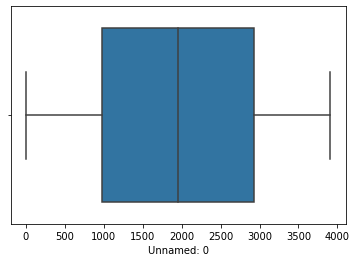


distplot of Unnamed: 0
----------------------------------------------------------------------------


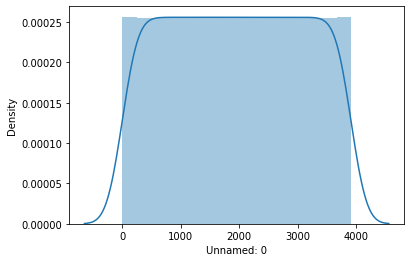


Histogram of Unnamed: 0
----------------------------------------------------------------------------


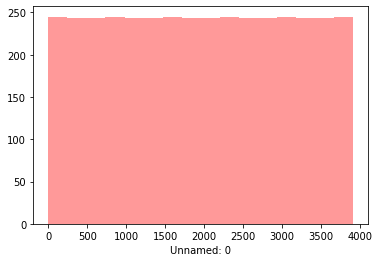


Histogram with mean, median and mode of Unnamed: 0
----------------------------------------------------------------------------
Mean:  1954.5 
Median:  1954.5 
Mode:  0


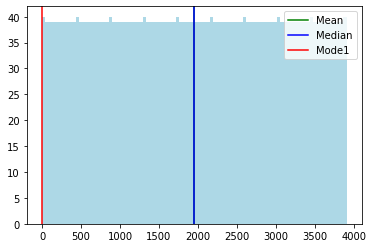


PDF and CDF plot of : Unnamed: 0
----------------------------------------------------------------------------
[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
[   0.   390.9  781.8 1172.7 1563.6 1954.5 2345.4 2736.3 3127.2 3518.1
 3909. ]
[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]

Skewness of Unnamed: 0
----------------------------------------------------------------------------
0.0

Description of X1
----------------------------------------------------------------------------
count    3910.000000
mean        0.102990
std         0.296322
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         4.340000
Name: X1, dtype: float64 
Central values of X1
----------------------------------------------------------------------------

Minimum :  0.0 
Maximum :  4.34 
Mean value :  0.10298976982097188 
Median value :  0.0 
Standard deviation :  0.29632219470994114 
Null values :  False 
Null values :  0 
Quartile of X1
--------------------------------------------

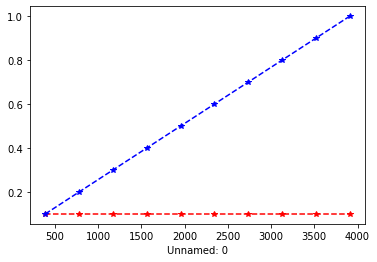

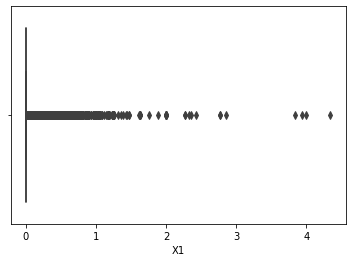


distplot of X1
----------------------------------------------------------------------------


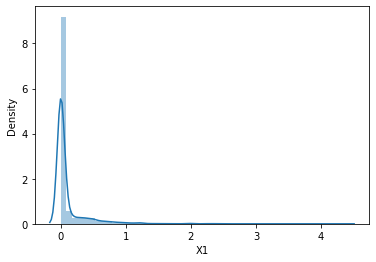


Histogram of X1
----------------------------------------------------------------------------


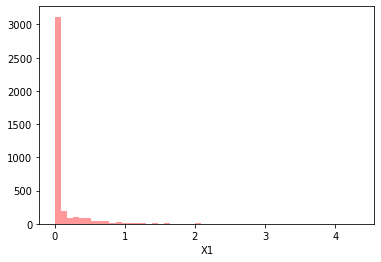


Histogram with mean, median and mode of X1
----------------------------------------------------------------------------
Mean:  0.10298976982097188 
Median:  0.0 
Mode:  0.0


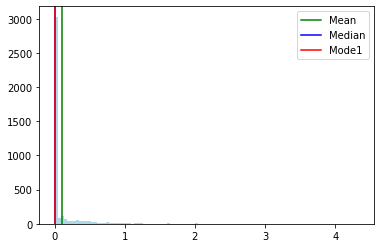


PDF and CDF plot of : X1
----------------------------------------------------------------------------
[9.13554987e-01 5.80562660e-02 1.94373402e-02 3.32480818e-03
 2.55754476e-03 1.27877238e-03 7.67263427e-04 0.00000000e+00
 2.55754476e-04 7.67263427e-04]
[0.    0.434 0.868 1.302 1.736 2.17  2.604 3.038 3.472 3.906 4.34 ]
[0.91355499 0.97161125 0.99104859 0.9943734  0.99693095 0.99820972
 0.99897698 0.99897698 0.99923274 1.        ]

Skewness of X1
----------------------------------------------------------------------------
5.522075898527044

Description of X2
----------------------------------------------------------------------------
count    3910.000000
mean        0.206419
std         1.253828
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        14.280000
Name: X2, dtype: float64 
Central values of X2
----------------------------------------------------------------------------

Minimum :  0.0 
Maximum :  14.28 
Mean value :  0.206419437340

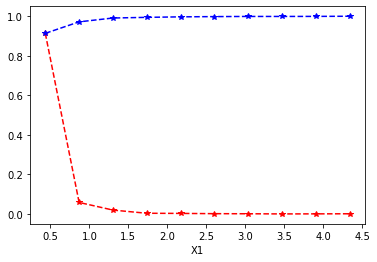

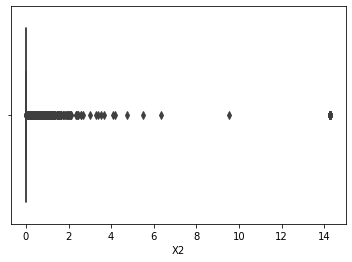


distplot of X2
----------------------------------------------------------------------------


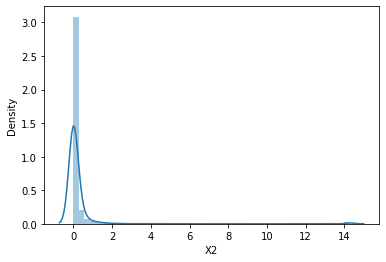


Histogram of X2
----------------------------------------------------------------------------


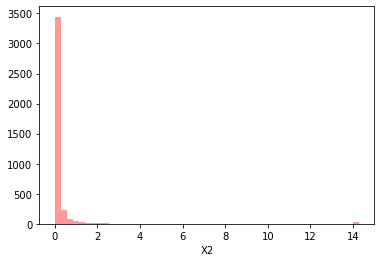


Histogram with mean, median and mode of X2
----------------------------------------------------------------------------
Mean:  0.20641943734015347 
Median:  0.0 
Mode:  0.0


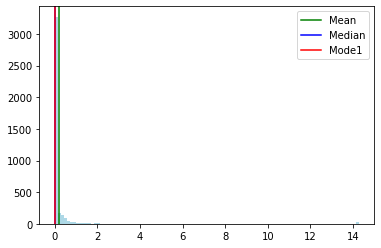


PDF and CDF plot of : X2
----------------------------------------------------------------------------
[9.80306905e-01 9.71867008e-03 1.79028133e-03 5.11508951e-04
 2.55754476e-04 0.00000000e+00 2.55754476e-04 0.00000000e+00
 0.00000000e+00 7.16112532e-03]
[ 0.     1.428  2.856  4.284  5.712  7.14   8.568  9.996 11.424 12.852
 14.28 ]
[0.98030691 0.99002558 0.99181586 0.99232737 0.99258312 0.99258312
 0.99283887 0.99283887 0.99283887 1.        ]

Skewness of X2
----------------------------------------------------------------------------
10.370999343028593

Description of X3
----------------------------------------------------------------------------
count    3910.000000
mean        0.284419
std         0.504352
min         0.000000
25%         0.000000
50%         0.000000
75%         0.430000
max         4.540000
Name: X3, dtype: float64 
Central values of X3
----------------------------------------------------------------------------

Minimum :  0.0 
Maximum :  4.54 
Mean value :  0.

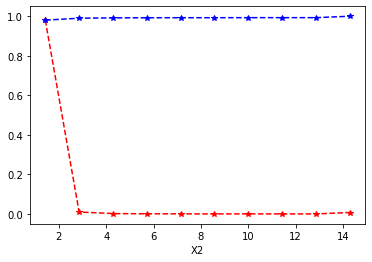

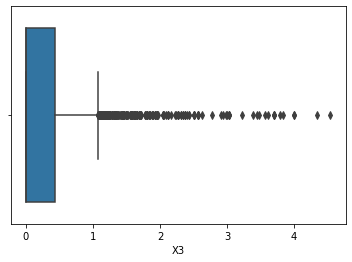


distplot of X3
----------------------------------------------------------------------------


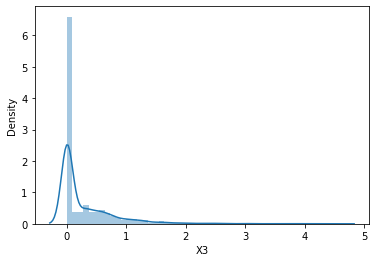


Histogram of X3
----------------------------------------------------------------------------


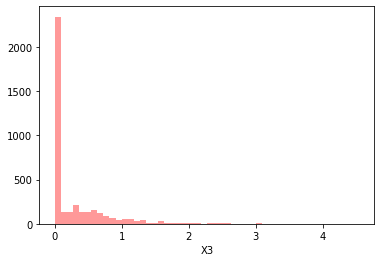


Histogram with mean, median and mode of X3
----------------------------------------------------------------------------
Mean:  0.28441943734015346 
Median:  0.0 
Mode:  0.0


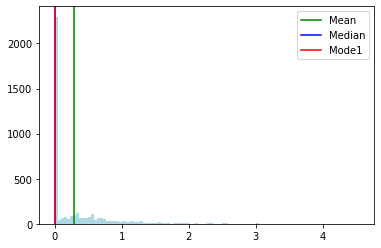


PDF and CDF plot of : X3
----------------------------------------------------------------------------
[7.57033248e-01 1.46035806e-01 5.88235294e-02 1.91815857e-02
 7.16112532e-03 5.88235294e-03 2.04603581e-03 1.53452685e-03
 1.79028133e-03 5.11508951e-04]
[0.    0.454 0.908 1.362 1.816 2.27  2.724 3.178 3.632 4.086 4.54 ]
[0.75703325 0.90306905 0.96189258 0.98107417 0.98823529 0.99411765
 0.99616368 0.99769821 0.99948849 1.        ]

Skewness of X3
----------------------------------------------------------------------------
2.9160205879056504

Description of X4
----------------------------------------------------------------------------
count    3910.000000
mean        0.062074
std         1.369361
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        42.810000
Name: X4, dtype: float64 
Central values of X4
----------------------------------------------------------------------------

Minimum :  0.0 
Maximum :  42.81 
Mean value :  0.06207416879

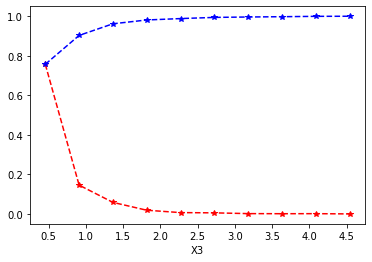

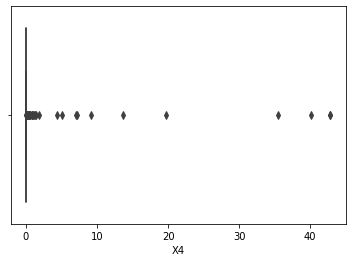


distplot of X4
----------------------------------------------------------------------------


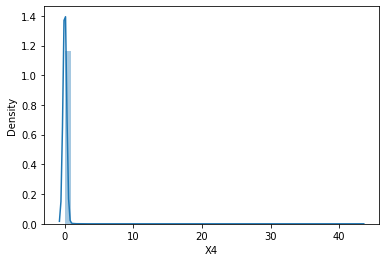


Histogram of X4
----------------------------------------------------------------------------


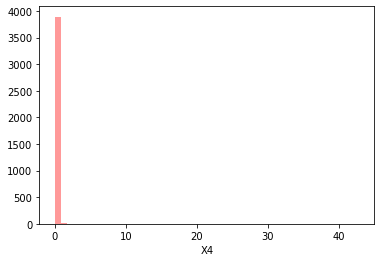


Histogram with mean, median and mode of X4
----------------------------------------------------------------------------
Mean:  0.062074168797953966 
Median:  0.0 
Mode:  0.0


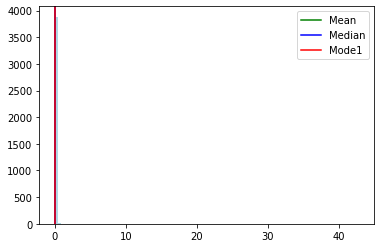


PDF and CDF plot of : X4
----------------------------------------------------------------------------
[9.97186701e-01 1.02301790e-03 2.55754476e-04 2.55754476e-04
 2.55754476e-04 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.55754476e-04 7.67263427e-04]
[ 0.     4.281  8.562 12.843 17.124 21.405 25.686 29.967 34.248 38.529
 42.81 ]
[0.9971867  0.99820972 0.99846547 0.99872123 0.99897698 0.99897698
 0.99897698 0.99897698 0.99923274 1.        ]

Skewness of X4
----------------------------------------------------------------------------
27.536596472068872

Description of X5
----------------------------------------------------------------------------
count    3910.000000
mean        0.311309
std         0.656195
min         0.000000
25%         0.000000
50%         0.000000
75%         0.387500
max         9.090000
Name: X5, dtype: float64 
Central values of X5
----------------------------------------------------------------------------

Minimum :  0.0 
Maximum :  9.09 
Mean value :  0.

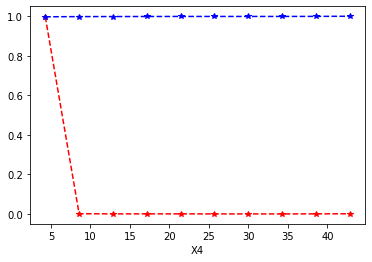

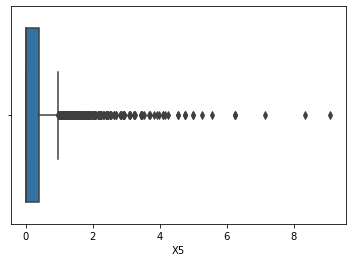


distplot of X5
----------------------------------------------------------------------------


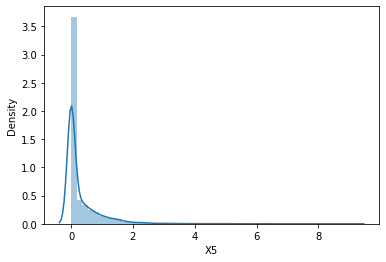


Histogram of X5
----------------------------------------------------------------------------


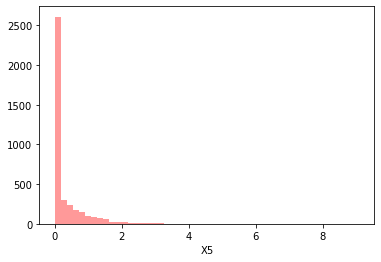


Histogram with mean, median and mode of X5
----------------------------------------------------------------------------
Mean:  0.311309462915601 
Median:  0.0 
Mode:  0.0


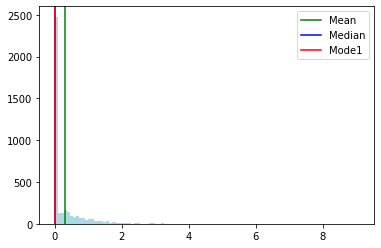


PDF and CDF plot of : X5
----------------------------------------------------------------------------
[8.84910486e-01 8.41432225e-02 1.86700767e-02 6.13810742e-03
 2.81329923e-03 1.53452685e-03 1.02301790e-03 2.55754476e-04
 0.00000000e+00 5.11508951e-04]
[0.    0.909 1.818 2.727 3.636 4.545 5.454 6.363 7.272 8.181 9.09 ]
[0.88491049 0.96905371 0.98772379 0.99386189 0.99667519 0.99820972
 0.99923274 0.99948849 0.99948849 1.        ]

Skewness of X5
----------------------------------------------------------------------------
4.359840868447758

Description of X6
----------------------------------------------------------------------------
count    3910.000000
mean        0.095974
std         0.261455
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         3.570000
Name: X6, dtype: float64 
Central values of X6
----------------------------------------------------------------------------

Minimum :  0.0 
Maximum :  3.57 
Mean value :  0.0959744245524

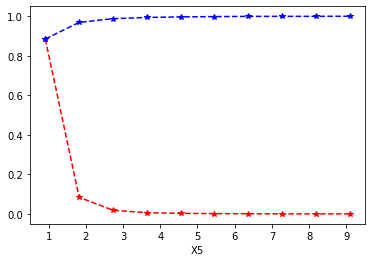

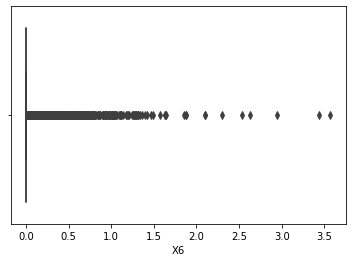


distplot of X6
----------------------------------------------------------------------------


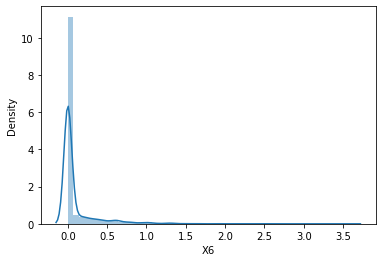


Histogram of X6
----------------------------------------------------------------------------


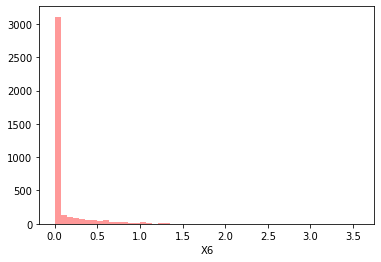


Histogram with mean, median and mode of X6
----------------------------------------------------------------------------
Mean:  0.09597442455242967 
Median:  0.0 
Mode:  0.0


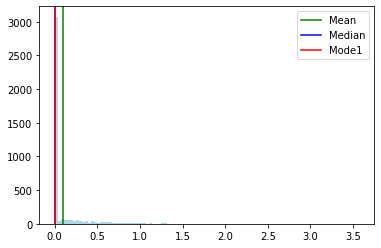


PDF and CDF plot of : X6
----------------------------------------------------------------------------
[8.97442455e-01 6.44501279e-02 2.53196931e-02 8.43989770e-03
 1.53452685e-03 1.27877238e-03 2.55754476e-04 5.11508951e-04
 2.55754476e-04 5.11508951e-04]
[0.    0.357 0.714 1.071 1.428 1.785 2.142 2.499 2.856 3.213 3.57 ]
[0.89744246 0.96189258 0.98721228 0.99565217 0.9971867  0.99846547
 0.99872123 0.99923274 0.99948849 1.        ]

Skewness of X6
----------------------------------------------------------------------------
4.564394289298697

Description of X7
----------------------------------------------------------------------------
count    3910.000000
mean        0.112320
std         0.389516
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         7.270000
Name: X7, dtype: float64 
Central values of X7
----------------------------------------------------------------------------

Minimum :  0.0 
Maximum :  7.27 
Mean value :  0.1123196930946

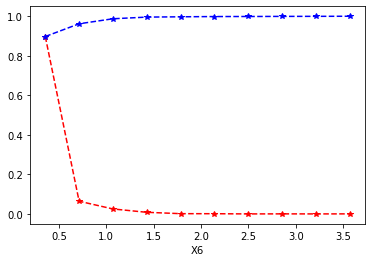

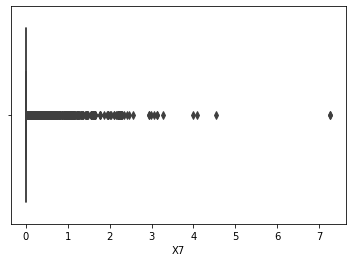


distplot of X7
----------------------------------------------------------------------------


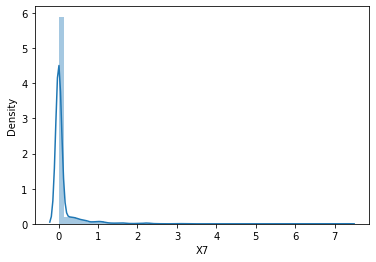


Histogram of X7
----------------------------------------------------------------------------


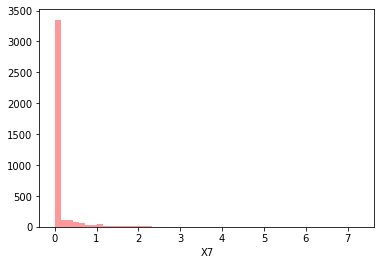


Histogram with mean, median and mode of X7
----------------------------------------------------------------------------
Mean:  0.11231969309462916 
Median:  0.0 
Mode:  0.0


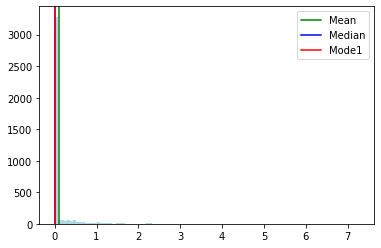


PDF and CDF plot of : X7
----------------------------------------------------------------------------
[9.49616368e-01 3.24808184e-02 9.97442455e-03 4.85933504e-03
 1.79028133e-03 5.11508951e-04 2.55754476e-04 0.00000000e+00
 0.00000000e+00 5.11508951e-04]
[0.    0.727 1.454 2.181 2.908 3.635 4.362 5.089 5.816 6.543 7.27 ]
[0.94961637 0.98209719 0.99207161 0.99693095 0.99872123 0.99923274
 0.99948849 0.99948849 0.99948849 1.        ]

Skewness of X7
----------------------------------------------------------------------------
6.957149862148253

Description of X8
----------------------------------------------------------------------------
count    3910.000000
mean        0.106041
std         0.398694
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        11.110000
Name: X8, dtype: float64 
Central values of X8
----------------------------------------------------------------------------

Minimum :  0.0 
Maximum :  11.11 
Mean value :  0.106040920716

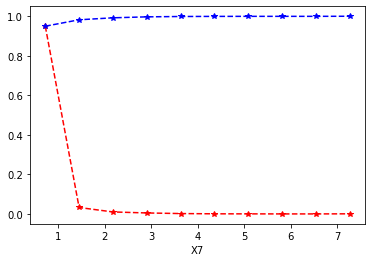

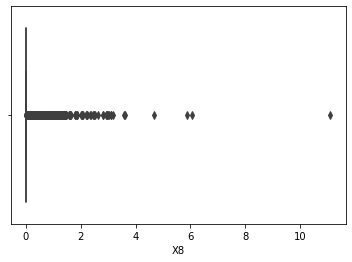


distplot of X8
----------------------------------------------------------------------------


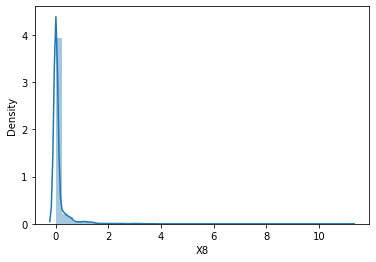


Histogram of X8
----------------------------------------------------------------------------


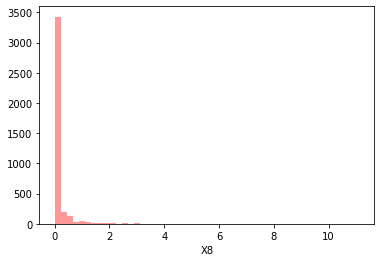


Histogram with mean, median and mode of X8
----------------------------------------------------------------------------
Mean:  0.10604092071611253 
Median:  0.0 
Mode:  0.0


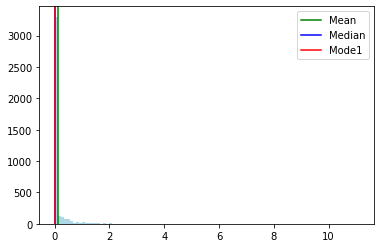


PDF and CDF plot of : X8
----------------------------------------------------------------------------
[9.74936061e-01 1.89258312e-02 4.60358056e-03 5.11508951e-04
 2.55754476e-04 5.11508951e-04 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.55754476e-04]
[ 0.     1.111  2.222  3.333  4.444  5.555  6.666  7.777  8.888  9.999
 11.11 ]
[0.97493606 0.99386189 0.99846547 0.99897698 0.99923274 0.99974425
 0.99974425 0.99974425 0.99974425 1.        ]

Skewness of X8
----------------------------------------------------------------------------
10.176106351261883

Description of X9
----------------------------------------------------------------------------
count    3910.000000
mean        0.091146
std         0.271417
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         3.230000
Name: X9, dtype: float64 
Central values of X9
----------------------------------------------------------------------------

Minimum :  0.0 
Maximum :  3.23 
Mean value :  0.

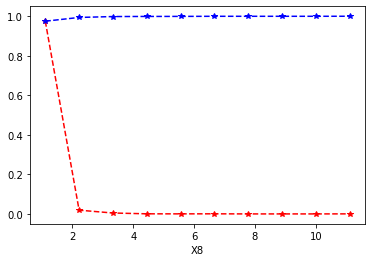

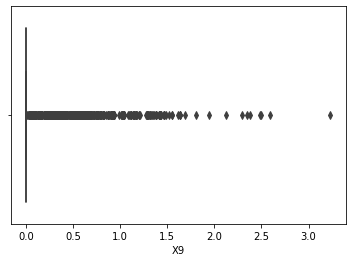


distplot of X9
----------------------------------------------------------------------------


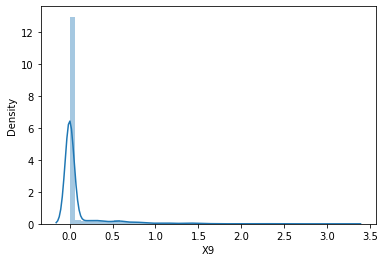


Histogram of X9
----------------------------------------------------------------------------


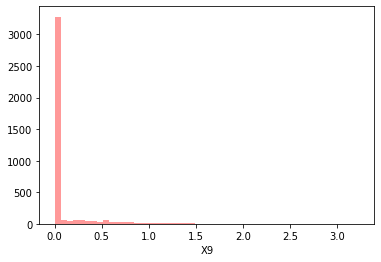


Histogram with mean, median and mode of X9
----------------------------------------------------------------------------
Mean:  0.0911457800511509 
Median:  0.0 
Mode:  0.0


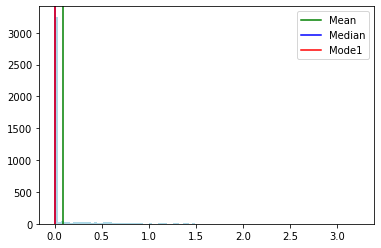


PDF and CDF plot of : X9
----------------------------------------------------------------------------
[8.96419437e-01 5.16624041e-02 2.81329923e-02 1.09974425e-02
 9.20716113e-03 1.27877238e-03 5.11508951e-04 1.27877238e-03
 2.55754476e-04 2.55754476e-04]
[0.    0.323 0.646 0.969 1.292 1.615 1.938 2.261 2.584 2.907 3.23 ]
[0.89641944 0.94808184 0.97621483 0.98721228 0.99641944 0.99769821
 0.99820972 0.99948849 0.99974425 1.        ]

Skewness of X9
----------------------------------------------------------------------------
4.157358287591441

Description of X10
----------------------------------------------------------------------------
count    3910.000000
mean        0.244345
std         0.667065
min         0.000000
25%         0.000000
50%         0.000000
75%         0.170000
max        18.180000
Name: X10, dtype: float64 
Central values of X10
----------------------------------------------------------------------------

Minimum :  0.0 
Maximum :  18.18 
Mean value :  0.244345268

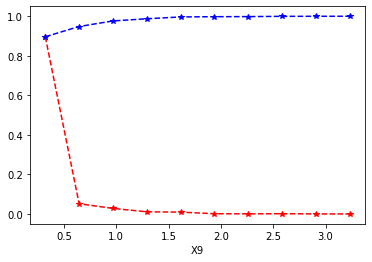

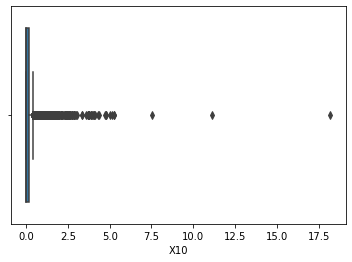


distplot of X10
----------------------------------------------------------------------------


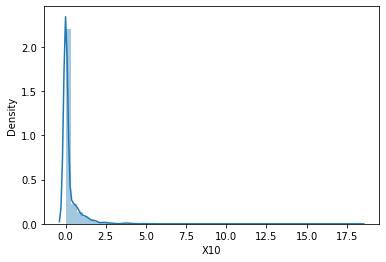


Histogram of X10
----------------------------------------------------------------------------


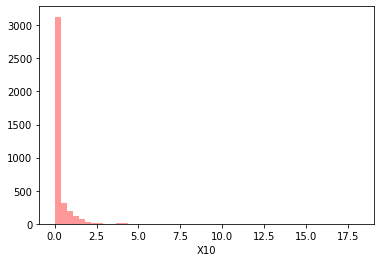


Histogram with mean, median and mode of X10
----------------------------------------------------------------------------
Mean:  0.24434526854219948 
Median:  0.0 
Mode:  0.0


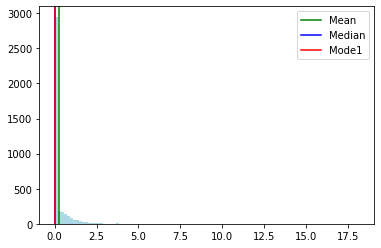


PDF and CDF plot of : X10
----------------------------------------------------------------------------
[9.74168798e-01 1.86700767e-02 6.39386189e-03 0.00000000e+00
 2.55754476e-04 0.00000000e+00 2.55754476e-04 0.00000000e+00
 0.00000000e+00 2.55754476e-04]
[ 0.     1.818  3.636  5.454  7.272  9.09  10.908 12.726 14.544 16.362
 18.18 ]
[0.9741688  0.99283887 0.99923274 0.99923274 0.99948849 0.99948849
 0.99974425 0.99974425 0.99974425 1.        ]

Skewness of X10
----------------------------------------------------------------------------
8.739916169595325

Description of X11
----------------------------------------------------------------------------
count    3910.000000
mean        0.060808
std         0.203018
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.610000
Name: X11, dtype: float64 
Central values of X11
----------------------------------------------------------------------------

Minimum :  0.0 
Maximum :  2.61 
Mean value :

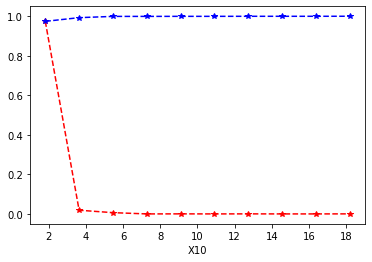

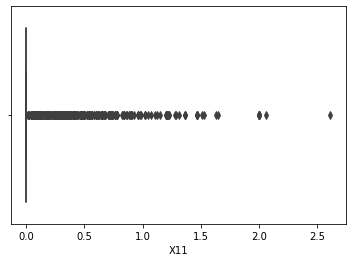


distplot of X11
----------------------------------------------------------------------------


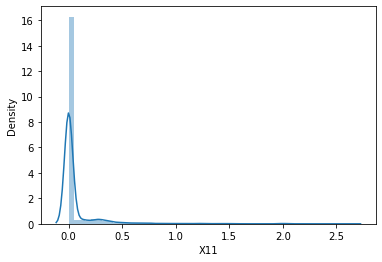


Histogram of X11
----------------------------------------------------------------------------


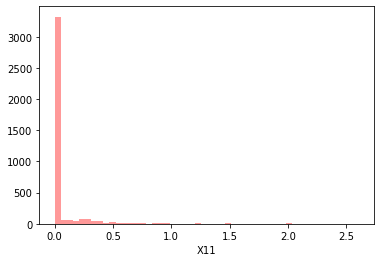


Histogram with mean, median and mode of X11
----------------------------------------------------------------------------
Mean:  0.060808184143222505 
Median:  0.0 
Mode:  0.0


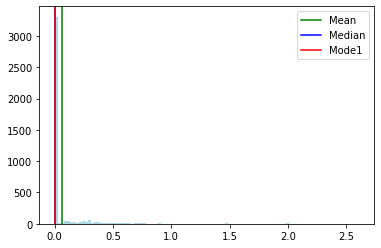


PDF and CDF plot of : X11
----------------------------------------------------------------------------
[9.14322251e-01 5.37084399e-02 1.66240409e-02 5.37084399e-03
 4.09207161e-03 2.81329923e-03 5.11508951e-04 2.30179028e-03
 0.00000000e+00 2.55754476e-04]
[0.    0.261 0.522 0.783 1.044 1.305 1.566 1.827 2.088 2.349 2.61 ]
[0.91432225 0.96803069 0.98465473 0.99002558 0.99411765 0.99693095
 0.99744246 0.99974425 0.99974425 1.        ]

Skewness of X11
----------------------------------------------------------------------------
5.405501714836048

Description of X12
----------------------------------------------------------------------------
count    3910.000000
mean        0.553685
std         0.876412
min         0.000000
25%         0.000000
50%         0.140000
75%         0.820000
max         9.670000
Name: X12, dtype: float64 
Central values of X12
----------------------------------------------------------------------------

Minimum :  0.0 
Maximum :  9.67 
Mean value :  0.55368542

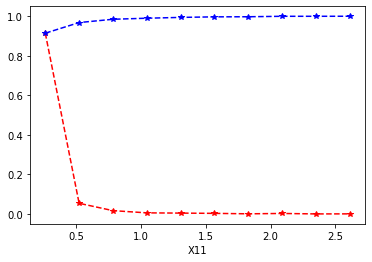

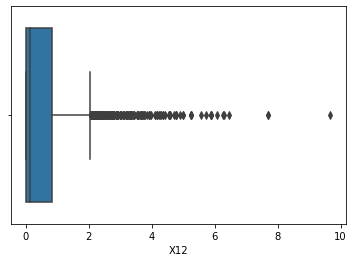


distplot of X12
----------------------------------------------------------------------------


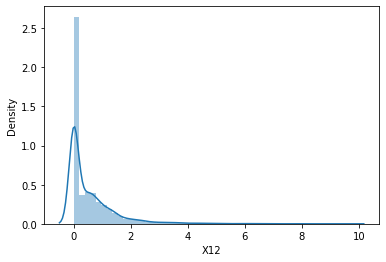


Histogram of X12
----------------------------------------------------------------------------


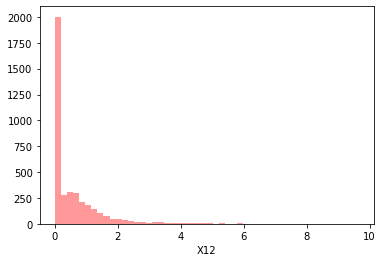


Histogram with mean, median and mode of X12
----------------------------------------------------------------------------
Mean:  0.5536854219948849 
Median:  0.14 
Mode:  0.0


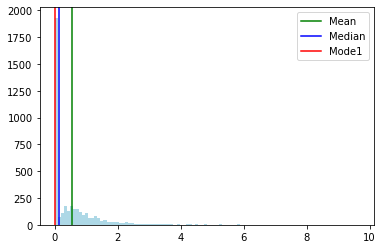


PDF and CDF plot of : X12
----------------------------------------------------------------------------
[7.91048593e-01 1.41943734e-01 3.98976982e-02 1.50895141e-02
 6.90537084e-03 2.30179028e-03 2.04603581e-03 5.11508951e-04
 0.00000000e+00 2.55754476e-04]
[0.    0.967 1.934 2.901 3.868 4.835 5.802 6.769 7.736 8.703 9.67 ]
[0.79104859 0.93299233 0.97289003 0.98797954 0.99488491 0.9971867
 0.99923274 0.99974425 0.99974425 1.        ]

Skewness of X12
----------------------------------------------------------------------------
2.866083645618585

Description of X13
----------------------------------------------------------------------------
count    3910.000000
mean        0.094113
std         0.303433
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         5.550000
Name: X13, dtype: float64 
Central values of X13
----------------------------------------------------------------------------

Minimum :  0.0 
Maximum :  5.55 
Mean value :  0.094112531

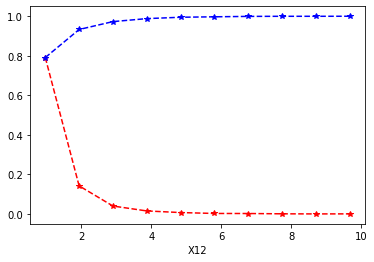

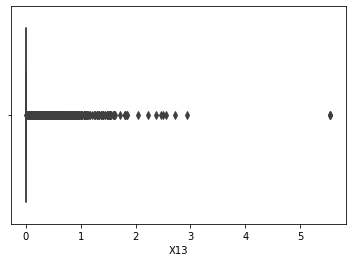


distplot of X13
----------------------------------------------------------------------------


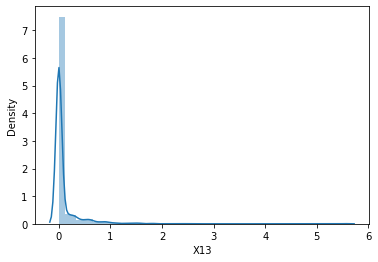


Histogram of X13
----------------------------------------------------------------------------


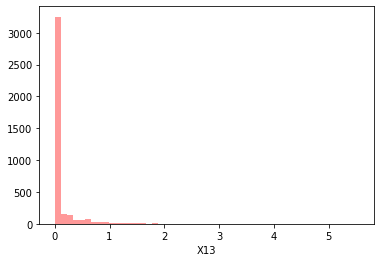


Histogram with mean, median and mode of X13
----------------------------------------------------------------------------
Mean:  0.09411253196930947 
Median:  0.0 
Mode:  0.0


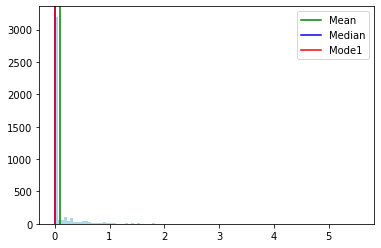


PDF and CDF plot of : X13
----------------------------------------------------------------------------
[9.40664962e-01 4.42455243e-02 1.02301790e-02 2.30179028e-03
 1.53452685e-03 2.55754476e-04 0.00000000e+00 0.00000000e+00
 0.00000000e+00 7.67263427e-04]
[0.    0.555 1.11  1.665 2.22  2.775 3.33  3.885 4.44  4.995 5.55 ]
[0.94066496 0.98491049 0.99514066 0.99744246 0.99897698 0.99923274
 0.99923274 0.99923274 0.99923274 1.        ]

Skewness of X13
----------------------------------------------------------------------------
7.29577855508468

Description of X14
----------------------------------------------------------------------------
count    3910.000000
mean        0.057205
std         0.307892
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         5.550000
Name: X14, dtype: float64 
Central values of X14
----------------------------------------------------------------------------

Minimum :  0.0 
Maximum :  5.55 
Mean value :  0.057204603

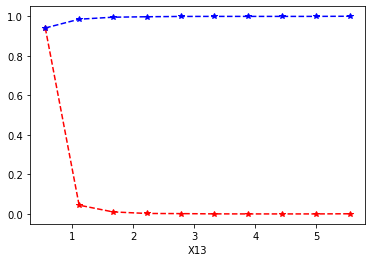

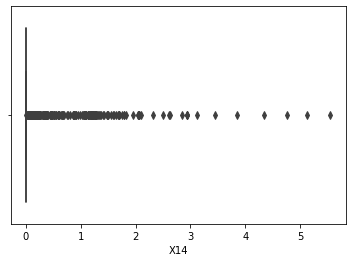


distplot of X14
----------------------------------------------------------------------------


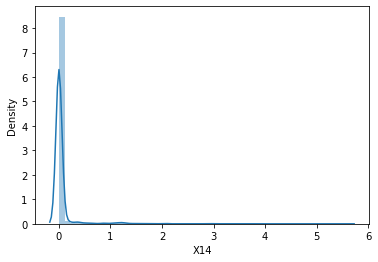


Histogram of X14
----------------------------------------------------------------------------


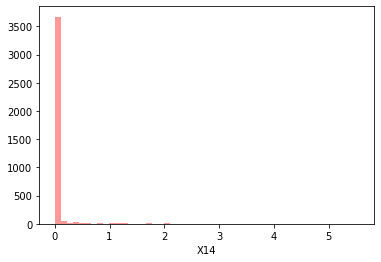


Histogram with mean, median and mode of X14
----------------------------------------------------------------------------
Mean:  0.05720460358056267 
Median:  0.0 
Mode:  0.0


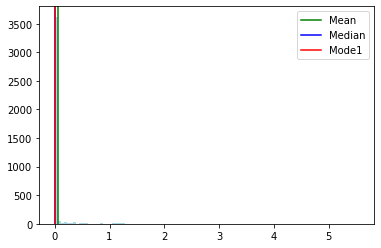


PDF and CDF plot of : X14
----------------------------------------------------------------------------
[9.67263427e-01 1.20204604e-02 1.25319693e-02 4.34782609e-03
 1.02301790e-03 1.27877238e-03 5.11508951e-04 2.55754476e-04
 2.55754476e-04 5.11508951e-04]
[0.    0.555 1.11  1.665 2.22  2.775 3.33  3.885 4.44  4.995 5.55 ]
[0.96726343 0.97928389 0.99181586 0.99616368 0.9971867  0.99846547
 0.99897698 0.99923274 0.99948849 1.        ]

Skewness of X14
----------------------------------------------------------------------------
8.609599382881154

Description of X15
----------------------------------------------------------------------------
count    3910.000000
mean        0.048545
std         0.255293
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         4.410000
Name: X15, dtype: float64 
Central values of X15
----------------------------------------------------------------------------

Minimum :  0.0 
Maximum :  4.41 
Mean value :  0.04854475

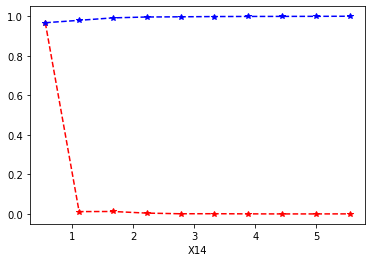

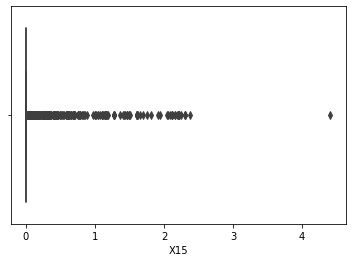


distplot of X15
----------------------------------------------------------------------------


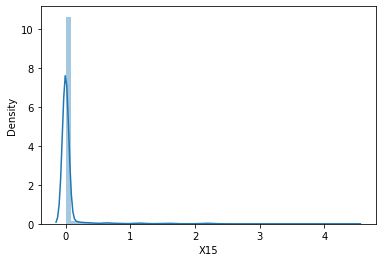


Histogram of X15
----------------------------------------------------------------------------


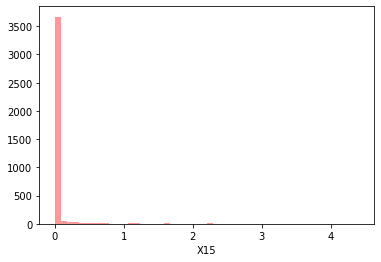


Histogram with mean, median and mode of X15
----------------------------------------------------------------------------
Mean:  0.048544757033248086 
Median:  0.0 
Mode:  0.0


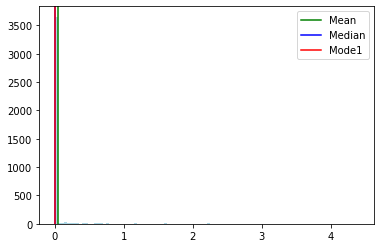


PDF and CDF plot of : X15
----------------------------------------------------------------------------
[9.66240409e-01 1.32992327e-02 7.67263427e-03 5.88235294e-03
 3.06905371e-03 3.58056266e-03 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.55754476e-04]
[0.    0.441 0.882 1.323 1.764 2.205 2.646 3.087 3.528 3.969 4.41 ]
[0.96624041 0.97953964 0.98721228 0.99309463 0.99616368 0.99974425
 0.99974425 0.99974425 0.99974425 1.        ]

Skewness of X15
----------------------------------------------------------------------------
7.085862326088346

Description of X16
----------------------------------------------------------------------------
count    3910.000000
mean        0.246598
std         0.799327
min         0.000000
25%         0.000000
50%         0.000000
75%         0.110000
max        20.000000
Name: X16, dtype: float64 
Central values of X16
----------------------------------------------------------------------------

Minimum :  0.0 
Maximum :  20.0 
Mean value :  0.24659846

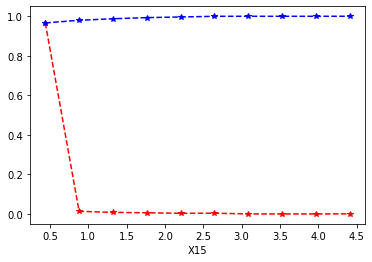

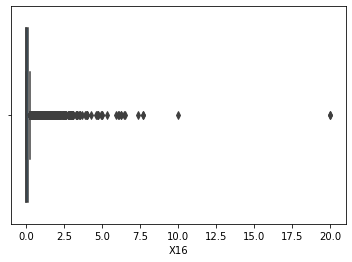


distplot of X16
----------------------------------------------------------------------------


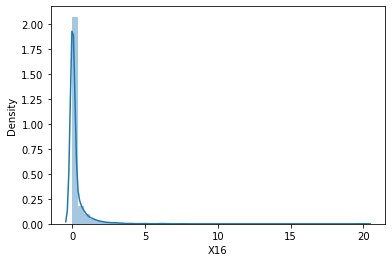


Histogram of X16
----------------------------------------------------------------------------


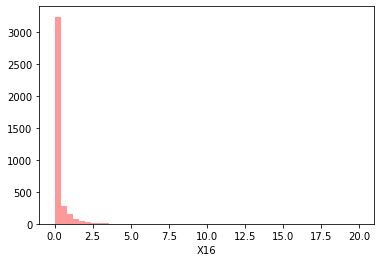


Histogram with mean, median and mode of X16
----------------------------------------------------------------------------
Mean:  0.2465984654731458 
Median:  0.0 
Mode:  0.0


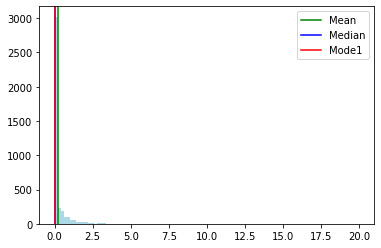


PDF and CDF plot of : X16
----------------------------------------------------------------------------
[9.73657289e-01 1.99488491e-02 3.32480818e-03 2.30179028e-03
 0.00000000e+00 2.55754476e-04 0.00000000e+00 0.00000000e+00
 0.00000000e+00 5.11508951e-04]
[ 0.  2.  4.  6.  8. 10. 12. 14. 16. 18. 20.]
[0.97365729 0.99360614 0.99693095 0.99923274 0.99923274 0.99948849
 0.99948849 0.99948849 0.99948849 1.        ]

Skewness of X16
----------------------------------------------------------------------------
10.83607577345793

Description of X17
----------------------------------------------------------------------------
count    3910.000000
mean        0.142780
std         0.444164
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         7.140000
Name: X17, dtype: float64 
Central values of X17
----------------------------------------------------------------------------

Minimum :  0.0 
Maximum :  7.14 
Mean value :  0.14278005115089515 
Median valu

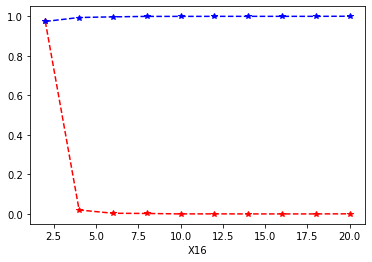

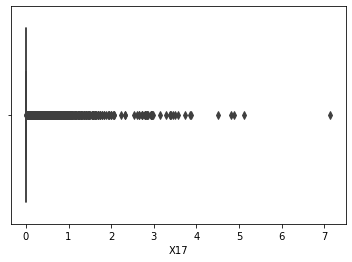


distplot of X17
----------------------------------------------------------------------------


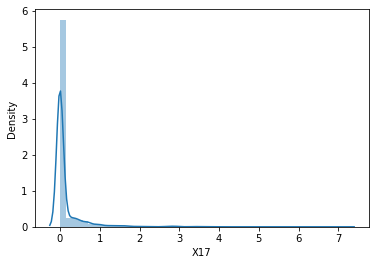


Histogram of X17
----------------------------------------------------------------------------


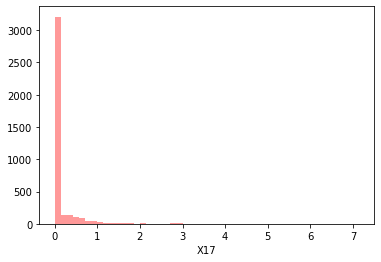


Histogram with mean, median and mode of X17
----------------------------------------------------------------------------
Mean:  0.14278005115089515 
Median:  0.0 
Mode:  0.0


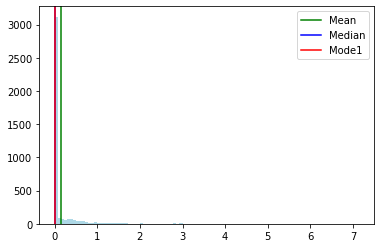


PDF and CDF plot of : X17
----------------------------------------------------------------------------
[9.39130435e-01 3.78516624e-02 1.22762148e-02 4.60358056e-03
 3.83631714e-03 1.02301790e-03 7.67263427e-04 2.55754476e-04
 0.00000000e+00 2.55754476e-04]
[0.    0.714 1.428 2.142 2.856 3.57  4.284 4.998 5.712 6.426 7.14 ]
[0.93913043 0.9769821  0.98925831 0.99386189 0.99769821 0.99872123
 0.99948849 0.99974425 0.99974425 1.        ]

Skewness of X17
----------------------------------------------------------------------------
5.674634327730459

Description of X18
----------------------------------------------------------------------------
count    3910.000000
mean        0.185514
std         0.526497
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         7.690000
Name: X18, dtype: float64 
Central values of X18
----------------------------------------------------------------------------

Minimum :  0.0 
Maximum :  7.69 
Mean value :  0.18551406

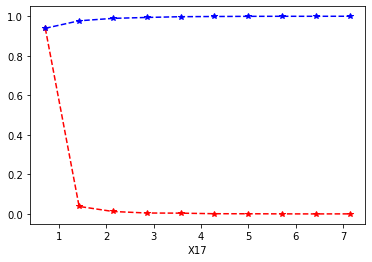

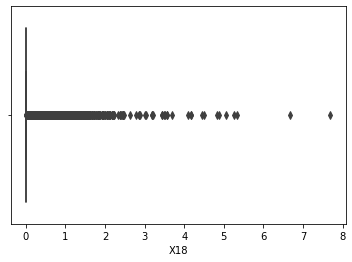


distplot of X18
----------------------------------------------------------------------------


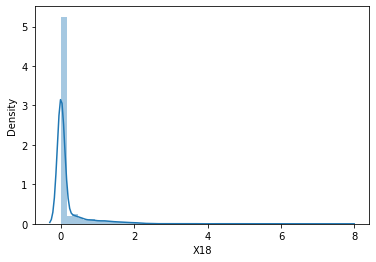


Histogram of X18
----------------------------------------------------------------------------


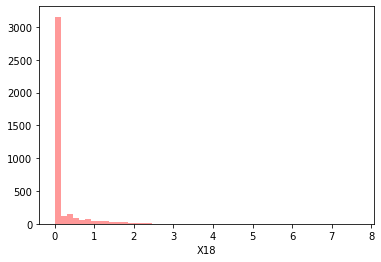


Histogram with mean, median and mode of X18
----------------------------------------------------------------------------
Mean:  0.1855140664961637 
Median:  0.0 
Mode:  0.0


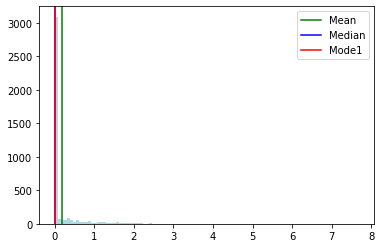


PDF and CDF plot of : X18
----------------------------------------------------------------------------
[9.09974425e-01 5.72890026e-02 2.30179028e-02 4.09207161e-03
 2.55754476e-03 1.27877238e-03 1.27877238e-03 0.00000000e+00
 2.55754476e-04 2.55754476e-04]
[0.    0.769 1.538 2.307 3.076 3.845 4.614 5.383 6.152 6.921 7.69 ]
[0.90997442 0.96726343 0.99028133 0.9943734  0.99693095 0.99820972
 0.99948849 0.99948849 0.99974425 1.        ]

Skewness of X18
----------------------------------------------------------------------------
4.9335909136774605

Description of X19
----------------------------------------------------------------------------
count    3910.000000
mean        1.660939
std         1.760214
min         0.000000
25%         0.000000
50%         1.310000
75%         2.637500
max        18.750000
Name: X19, dtype: float64 
Central values of X19
----------------------------------------------------------------------------

Minimum :  0.0 
Maximum :  18.75 
Mean value :  1.660938

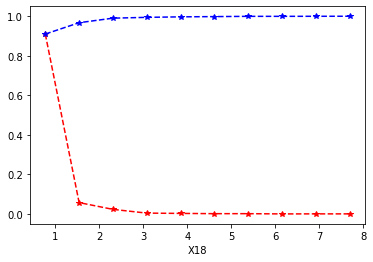

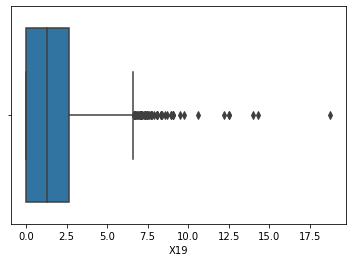


distplot of X19
----------------------------------------------------------------------------


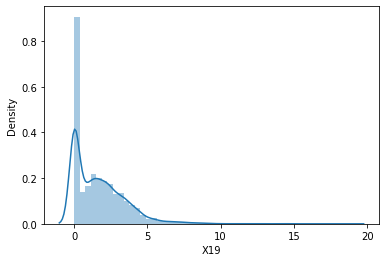


Histogram of X19
----------------------------------------------------------------------------


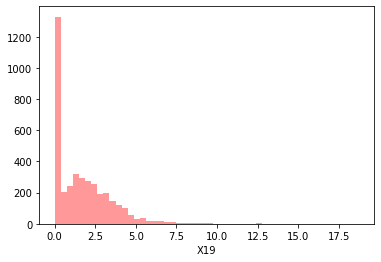


Histogram with mean, median and mode of X19
----------------------------------------------------------------------------
Mean:  1.6609386189258313 
Median:  1.31 
Mode:  0.0


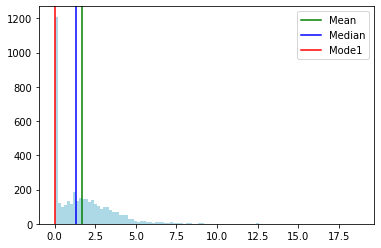


PDF and CDF plot of : X19
----------------------------------------------------------------------------
[6.11253197e-01 2.72378517e-01 8.92583120e-02 1.81585678e-02
 6.64961637e-03 7.67263427e-04 7.67263427e-04 5.11508951e-04
 0.00000000e+00 2.55754476e-04]
[ 0.     1.875  3.75   5.625  7.5    9.375 11.25  13.125 15.    16.875
 18.75 ]
[0.6112532  0.88363171 0.97289003 0.99104859 0.99769821 0.99846547
 0.99923274 0.99974425 0.99974425 1.        ]

Skewness of X19
----------------------------------------------------------------------------
1.599187343427548

Description of X20
----------------------------------------------------------------------------
count    3910.000000
mean        0.083880
std         0.439199
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         6.320000
Name: X20, dtype: float64 
Central values of X20
----------------------------------------------------------------------------

Minimum :  0.0 
Maximum :  6.32 
Mean value :

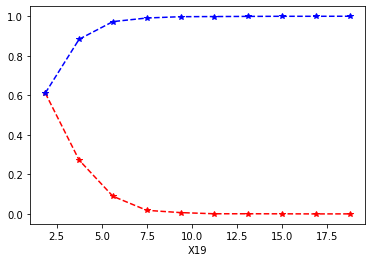

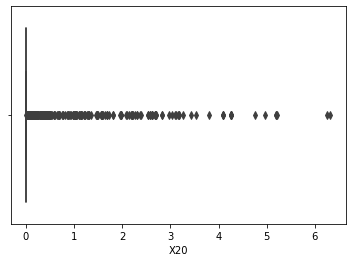


distplot of X20
----------------------------------------------------------------------------


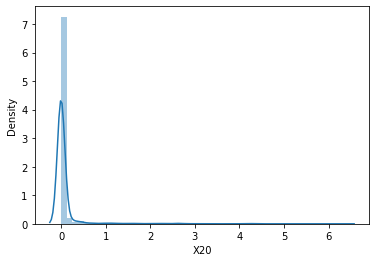


Histogram of X20
----------------------------------------------------------------------------


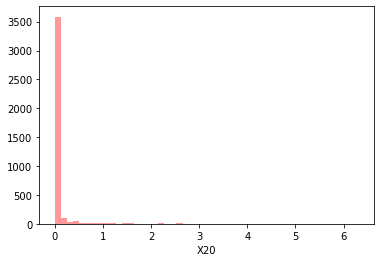


Histogram with mean, median and mode of X20
----------------------------------------------------------------------------
Mean:  0.08387979539641945 
Median:  0.0 
Mode:  0.0


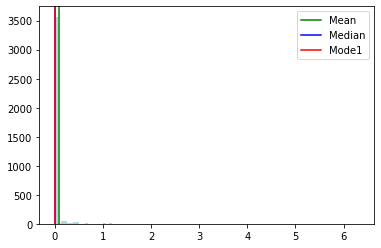


PDF and CDF plot of : X20
----------------------------------------------------------------------------
[9.66240409e-01 1.22762148e-02 6.13810742e-03 4.60358056e-03
 5.37084399e-03 1.27877238e-03 2.30179028e-03 5.11508951e-04
 7.67263427e-04 5.11508951e-04]
[0.    0.632 1.264 1.896 2.528 3.16  3.792 4.424 5.056 5.688 6.32 ]
[0.96624041 0.97851662 0.98465473 0.98925831 0.99462916 0.99590793
 0.99820972 0.99872123 0.99948849 1.        ]

Skewness of X20
----------------------------------------------------------------------------
7.715831577557392

Description of X21
----------------------------------------------------------------------------
count    3910.000000
mean        0.818253
std         1.210078
min         0.000000
25%         0.000000
50%         0.235000
75%         1.270000
max        11.110000
Name: X21, dtype: float64 
Central values of X21
----------------------------------------------------------------------------

Minimum :  0.0 
Maximum :  11.11 
Mean value :  0.8182531

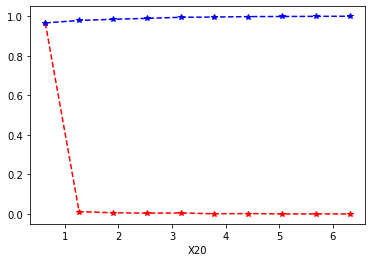

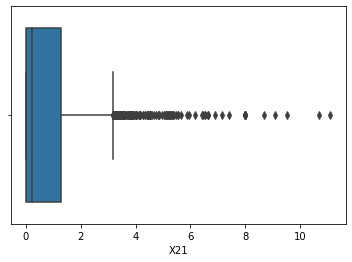


distplot of X21
----------------------------------------------------------------------------


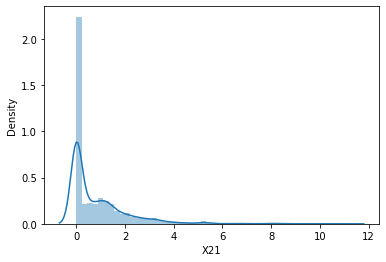


Histogram of X21
----------------------------------------------------------------------------


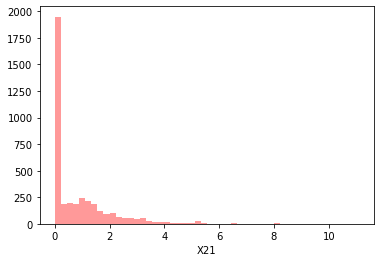


Histogram with mean, median and mode of X21
----------------------------------------------------------------------------
Mean:  0.8182531969309462 
Median:  0.235 
Mode:  0.0


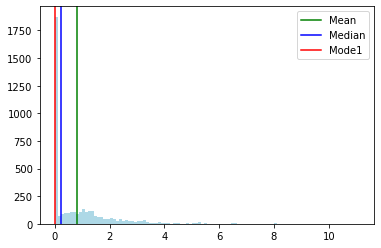


PDF and CDF plot of : X21
----------------------------------------------------------------------------
[7.07161125e-01 1.83120205e-01 6.93094629e-02 2.12276215e-02
 1.22762148e-02 2.81329923e-03 7.67263427e-04 2.30179028e-03
 5.11508951e-04 5.11508951e-04]
[ 0.     1.111  2.222  3.333  4.444  5.555  6.666  7.777  8.888  9.999
 11.11 ]
[0.70716113 0.89028133 0.95959079 0.98081841 0.99309463 0.99590793
 0.99667519 0.99897698 0.99948849 1.        ]

Skewness of X21
----------------------------------------------------------------------------
2.4203145742667393

Description of X22
----------------------------------------------------------------------------
count    3910.000000
mean        0.112113
std         0.990195
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        17.100000
Name: X22, dtype: float64 
Central values of X22
----------------------------------------------------------------------------

Minimum :  0.0 
Maximum :  17.1 
Mean value 

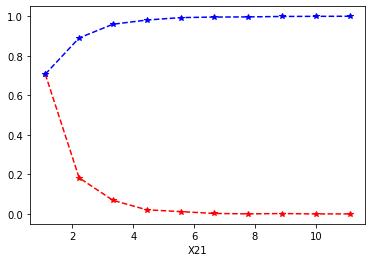

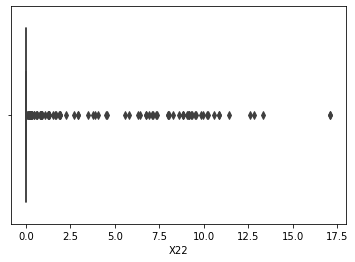


distplot of X22
----------------------------------------------------------------------------


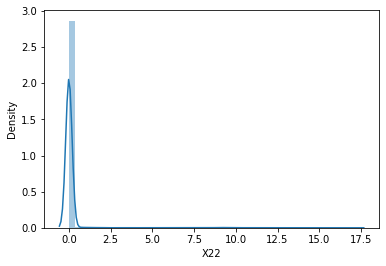


Histogram of X22
----------------------------------------------------------------------------


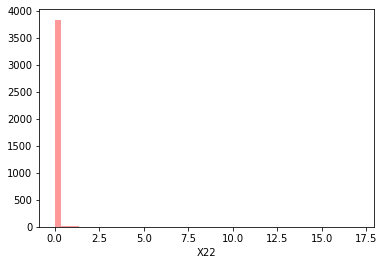


Histogram with mean, median and mode of X22
----------------------------------------------------------------------------
Mean:  0.11211253196930947 
Median:  0.0 
Mode:  0.0


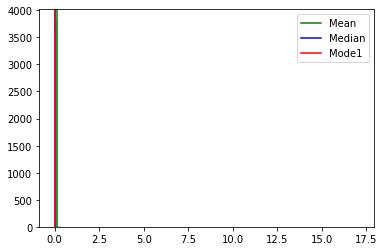


PDF and CDF plot of : X22
----------------------------------------------------------------------------
[9.86189258e-01 2.04603581e-03 1.53452685e-03 1.53452685e-03
 2.30179028e-03 4.09207161e-03 1.02301790e-03 7.67263427e-04
 0.00000000e+00 5.11508951e-04]
[ 0.    1.71  3.42  5.13  6.84  8.55 10.26 11.97 13.68 15.39 17.1 ]
[0.98618926 0.98823529 0.98976982 0.99130435 0.99360614 0.99769821
 0.99872123 0.99948849 0.99948849 1.        ]

Skewness of X22
----------------------------------------------------------------------------
10.415773758937013

Description of X23
----------------------------------------------------------------------------
count    3910.000000
mean        0.101343
std         0.345887
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         5.450000
Name: X23, dtype: float64 
Central values of X23
----------------------------------------------------------------------------

Minimum :  0.0 
Maximum :  5.45 
Mean value :  0.1013427

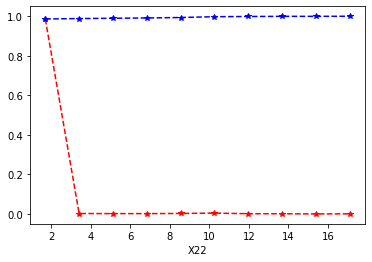

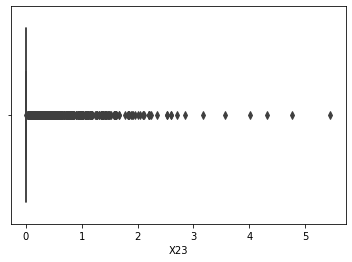


distplot of X23
----------------------------------------------------------------------------


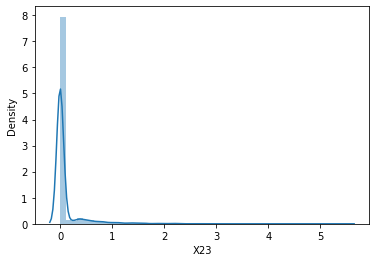


Histogram of X23
----------------------------------------------------------------------------


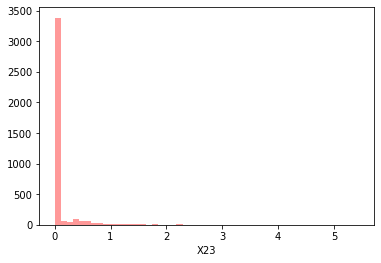


Histogram with mean, median and mode of X23
----------------------------------------------------------------------------
Mean:  0.10134271099744245 
Median:  0.0 
Mode:  0.0


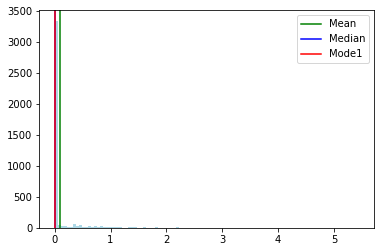


PDF and CDF plot of : X23
----------------------------------------------------------------------------
[9.31457801e-01 4.21994885e-02 1.68797954e-02 4.34782609e-03
 3.32480818e-03 5.11508951e-04 2.55754476e-04 5.11508951e-04
 2.55754476e-04 2.55754476e-04]
[0.    0.545 1.09  1.635 2.18  2.725 3.27  3.815 4.36  4.905 5.45 ]
[0.9314578  0.97365729 0.99053708 0.99488491 0.99820972 0.99872123
 0.99897698 0.99948849 0.99974425 1.        ]

Skewness of X23
----------------------------------------------------------------------------
5.7409829253112274

Description of X24
----------------------------------------------------------------------------
count    3910.000000
mean        0.095199
std         0.443482
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        12.500000
Name: X24, dtype: float64 
Central values of X24
----------------------------------------------------------------------------

Minimum :  0.0 
Maximum :  12.5 
Mean value :  0.0951994

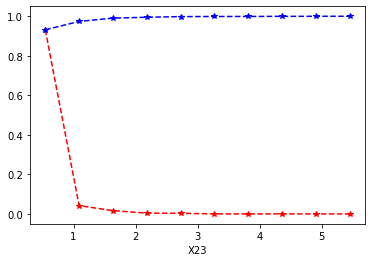

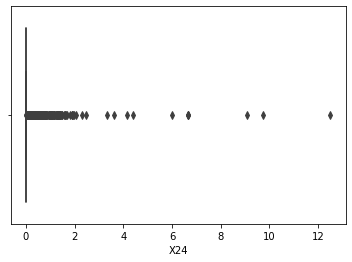


distplot of X24
----------------------------------------------------------------------------


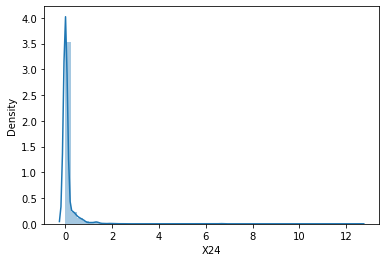


Histogram of X24
----------------------------------------------------------------------------


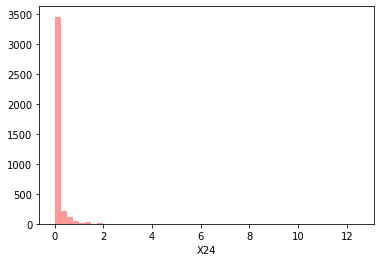


Histogram with mean, median and mode of X24
----------------------------------------------------------------------------
Mean:  0.0951994884910486 
Median:  0.0 
Mode:  0.0


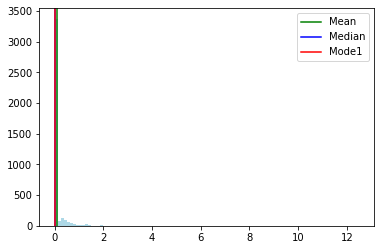


PDF and CDF plot of : X24
----------------------------------------------------------------------------
[9.84910486e-01 1.22762148e-02 5.11508951e-04 5.11508951e-04
 2.55754476e-04 7.67263427e-04 0.00000000e+00 5.11508951e-04
 0.00000000e+00 2.55754476e-04]
[ 0.    1.25  2.5   3.75  5.    6.25  7.5   8.75 10.   11.25 12.5 ]
[0.98491049 0.9971867  0.99769821 0.99820972 0.99846547 0.99923274
 0.99923274 0.99974425 0.99974425 1.        ]

Skewness of X24
----------------------------------------------------------------------------
14.732998273000382

Description of X25
----------------------------------------------------------------------------
count    3910.000000
mean        0.565790
std         1.733593
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        20.830000
Name: X25, dtype: float64 
Central values of X25
----------------------------------------------------------------------------

Minimum :  0.0 
Maximum :  20.83 
Mean value :  0.565790

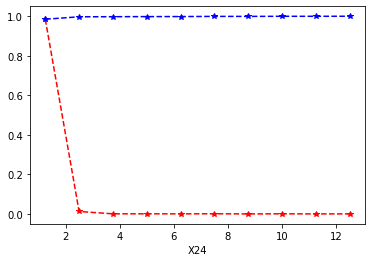

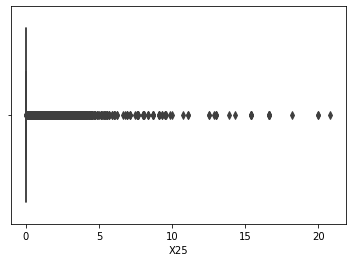


distplot of X25
----------------------------------------------------------------------------


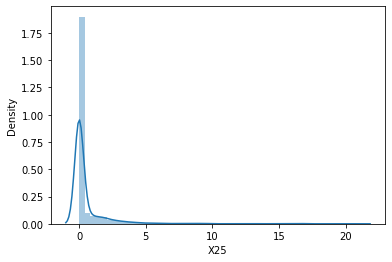


Histogram of X25
----------------------------------------------------------------------------


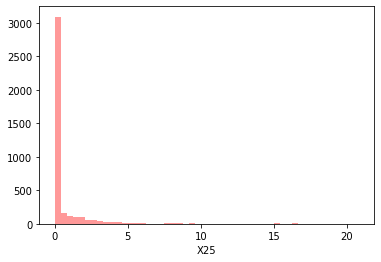


Histogram with mean, median and mode of X25
----------------------------------------------------------------------------
Mean:  0.5657902813299234 
Median:  0.0 
Mode:  0.0


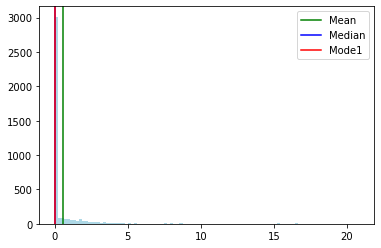


PDF and CDF plot of : X25
----------------------------------------------------------------------------
[9.14578005e-01 5.39641944e-02 1.43222506e-02 6.13810742e-03
 4.34782609e-03 7.67263427e-04 2.04603581e-03 2.81329923e-03
 2.55754476e-04 7.67263427e-04]
[ 0.     2.083  4.166  6.249  8.332 10.415 12.498 14.581 16.664 18.747
 20.83 ]
[0.91457801 0.9685422  0.98286445 0.98900256 0.99335038 0.99411765
 0.99616368 0.99897698 0.99923274 1.        ]

Skewness of X25
----------------------------------------------------------------------------
5.718280683513457

Description of X26
----------------------------------------------------------------------------
count    3910.000000
mean        0.266668
std         0.892676
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        16.660000
Name: X26, dtype: float64 
Central values of X26
----------------------------------------------------------------------------

Minimum :  0.0 
Maximum :  16.66 
Mean value 

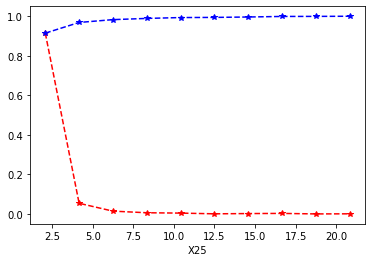

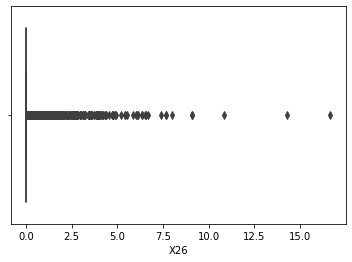


distplot of X26
----------------------------------------------------------------------------


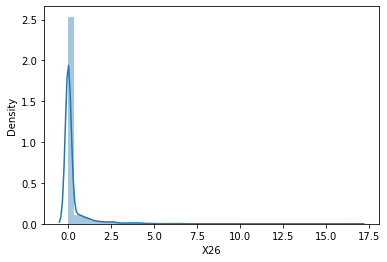


Histogram of X26
----------------------------------------------------------------------------


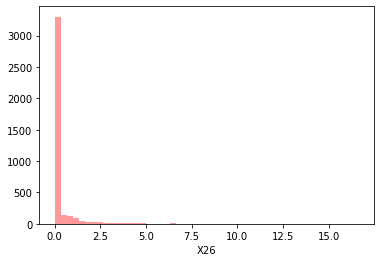


Histogram with mean, median and mode of X26
----------------------------------------------------------------------------
Mean:  0.2666675191815857 
Median:  0.0 
Mode:  0.0


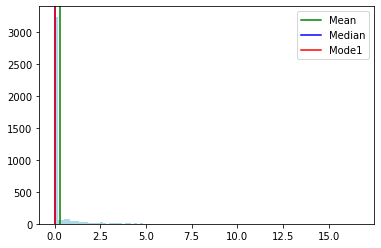


PDF and CDF plot of : X26
----------------------------------------------------------------------------
[9.48849105e-01 3.22250639e-02 1.32992327e-02 3.32480818e-03
 1.02301790e-03 5.11508951e-04 2.55754476e-04 0.00000000e+00
 2.55754476e-04 2.55754476e-04]
[ 0.     1.666  3.332  4.998  6.664  8.33   9.996 11.662 13.328 14.994
 16.66 ]
[0.9488491  0.98107417 0.9943734  0.99769821 0.99872123 0.99923274
 0.99948849 0.99948849 0.99974425 1.        ]

Skewness of X26
----------------------------------------------------------------------------
6.519309233461437

Description of X27
----------------------------------------------------------------------------
count    3910.000000
mean        0.757120
std         3.321562
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        33.330000
Name: X27, dtype: float64 
Central values of X27
----------------------------------------------------------------------------

Minimum :  0.0 
Maximum :  33.33 
Mean value 

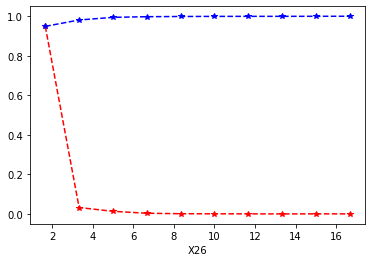

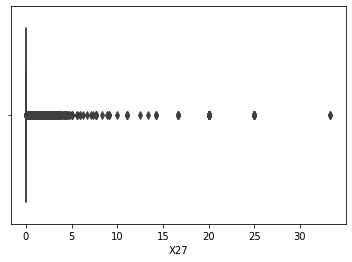


distplot of X27
----------------------------------------------------------------------------


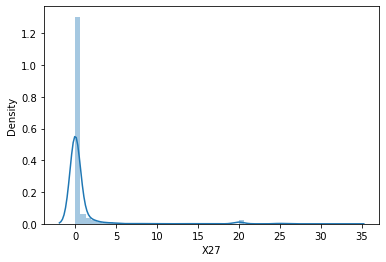


Histogram of X27
----------------------------------------------------------------------------


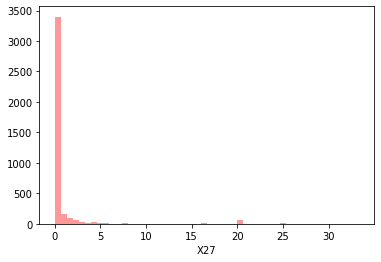


Histogram with mean, median and mode of X27
----------------------------------------------------------------------------
Mean:  0.7571202046035806 
Median:  0.0 
Mode:  0.0


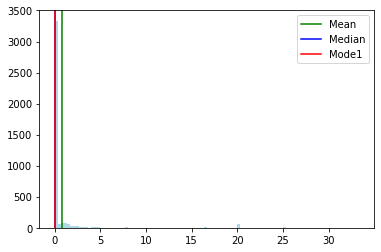


PDF and CDF plot of : X27
----------------------------------------------------------------------------
[9.57544757e-01 1.30434783e-02 3.32480818e-03 1.79028133e-03
 3.06905371e-03 0.00000000e+00 1.68797954e-02 3.58056266e-03
 0.00000000e+00 7.67263427e-04]
[ 0.     3.333  6.666  9.999 13.332 16.665 19.998 23.331 26.664 29.997
 33.33 ]
[0.95754476 0.97058824 0.97391304 0.97570332 0.97877238 0.97877238
 0.99565217 0.99923274 0.99923274 1.        ]

Skewness of X27
----------------------------------------------------------------------------
5.8088128149815335

Description of X28
----------------------------------------------------------------------------
count    3910.000000
mean        0.125312
std         0.545827
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         9.090000
Name: X28, dtype: float64 
Central values of X28
----------------------------------------------------------------------------

Minimum :  0.0 
Maximum :  9.09 
Mean value 

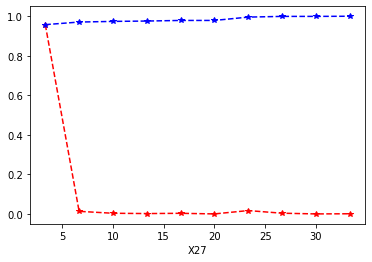

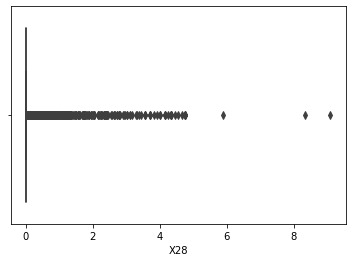


distplot of X28
----------------------------------------------------------------------------


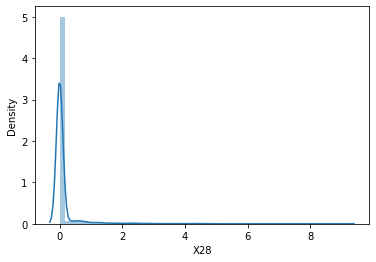


Histogram of X28
----------------------------------------------------------------------------


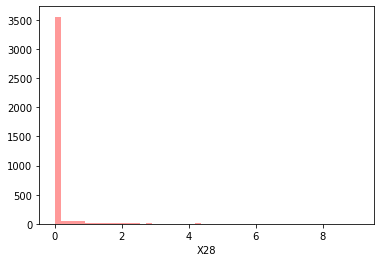


Histogram with mean, median and mode of X28
----------------------------------------------------------------------------
Mean:  0.12531202046035805 
Median:  0.0 
Mode:  0.0


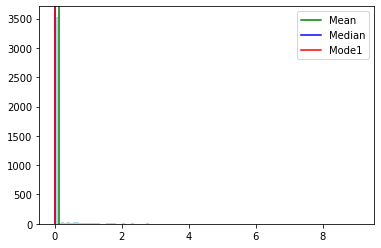


PDF and CDF plot of : X28
----------------------------------------------------------------------------
[9.56265985e-01 2.14833760e-02 9.97442455e-03 5.62659847e-03
 4.60358056e-03 1.27877238e-03 2.55754476e-04 0.00000000e+00
 0.00000000e+00 5.11508951e-04]
[0.    0.909 1.818 2.727 3.636 4.545 5.454 6.363 7.272 8.181 9.09 ]
[0.95626598 0.97774936 0.98772379 0.99335038 0.99795396 0.99923274
 0.99948849 0.99948849 0.99948849 1.        ]

Skewness of X28
----------------------------------------------------------------------------
6.7052671470476195

Description of X29
----------------------------------------------------------------------------
count    3910.000000
mean        0.100320
std         0.608313
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        14.280000
Name: X29, dtype: float64 
Central values of X29
----------------------------------------------------------------------------

Minimum :  0.0 
Maximum :  14.28 
Mean value :  0.100319

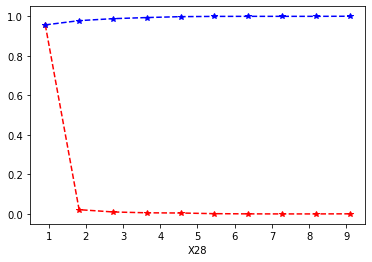

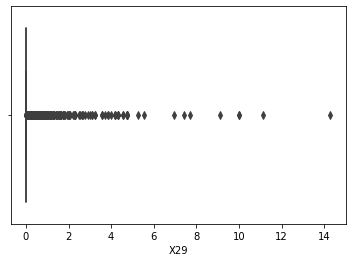


distplot of X29
----------------------------------------------------------------------------


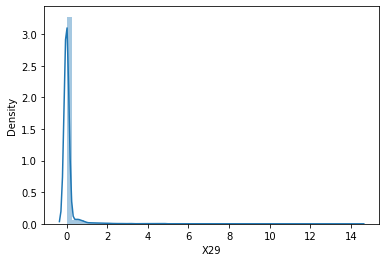


Histogram of X29
----------------------------------------------------------------------------


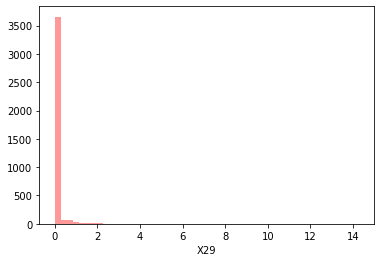


Histogram with mean, median and mode of X29
----------------------------------------------------------------------------
Mean:  0.10031969309462915 
Median:  0.0 
Mode:  0.0


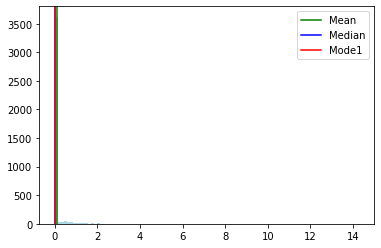


PDF and CDF plot of : X29
----------------------------------------------------------------------------
[9.81329923e-01 9.71867008e-03 3.83631714e-03 3.06905371e-03
 2.55754476e-04 5.11508951e-04 2.55754476e-04 7.67263427e-04
 0.00000000e+00 2.55754476e-04]
[ 0.     1.428  2.856  4.284  5.712  7.14   8.568  9.996 11.424 12.852
 14.28 ]
[0.98132992 0.99104859 0.99488491 0.99795396 0.99820972 0.99872123
 0.99897698 0.99974425 0.99974425 1.        ]

Skewness of X29
----------------------------------------------------------------------------
11.599637695016334

Description of X30
----------------------------------------------------------------------------
count    3910.000000
mean        0.105274
std         0.464483
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         5.880000
Name: X30, dtype: float64 
Central values of X30
----------------------------------------------------------------------------

Minimum :  0.0 
Maximum :  5.88 
Mean value 

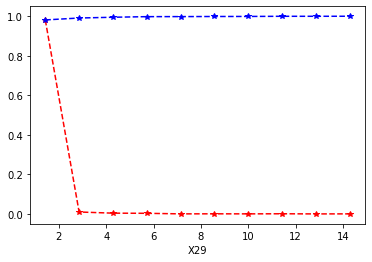

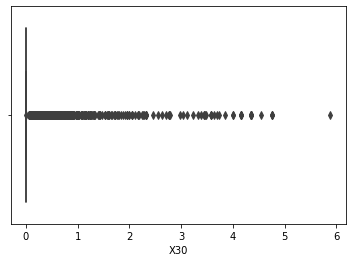


distplot of X30
----------------------------------------------------------------------------


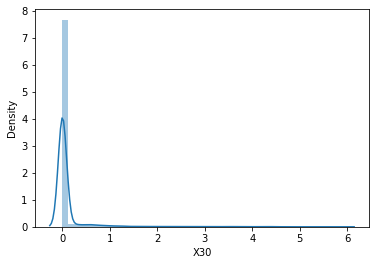


Histogram of X30
----------------------------------------------------------------------------


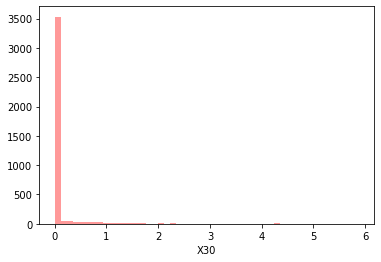


Histogram with mean, median and mode of X30
----------------------------------------------------------------------------
Mean:  0.10527365728900256 
Median:  0.0 
Mode:  0.0


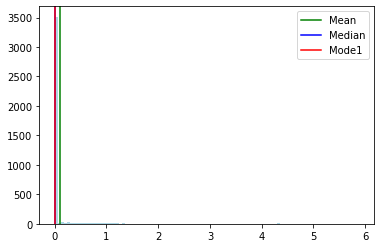


PDF and CDF plot of : X30
----------------------------------------------------------------------------
[9.43478261e-01 2.96675192e-02 9.97442455e-03 6.13810742e-03
 2.04603581e-03 2.55754476e-03 2.30179028e-03 2.81329923e-03
 7.67263427e-04 2.55754476e-04]
[0.    0.588 1.176 1.764 2.352 2.94  3.528 4.116 4.704 5.292 5.88 ]
[0.94347826 0.97314578 0.9831202  0.98925831 0.99130435 0.99386189
 0.99616368 0.99897698 0.99974425 1.        ]

Skewness of X30
----------------------------------------------------------------------------
6.478179573079771

Description of X31
----------------------------------------------------------------------------
count    3910.000000
mean        0.065859
std         0.409316
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        12.500000
Name: X31, dtype: float64 
Central values of X31
----------------------------------------------------------------------------

Minimum :  0.0 
Maximum :  12.5 
Mean value :  0.06585933

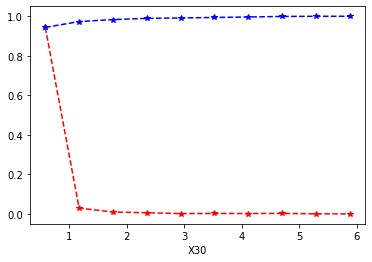

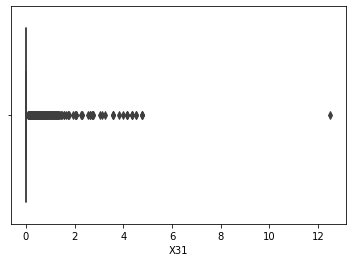


distplot of X31
----------------------------------------------------------------------------


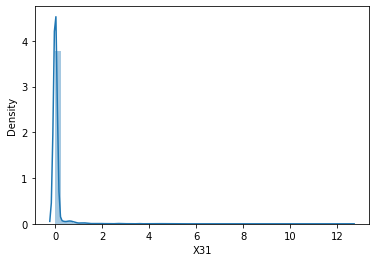


Histogram of X31
----------------------------------------------------------------------------


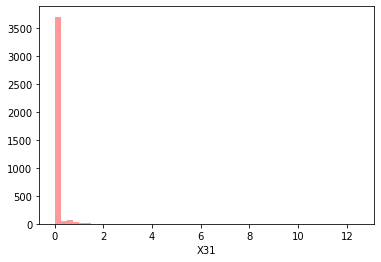


Histogram with mean, median and mode of X31
----------------------------------------------------------------------------
Mean:  0.06585933503836316 
Median:  0.0 
Mode:  0.0


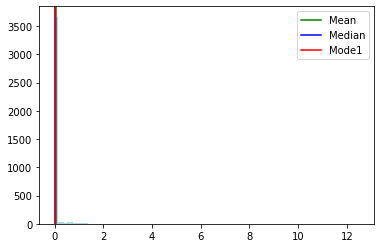


PDF and CDF plot of : X31
----------------------------------------------------------------------------
[9.86189258e-01 6.90537084e-03 3.32480818e-03 3.32480818e-03
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.55754476e-04]
[ 0.    1.25  2.5   3.75  5.    6.25  7.5   8.75 10.   11.25 12.5 ]
[0.98618926 0.99309463 0.99641944 0.99974425 0.99974425 0.99974425
 0.99974425 0.99974425 0.99974425 1.        ]

Skewness of X31
----------------------------------------------------------------------------
12.97209689314475

Description of X32
----------------------------------------------------------------------------
count    3910.000000
mean        0.046563
std         0.321900
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         4.760000
Name: X32, dtype: float64 
Central values of X32
----------------------------------------------------------------------------

Minimum :  0.0 
Maximum :  4.76 
Mean value :  0.04656265

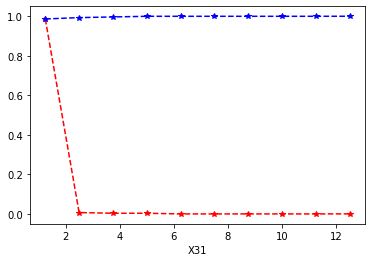

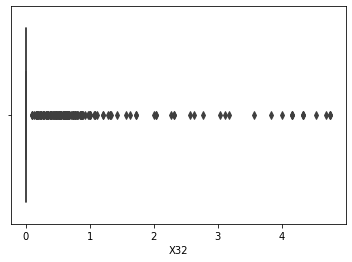


distplot of X32
----------------------------------------------------------------------------


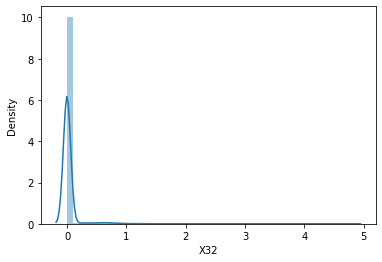


Histogram of X32
----------------------------------------------------------------------------


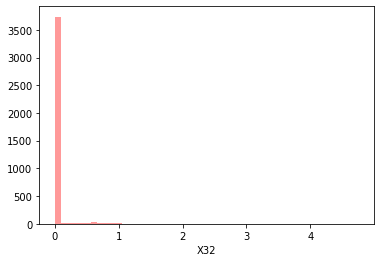


Histogram with mean, median and mode of X32
----------------------------------------------------------------------------
Mean:  0.04656265984654732 
Median:  0.0 
Mode:  0.0


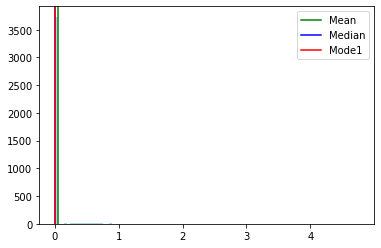


PDF and CDF plot of : X32
----------------------------------------------------------------------------
[9.69309463e-01 1.86700767e-02 4.34782609e-03 1.02301790e-03
 1.53452685e-03 7.67263427e-04 7.67263427e-04 2.55754476e-04
 1.27877238e-03 2.04603581e-03]
[0.    0.476 0.952 1.428 1.904 2.38  2.856 3.332 3.808 4.284 4.76 ]
[0.96930946 0.98797954 0.99232737 0.99335038 0.99488491 0.99565217
 0.99641944 0.99667519 0.99795396 1.        ]

Skewness of X32
----------------------------------------------------------------------------
10.51065955800452

Description of X33
----------------------------------------------------------------------------
count    3910.000000
mean        0.094281
std         0.538145
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        18.180000
Name: X33, dtype: float64 
Central values of X33
----------------------------------------------------------------------------

Minimum :  0.0 
Maximum :  18.18 
Mean value :  0.0942813

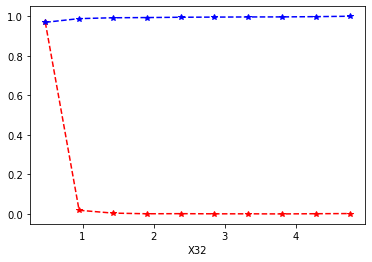

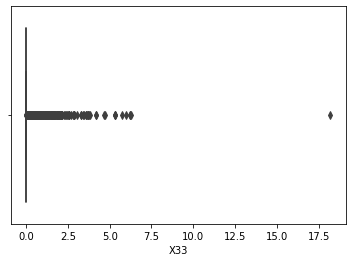


distplot of X33
----------------------------------------------------------------------------


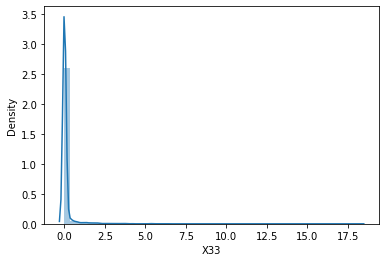


Histogram of X33
----------------------------------------------------------------------------


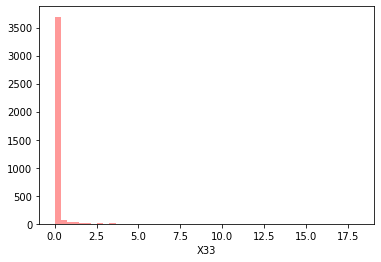


Histogram with mean, median and mode of X33
----------------------------------------------------------------------------
Mean:  0.09428132992327365 
Median:  0.0 
Mode:  0.0


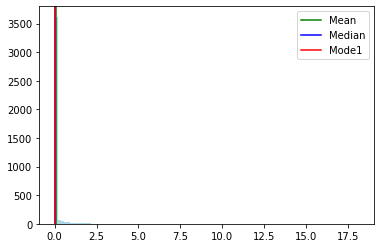


PDF and CDF plot of : X33
----------------------------------------------------------------------------
[9.84654731e-01 1.09974425e-02 2.81329923e-03 1.27877238e-03
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.55754476e-04]
[ 0.     1.818  3.636  5.454  7.272  9.09  10.908 12.726 14.544 16.362
 18.18 ]
[0.98465473 0.99565217 0.99846547 0.99974425 0.99974425 0.99974425
 0.99974425 0.99974425 0.99974425 1.        ]

Skewness of X33
----------------------------------------------------------------------------
14.397097046463072

Description of X34
----------------------------------------------------------------------------
count    3910.000000
mean        0.047409
std         0.322958
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         4.760000
Name: X34, dtype: float64 
Central values of X34
----------------------------------------------------------------------------

Minimum :  0.0 
Maximum :  4.76 
Mean value 

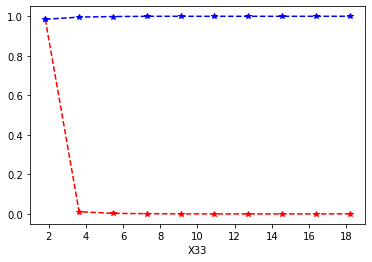

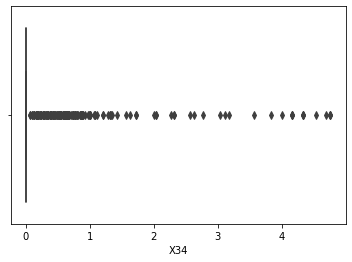


distplot of X34
----------------------------------------------------------------------------


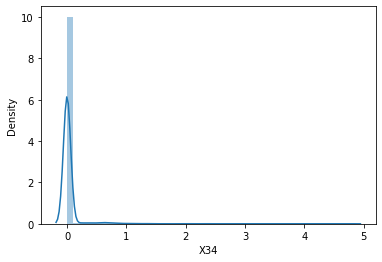


Histogram of X34
----------------------------------------------------------------------------


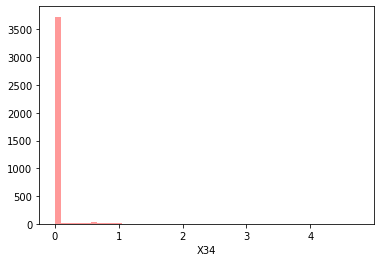


Histogram with mean, median and mode of X34
----------------------------------------------------------------------------
Mean:  0.04740920716112532 
Median:  0.0 
Mode:  0.0


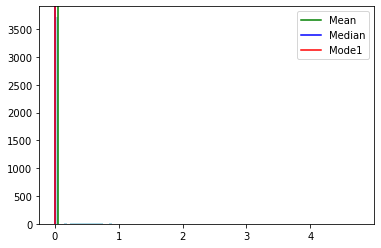


PDF and CDF plot of : X34
----------------------------------------------------------------------------
[9.68542199e-01 1.91815857e-02 4.60358056e-03 1.02301790e-03
 1.53452685e-03 7.67263427e-04 7.67263427e-04 2.55754476e-04
 1.27877238e-03 2.04603581e-03]
[0.    0.476 0.952 1.428 1.904 2.38  2.856 3.332 3.808 4.284 4.76 ]
[0.9685422  0.98772379 0.99232737 0.99335038 0.99488491 0.99565217
 0.99641944 0.99667519 0.99795396 1.        ]

Skewness of X34
----------------------------------------------------------------------------
10.422435358768656

Description of X35
----------------------------------------------------------------------------
count    3910.000000
mean        0.108414
std         0.551546
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        20.000000
Name: X35, dtype: float64 
Central values of X35
----------------------------------------------------------------------------

Minimum :  0.0 
Maximum :  20.0 
Mean value :  0.1084143

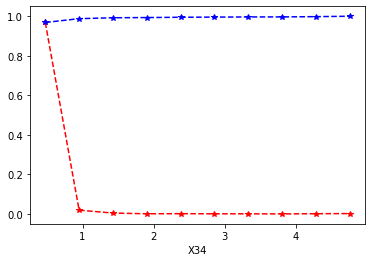

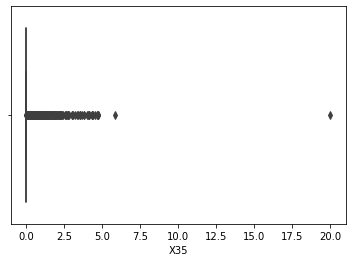


distplot of X35
----------------------------------------------------------------------------


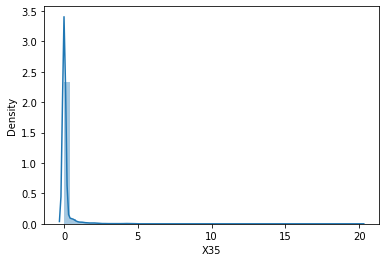


Histogram of X35
----------------------------------------------------------------------------


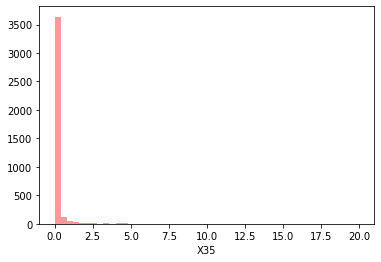


Histogram with mean, median and mode of X35
----------------------------------------------------------------------------
Mean:  0.10841432225063938 
Median:  0.0 
Mode:  0.0


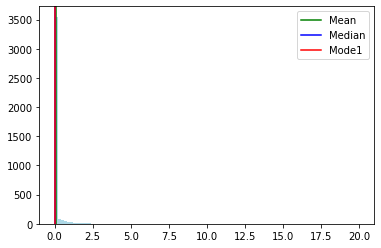


PDF and CDF plot of : X35
----------------------------------------------------------------------------
[9.85166240e-01 1.07416880e-02 3.83631714e-03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.55754476e-04]
[ 0.  2.  4.  6.  8. 10. 12. 14. 16. 18. 20.]
[0.98516624 0.99590793 0.99974425 0.99974425 0.99974425 0.99974425
 0.99974425 0.99974425 0.99974425 1.        ]

Skewness of X35
----------------------------------------------------------------------------
15.544494642568758

Description of X36
----------------------------------------------------------------------------
count    3910.000000
mean        0.094258
std         0.395220
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         7.690000
Name: X36, dtype: float64 
Central values of X36
----------------------------------------------------------------------------

Minimum :  0.0 
Maximum :  7.69 
Mean value :  0.09425831202046037 
Median val

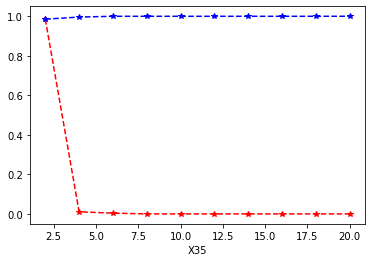

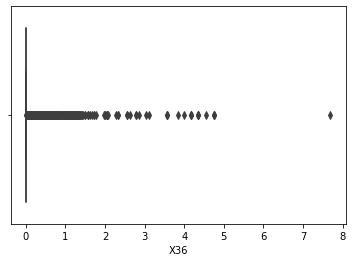


distplot of X36
----------------------------------------------------------------------------


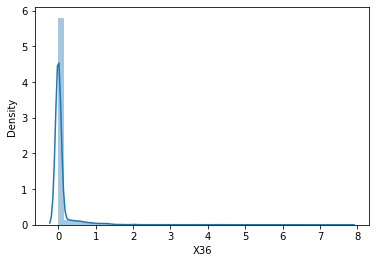


Histogram of X36
----------------------------------------------------------------------------


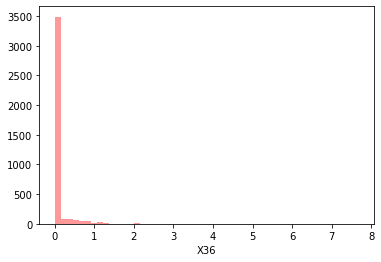


Histogram with mean, median and mode of X36
----------------------------------------------------------------------------
Mean:  0.09425831202046037 
Median:  0.0 
Mode:  0.0


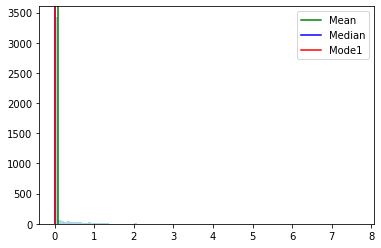


PDF and CDF plot of : X36
----------------------------------------------------------------------------
[9.60358056e-01 2.86445013e-02 4.34782609e-03 2.30179028e-03
 1.27877238e-03 2.04603581e-03 7.67263427e-04 0.00000000e+00
 0.00000000e+00 2.55754476e-04]
[0.    0.769 1.538 2.307 3.076 3.845 4.614 5.383 6.152 6.921 7.69 ]
[0.96035806 0.98900256 0.99335038 0.99565217 0.99693095 0.99897698
 0.99974425 0.99974425 0.99974425 1.        ]

Skewness of X36
----------------------------------------------------------------------------
7.910055914239532

Description of X37
----------------------------------------------------------------------------
count    3910.000000
mean        0.134980
std         0.409085
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         5.050000
Name: X37, dtype: float64 
Central values of X37
----------------------------------------------------------------------------

Minimum :  0.0 
Maximum :  5.05 
Mean value :  0.13497953

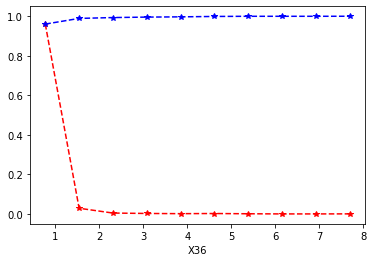

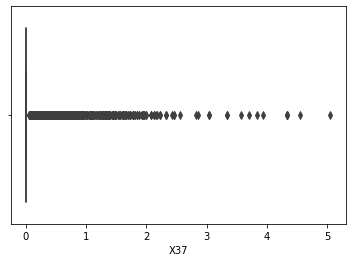


distplot of X37
----------------------------------------------------------------------------


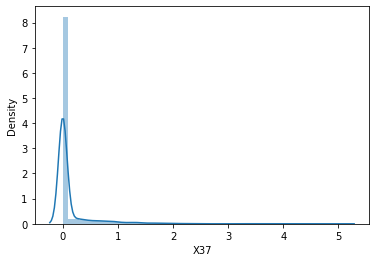


Histogram of X37
----------------------------------------------------------------------------


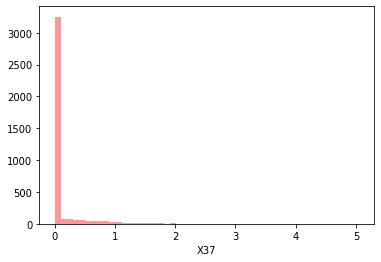


Histogram with mean, median and mode of X37
----------------------------------------------------------------------------
Mean:  0.13497953964194373 
Median:  0.0 
Mode:  0.0


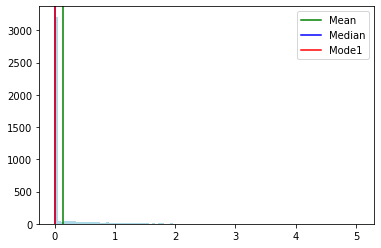


PDF and CDF plot of : X37
----------------------------------------------------------------------------
[9.02813299e-01 5.31969309e-02 2.50639386e-02 1.15089514e-02
 3.32480818e-03 1.27877238e-03 5.11508951e-04 1.02301790e-03
 1.02301790e-03 2.55754476e-04]
[0.    0.505 1.01  1.515 2.02  2.525 3.03  3.535 4.04  4.545 5.05 ]
[0.9028133  0.95601023 0.98107417 0.99258312 0.99590793 0.9971867
 0.99769821 0.99872123 0.99974425 1.        ]

Skewness of X37
----------------------------------------------------------------------------
4.825109325184749

Description of X38
----------------------------------------------------------------------------
count    3910.000000
mean        0.013463
std         0.215280
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         8.330000
Name: X38, dtype: float64 
Central values of X38
----------------------------------------------------------------------------

Minimum :  0.0 
Maximum :  8.33 
Mean value :  0.013462915

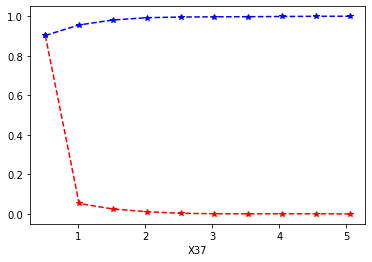

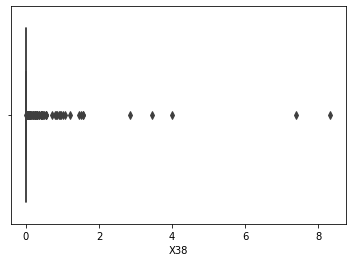


distplot of X38
----------------------------------------------------------------------------


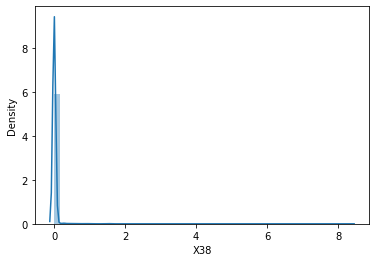


Histogram of X38
----------------------------------------------------------------------------


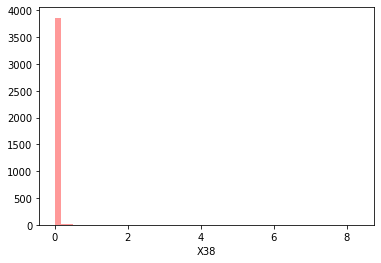


Histogram with mean, median and mode of X38
----------------------------------------------------------------------------
Mean:  0.013462915601023017 
Median:  0.0 
Mode:  0.0


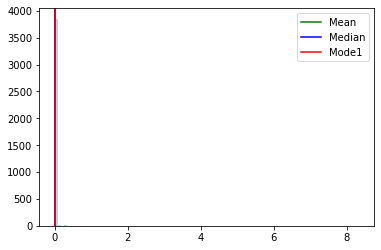


PDF and CDF plot of : X38
----------------------------------------------------------------------------
[9.95907928e-01 2.81329923e-03 0.00000000e+00 2.55754476e-04
 5.11508951e-04 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.55754476e-04 2.55754476e-04]
[0.    0.833 1.666 2.499 3.332 4.165 4.998 5.831 6.664 7.497 8.33 ]
[0.99590793 0.99872123 0.99872123 0.99897698 0.99948849 0.99948849
 0.99948849 0.99948849 0.99974425 1.        ]

Skewness of X38
----------------------------------------------------------------------------
28.934799869413308

Description of X39
----------------------------------------------------------------------------
count    3910.000000
mean        0.080286
std         0.423936
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        11.110000
Name: X39, dtype: float64 
Central values of X39
----------------------------------------------------------------------------

Minimum :  0.0 
Maximum :  11.11 
Mean value :  0.080286

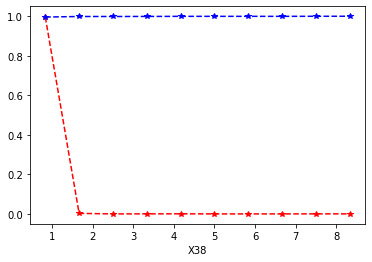

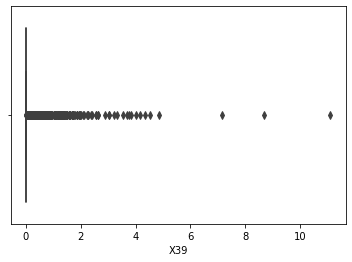


distplot of X39
----------------------------------------------------------------------------


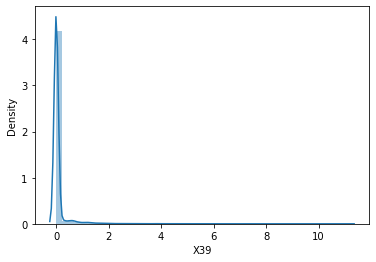


Histogram of X39
----------------------------------------------------------------------------


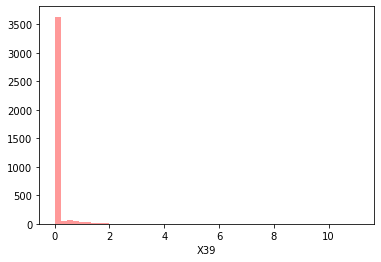


Histogram with mean, median and mode of X39
----------------------------------------------------------------------------
Mean:  0.08028644501278771 
Median:  0.0 
Mode:  0.0


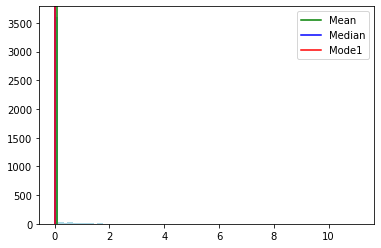


PDF and CDF plot of : X39
----------------------------------------------------------------------------
[9.76726343e-01 1.68797954e-02 3.32480818e-03 1.79028133e-03
 5.11508951e-04 0.00000000e+00 2.55754476e-04 2.55754476e-04
 0.00000000e+00 2.55754476e-04]
[ 0.     1.111  2.222  3.333  4.444  5.555  6.666  7.777  8.888  9.999
 11.11 ]
[0.97672634 0.99360614 0.99693095 0.99872123 0.99923274 0.99923274
 0.99948849 0.99974425 0.99974425 1.        ]

Skewness of X39
----------------------------------------------------------------------------
11.515878875302898

Description of X40
----------------------------------------------------------------------------
count    3910.000000
mean        0.065077
std         0.346739
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         4.760000
Name: X40, dtype: float64 
Central values of X40
----------------------------------------------------------------------------

Minimum :  0.0 
Maximum :  4.76 
Mean value 

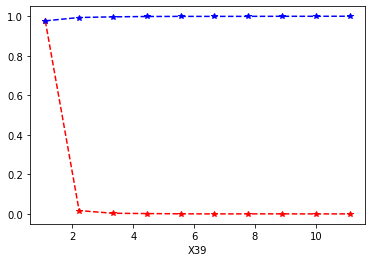

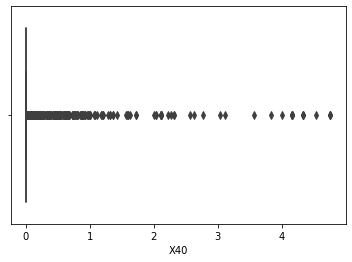


distplot of X40
----------------------------------------------------------------------------


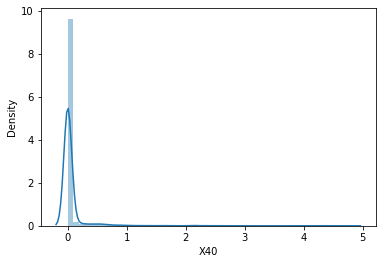


Histogram of X40
----------------------------------------------------------------------------


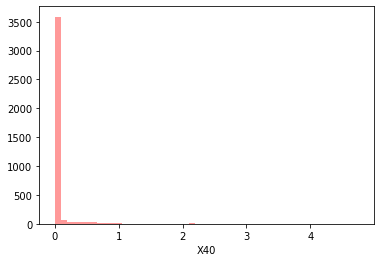


Histogram with mean, median and mode of X40
----------------------------------------------------------------------------
Mean:  0.065076726342711 
Median:  0.0 
Mode:  0.0


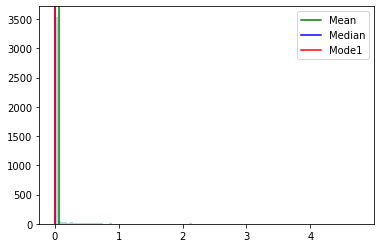


PDF and CDF plot of : X40
----------------------------------------------------------------------------
[9.58823529e-01 2.50639386e-02 5.37084399e-03 1.79028133e-03
 3.83631714e-03 7.67263427e-04 5.11508951e-04 2.55754476e-04
 1.79028133e-03 1.79028133e-03]
[0.    0.476 0.952 1.428 1.904 2.38  2.856 3.332 3.808 4.284 4.76 ]
[0.95882353 0.98388747 0.98925831 0.99104859 0.99488491 0.99565217
 0.99616368 0.99641944 0.99820972 1.        ]

Skewness of X40
----------------------------------------------------------------------------
8.939516636602152

Description of X41
----------------------------------------------------------------------------
count    3910.000000
mean        0.044959
std         0.375329
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         7.140000
Name: X41, dtype: float64 
Central values of X41
----------------------------------------------------------------------------

Minimum :  0.0 
Maximum :  7.14 
Mean value :  0.04495907

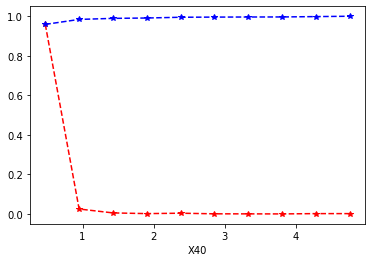

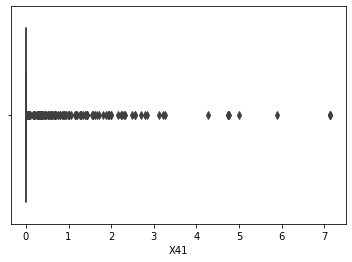


distplot of X41
----------------------------------------------------------------------------


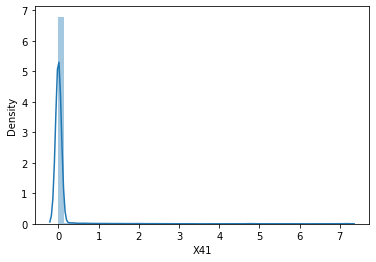


Histogram of X41
----------------------------------------------------------------------------


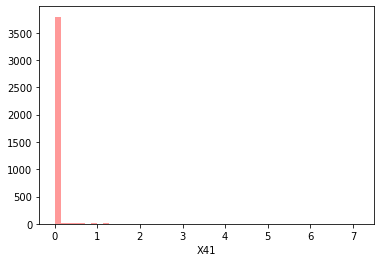


Histogram with mean, median and mode of X41
----------------------------------------------------------------------------
Mean:  0.04495907928388747 
Median:  0.0 
Mode:  0.0


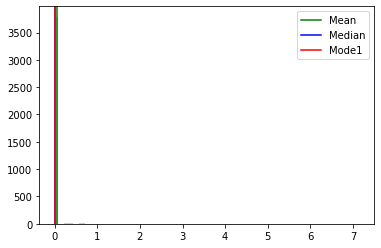


PDF and CDF plot of : X41
----------------------------------------------------------------------------
[9.82864450e-01 6.64961637e-03 4.09207161e-03 2.81329923e-03
 7.67263427e-04 2.55754476e-04 1.02301790e-03 2.55754476e-04
 2.55754476e-04 1.02301790e-03]
[0.    0.714 1.428 2.142 2.856 3.57  4.284 4.998 5.712 6.426 7.14 ]
[0.98286445 0.98951407 0.99360614 0.99641944 0.9971867  0.99744246
 0.99846547 0.99872123 0.99897698 1.        ]

Skewness of X41
----------------------------------------------------------------------------
12.634940150384486

Description of X42
----------------------------------------------------------------------------
count    3910.000000
mean        0.139182
std         0.800478
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        14.280000
Name: X42, dtype: float64 
Central values of X42
----------------------------------------------------------------------------

Minimum :  0.0 
Maximum :  14.28 
Mean value :  0.139181

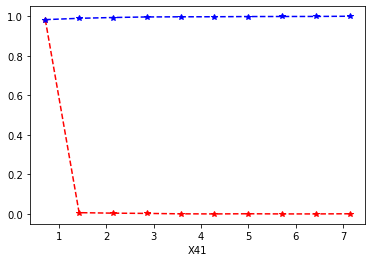

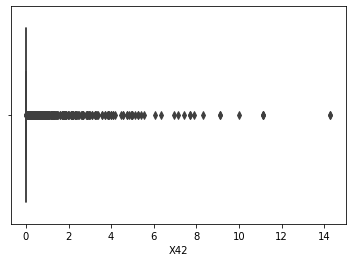


distplot of X42
----------------------------------------------------------------------------


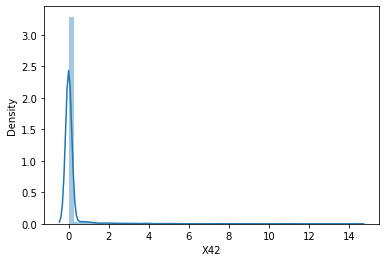


Histogram of X42
----------------------------------------------------------------------------


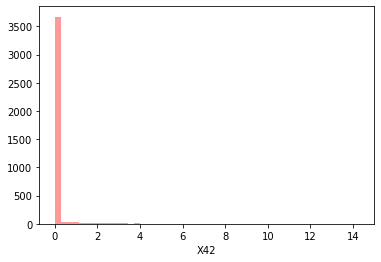


Histogram with mean, median and mode of X42
----------------------------------------------------------------------------
Mean:  0.13918158567774938 
Median:  0.0 
Mode:  0.0


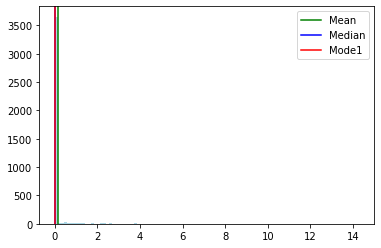


PDF and CDF plot of : X42
----------------------------------------------------------------------------
[9.71355499e-01 1.32992327e-02 7.16112532e-03 3.83631714e-03
 7.67263427e-04 1.53452685e-03 5.11508951e-04 1.02301790e-03
 0.00000000e+00 5.11508951e-04]
[ 0.     1.428  2.856  4.284  5.712  7.14   8.568  9.996 11.424 12.852
 14.28 ]
[0.9713555  0.98465473 0.99181586 0.99565217 0.99641944 0.99795396
 0.99846547 0.99948849 0.99948849 1.        ]

Skewness of X42
----------------------------------------------------------------------------
9.342855671193043

Description of X43
----------------------------------------------------------------------------
count    3910.000000
mean        0.047609
std         0.231074
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         3.570000
Name: X43, dtype: float64 
Central values of X43
----------------------------------------------------------------------------

Minimum :  0.0 
Maximum :  3.57 
Mean value :

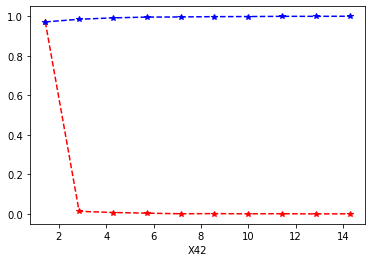

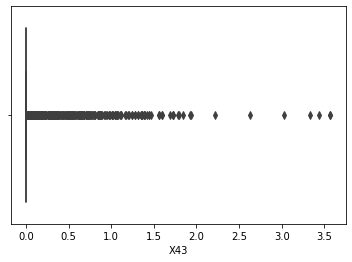


distplot of X43
----------------------------------------------------------------------------


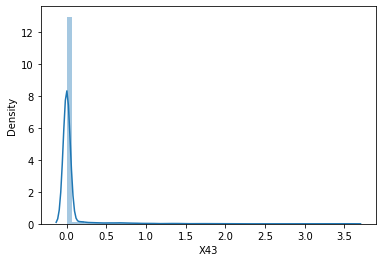


Histogram of X43
----------------------------------------------------------------------------


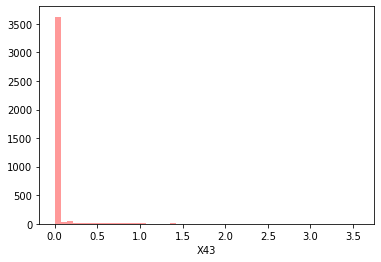


Histogram with mean, median and mode of X43
----------------------------------------------------------------------------
Mean:  0.047608695652173905 
Median:  0.0 
Mode:  0.0


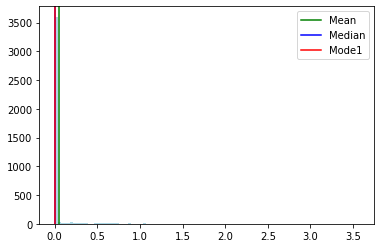


PDF and CDF plot of : X43
----------------------------------------------------------------------------
[9.55754476e-01 1.99488491e-02 1.27877238e-02 5.62659847e-03
 3.06905371e-03 1.02301790e-03 2.55754476e-04 2.55754476e-04
 2.55754476e-04 1.02301790e-03]
[0.    0.357 0.714 1.071 1.428 1.785 2.142 2.499 2.856 3.213 3.57 ]
[0.95575448 0.97570332 0.98849105 0.99411765 0.9971867  0.99820972
 0.99846547 0.99872123 0.99897698 1.        ]

Skewness of X43
----------------------------------------------------------------------------
7.628844581771867

Description of X44
----------------------------------------------------------------------------
count    3910.000000
mean        0.081987
std         0.652636
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        20.000000
Name: X44, dtype: float64 
Central values of X44
----------------------------------------------------------------------------

Minimum :  0.0 
Maximum :  20.0 
Mean value :  0.08198721

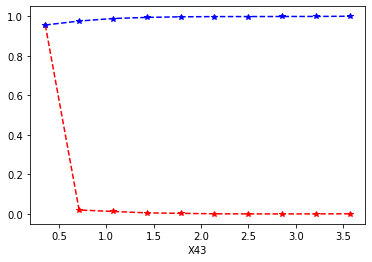

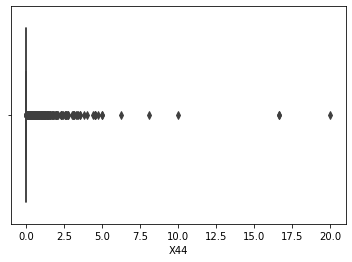


distplot of X44
----------------------------------------------------------------------------


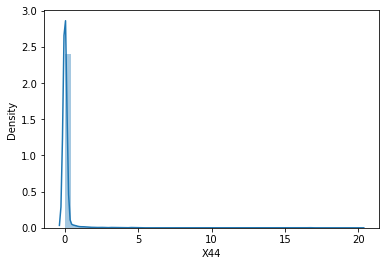


Histogram of X44
----------------------------------------------------------------------------


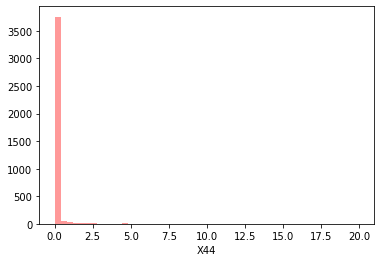


Histogram with mean, median and mode of X44
----------------------------------------------------------------------------
Mean:  0.08198721227621483 
Median:  0.0 
Mode:  0.0


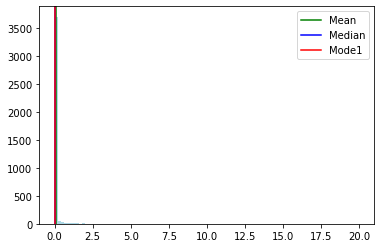


PDF and CDF plot of : X44
----------------------------------------------------------------------------
[9.89258312e-01 6.90537084e-03 2.30179028e-03 2.55754476e-04
 2.55754476e-04 2.55754476e-04 0.00000000e+00 0.00000000e+00
 5.11508951e-04 2.55754476e-04]
[ 0.  2.  4.  6.  8. 10. 12. 14. 16. 18. 20.]
[0.98925831 0.99616368 0.99846547 0.99872123 0.99897698 0.99923274
 0.99923274 0.99923274 0.99974425 1.        ]

Skewness of X44
----------------------------------------------------------------------------
18.69202296480537

Description of X45
----------------------------------------------------------------------------
count    3910.000000
mean        0.313151
std         1.063868
min         0.000000
25%         0.000000
50%         0.000000
75%         0.120000
max        21.420000
Name: X45, dtype: float64 
Central values of X45
----------------------------------------------------------------------------

Minimum :  0.0 
Maximum :  21.42 
Mean value :  0.31315089514066496 
Median val

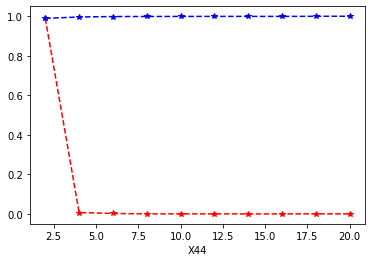

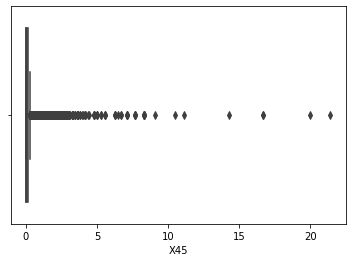


distplot of X45
----------------------------------------------------------------------------


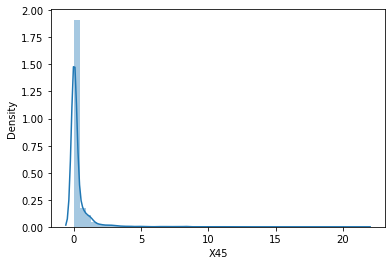


Histogram of X45
----------------------------------------------------------------------------


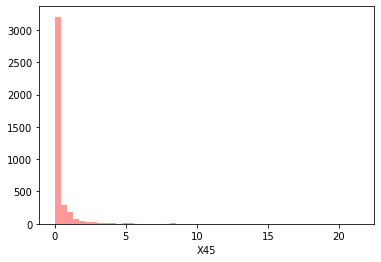


Histogram with mean, median and mode of X45
----------------------------------------------------------------------------
Mean:  0.31315089514066496 
Median:  0.0 
Mode:  0.0


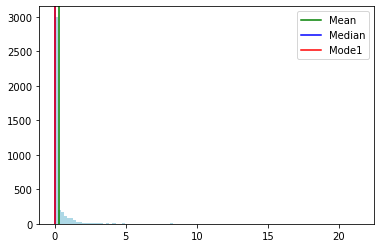


PDF and CDF plot of : X45
----------------------------------------------------------------------------
[9.67774936e-01 2.12276215e-02 4.60358056e-03 4.34782609e-03
 5.11508951e-04 2.55754476e-04 2.55754476e-04 5.11508951e-04
 0.00000000e+00 5.11508951e-04]
[ 0.     2.142  4.284  6.426  8.568 10.71  12.852 14.994 17.136 19.278
 21.42 ]
[0.96777494 0.98900256 0.99360614 0.99795396 0.99846547 0.99872123
 0.99897698 0.99948849 0.99948849 1.        ]

Skewness of X45
----------------------------------------------------------------------------
9.014454044301353

Description of X46
----------------------------------------------------------------------------
count    3910.000000
mean        0.182662
std         0.944817
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        22.050000
Name: X46, dtype: float64 
Central values of X46
----------------------------------------------------------------------------

Minimum :  0.0 
Maximum :  22.05 
Mean value 

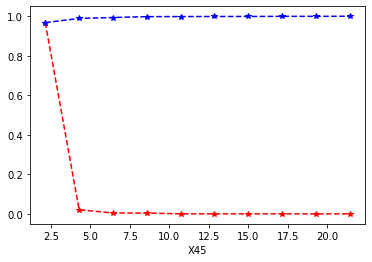

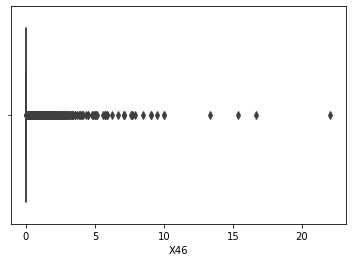


distplot of X46
----------------------------------------------------------------------------


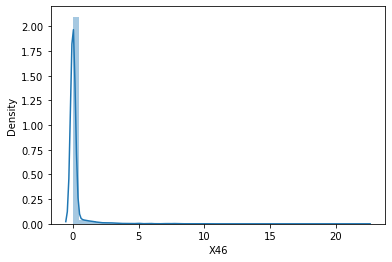


Histogram of X46
----------------------------------------------------------------------------


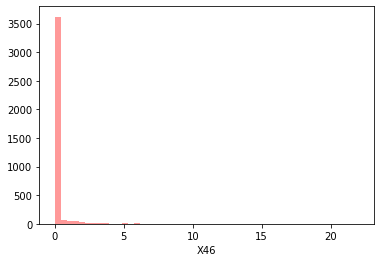


Histogram with mean, median and mode of X46
----------------------------------------------------------------------------
Mean:  0.18266240409207163 
Median:  0.0 
Mode:  0.0


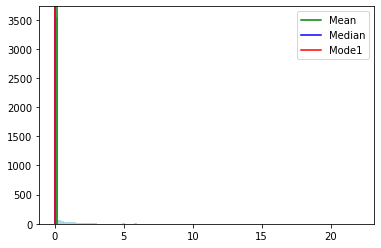


PDF and CDF plot of : X46
----------------------------------------------------------------------------
[9.75703325e-01 1.40664962e-02 5.11508951e-03 2.81329923e-03
 1.27877238e-03 0.00000000e+00 5.11508951e-04 2.55754476e-04
 0.00000000e+00 2.55754476e-04]
[ 0.     2.205  4.41   6.615  8.82  11.025 13.23  15.435 17.64  19.845
 22.05 ]
[0.97570332 0.98976982 0.99488491 0.99769821 0.99897698 0.99897698
 0.99948849 0.99974425 0.99974425 1.        ]

Skewness of X46
----------------------------------------------------------------------------
10.191789933256683

Description of X47
----------------------------------------------------------------------------
count    3910.000000
mean        0.006054
std         0.081662
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.170000
Name: X47, dtype: float64 
Central values of X47
----------------------------------------------------------------------------

Minimum :  0.0 
Maximum :  2.17 
Mean value 

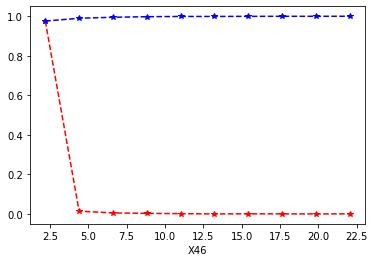

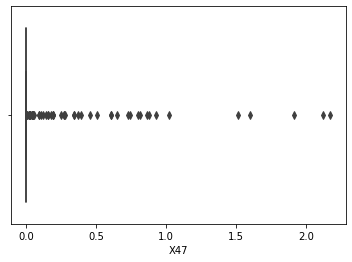


distplot of X47
----------------------------------------------------------------------------


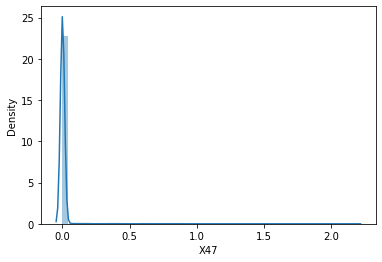


Histogram of X47
----------------------------------------------------------------------------


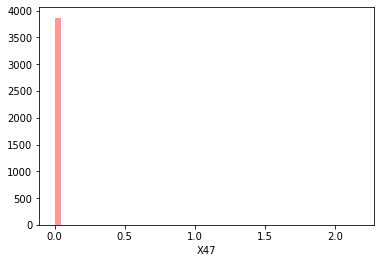


Histogram with mean, median and mode of X47
----------------------------------------------------------------------------
Mean:  0.006053708439897699 
Median:  0.0 
Mode:  0.0


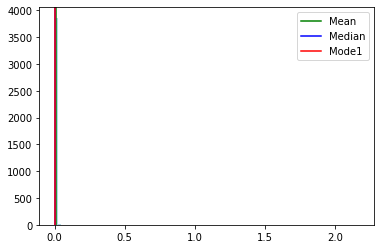


PDF and CDF plot of : X47
----------------------------------------------------------------------------
[9.93350384e-01 2.04603581e-03 1.27877238e-03 1.27877238e-03
 7.67263427e-04 0.00000000e+00 2.55754476e-04 2.55754476e-04
 2.55754476e-04 5.11508951e-04]
[0.    0.217 0.434 0.651 0.868 1.085 1.302 1.519 1.736 1.953 2.17 ]
[0.99335038 0.99539642 0.99667519 0.99795396 0.99872123 0.99872123
 0.99897698 0.99923274 0.99948849 1.        ]

Skewness of X47
----------------------------------------------------------------------------
18.831604516806735

Description of X48
----------------------------------------------------------------------------
count    3910.000000
mean        0.033281
std         0.301611
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        10.000000
Name: X48, dtype: float64 
Central values of X48
----------------------------------------------------------------------------

Minimum :  0.0 
Maximum :  10.0 
Mean value :  0.0332813

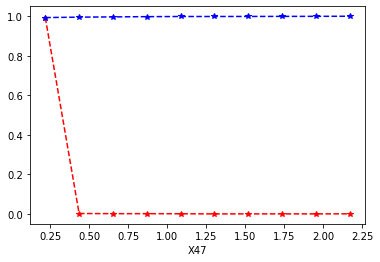

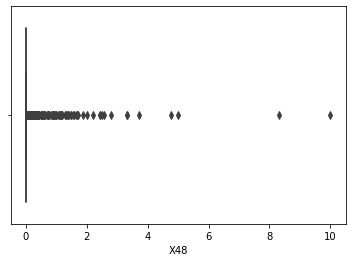


distplot of X48
----------------------------------------------------------------------------


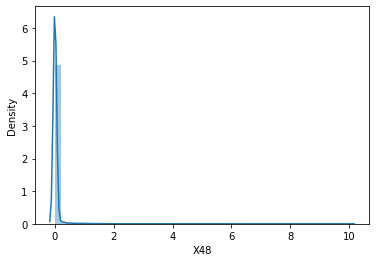


Histogram of X48
----------------------------------------------------------------------------


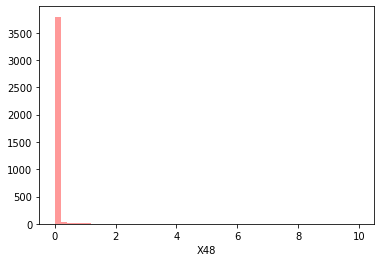


Histogram with mean, median and mode of X48
----------------------------------------------------------------------------
Mean:  0.03328132992327366 
Median:  0.0 
Mode:  0.0


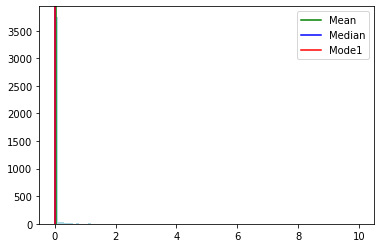


PDF and CDF plot of : X48
----------------------------------------------------------------------------
[9.90537084e-01 5.88235294e-03 1.79028133e-03 7.67263427e-04
 2.55754476e-04 2.55754476e-04 0.00000000e+00 0.00000000e+00
 2.55754476e-04 2.55754476e-04]
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
[0.99053708 0.99641944 0.99820972 0.99897698 0.99923274 0.99948849
 0.99948849 0.99948849 0.99974425 1.        ]

Skewness of X48
----------------------------------------------------------------------------
19.39074010935205

Description of X49
----------------------------------------------------------------------------
count    3910.000000
mean        0.037493
std         0.235054
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         4.385000
Name: X49, dtype: float64 
Central values of X49
----------------------------------------------------------------------------

Minimum :  0.0 
Maximum :  4.385 
Mean value :  0.037492583120204606 
Median va

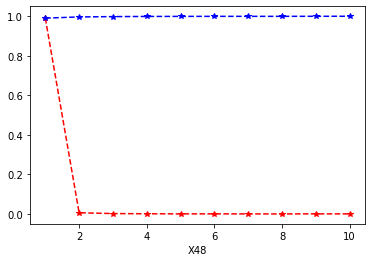

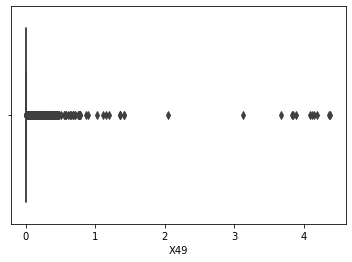


distplot of X49
----------------------------------------------------------------------------


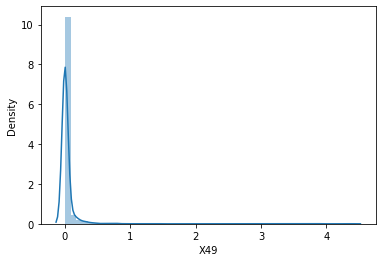


Histogram of X49
----------------------------------------------------------------------------


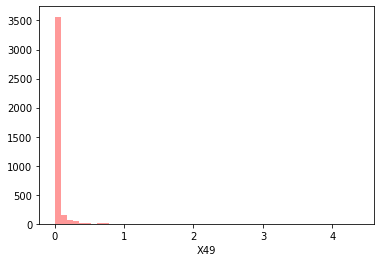


Histogram with mean, median and mode of X49
----------------------------------------------------------------------------
Mean:  0.037492583120204606 
Median:  0.0 
Mode:  0.0


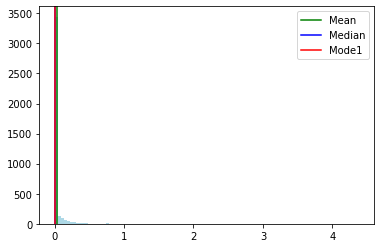


PDF and CDF plot of : X49
----------------------------------------------------------------------------
[9.85933504e-01 8.43989770e-03 1.27877238e-03 1.27877238e-03
 2.55754476e-04 0.00000000e+00 0.00000000e+00 2.55754476e-04
 1.02301790e-03 1.53452685e-03]
[0.     0.4385 0.877  1.3155 1.754  2.1925 2.631  3.0695 3.508  3.9465
 4.385 ]
[0.9859335  0.9943734  0.99565217 0.99693095 0.9971867  0.9971867
 0.9971867  0.99744246 0.99846547 1.        ]

Skewness of X49
----------------------------------------------------------------------------
14.188192181396008

Description of X50
----------------------------------------------------------------------------
count    3910.000000
mean        0.139252
std         0.276309
min         0.000000
25%         0.000000
50%         0.066000
75%         0.188000
max         9.752000
Name: X50, dtype: float64 
Central values of X50
----------------------------------------------------------------------------

Minimum :  0.0 
Maximum :  9.752 
Mean value 

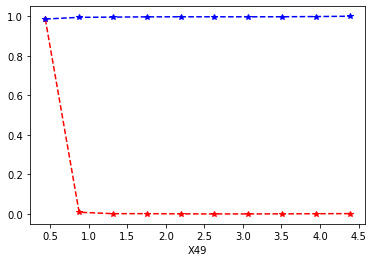

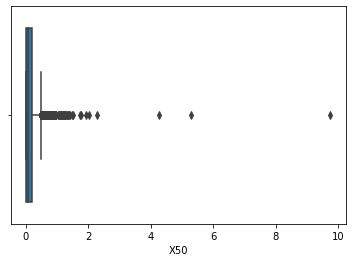


distplot of X50
----------------------------------------------------------------------------


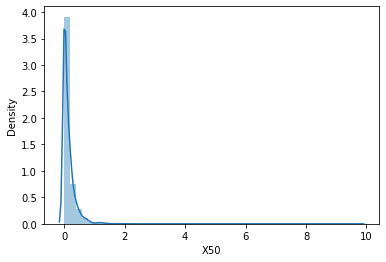


Histogram of X50
----------------------------------------------------------------------------


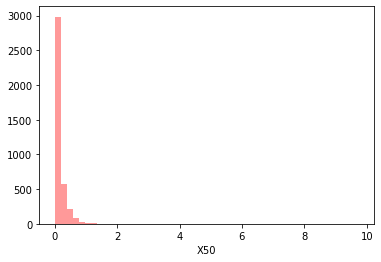


Histogram with mean, median and mode of X50
----------------------------------------------------------------------------
Mean:  0.13925242966751916 
Median:  0.066 
Mode:  0.0


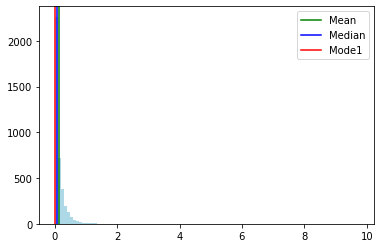


PDF and CDF plot of : X50
----------------------------------------------------------------------------
[9.89769821e-01 8.95140665e-03 5.11508951e-04 0.00000000e+00
 2.55754476e-04 2.55754476e-04 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.55754476e-04]
[0.     0.9752 1.9504 2.9256 3.9008 4.876  5.8512 6.8264 7.8016 8.7768
 9.752 ]
[0.98976982 0.99872123 0.99923274 0.99923274 0.99948849 0.99974425
 0.99974425 0.99974425 0.99974425 1.        ]

Skewness of X50
----------------------------------------------------------------------------
14.493459659797587

Description of X51
----------------------------------------------------------------------------
count    3910.000000
mean        0.015876
std         0.083600
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.777000
Name: X51, dtype: float64 
Central values of X51
----------------------------------------------------------------------------

Minimum :  0.0 
Maximum :  2.777 
Mean value

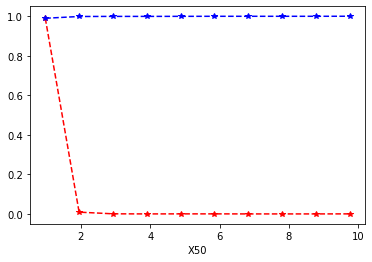

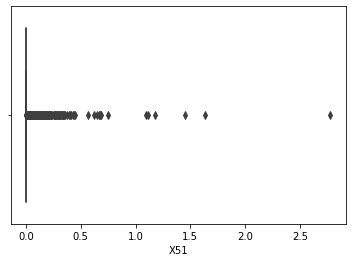


distplot of X51
----------------------------------------------------------------------------


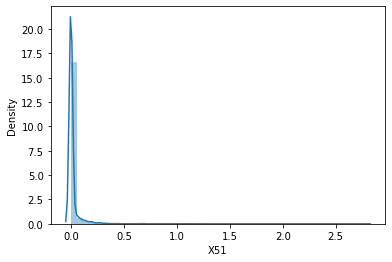


Histogram of X51
----------------------------------------------------------------------------


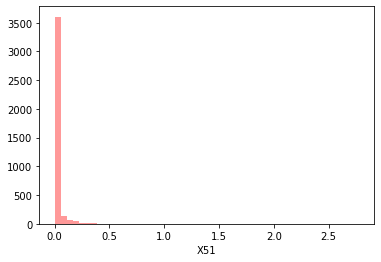


Histogram with mean, median and mode of X51
----------------------------------------------------------------------------
Mean:  0.015875703324808185 
Median:  0.0 
Mode:  0.0


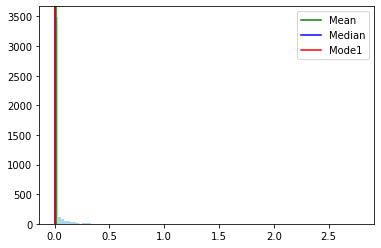


PDF and CDF plot of : X51
----------------------------------------------------------------------------
[9.90025575e-01 6.39386189e-03 2.04603581e-03 2.55754476e-04
 5.11508951e-04 5.11508951e-04 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.55754476e-04]
[0.     0.2777 0.5554 0.8331 1.1108 1.3885 1.6662 1.9439 2.2216 2.4993
 2.777 ]
[0.99002558 0.99641944 0.99846547 0.99872123 0.99923274 0.99974425
 0.99974425 0.99974425 0.99974425 1.        ]

Skewness of X51
----------------------------------------------------------------------------
15.875978941908848

Description of X52
----------------------------------------------------------------------------
count    3910.000000
mean        0.272971
std         0.858634
min         0.000000
25%         0.000000
50%         0.000000
75%         0.317250
max        32.478000
Name: X52, dtype: float64 
Central values of X52
----------------------------------------------------------------------------

Minimum :  0.0 
Maximum :  32.478 
Mean valu

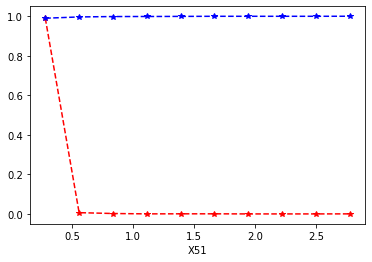

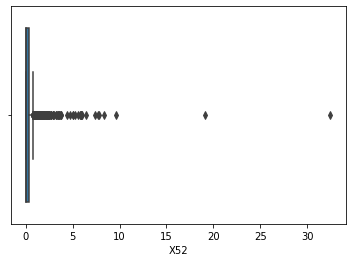


distplot of X52
----------------------------------------------------------------------------


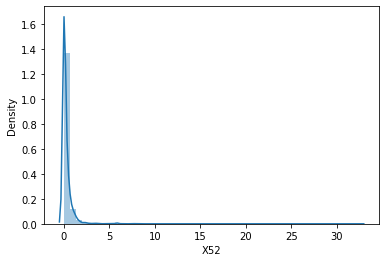


Histogram of X52
----------------------------------------------------------------------------


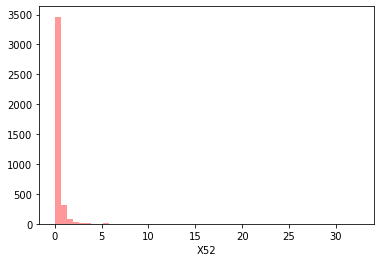


Histogram with mean, median and mode of X52
----------------------------------------------------------------------------
Mean:  0.27297109974424555 
Median:  0.0 
Mode:  0.0


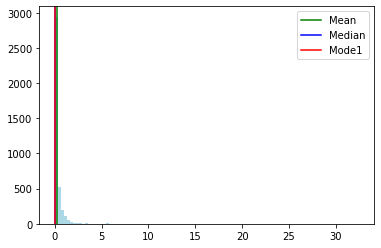


PDF and CDF plot of : X52
----------------------------------------------------------------------------
[9.91560102e-01 6.64961637e-03 1.27877238e-03 0.00000000e+00
 0.00000000e+00 2.55754476e-04 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.55754476e-04]
[ 0.      3.2478  6.4956  9.7434 12.9912 16.239  19.4868 22.7346 25.9824
 29.2302 32.478 ]
[0.9915601  0.99820972 0.99948849 0.99948849 0.99948849 0.99974425
 0.99974425 0.99974425 0.99974425 1.        ]

Skewness of X52
----------------------------------------------------------------------------
18.637518191562968

Description of X53
----------------------------------------------------------------------------
count    3910.000000
mean        0.077820
std         0.256991
min         0.000000
25%         0.000000
50%         0.000000
75%         0.054000
max         6.003000
Name: X53, dtype: float64 
Central values of X53
----------------------------------------------------------------------------

Minimum :  0.0 
Maximum :  6.0029

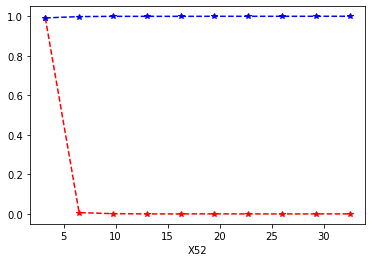

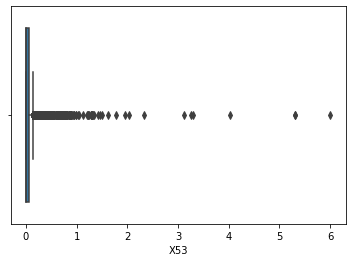


distplot of X53
----------------------------------------------------------------------------


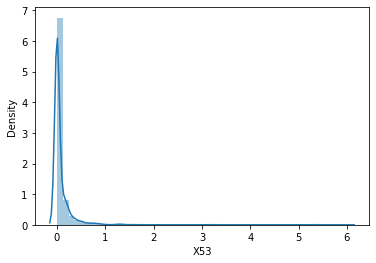


Histogram of X53
----------------------------------------------------------------------------


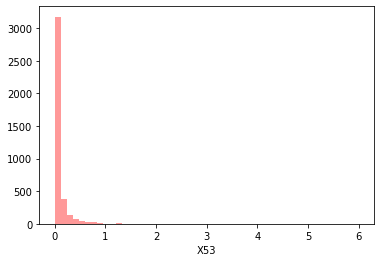


Histogram with mean, median and mode of X53
----------------------------------------------------------------------------
Mean:  0.07782020460358056 
Median:  0.0 
Mode:  0.0


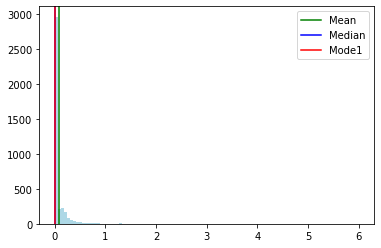


PDF and CDF plot of : X53
----------------------------------------------------------------------------
[9.74936061e-01 1.76470588e-02 4.85933504e-03 7.67263427e-04
 0.00000000e+00 7.67263427e-04 2.55754476e-04 0.00000000e+00
 5.11508951e-04 2.55754476e-04]
[0.     0.6003 1.2006 1.8009 2.4012 3.0015 3.6018 4.2021 4.8024 5.4027
 6.003 ]
[0.97493606 0.99258312 0.99744246 0.99820972 0.99820972 0.99897698
 0.99923274 0.99923274 0.99974425 1.        ]

Skewness of X53
----------------------------------------------------------------------------
11.275247923007973

Description of X54
----------------------------------------------------------------------------
count    3910.000000
mean        0.043828
std         0.452862
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        19.829000
Name: X54, dtype: float64 
Central values of X54
----------------------------------------------------------------------------

Minimum :  0.0 
Maximum :  19.829 
Mean valu

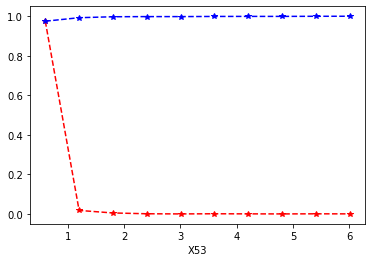

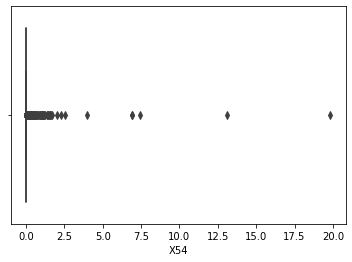


distplot of X54
----------------------------------------------------------------------------


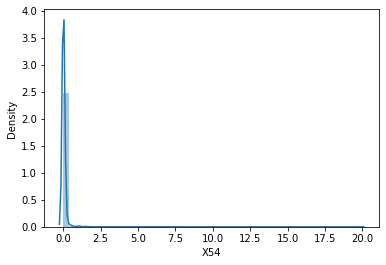


Histogram of X54
----------------------------------------------------------------------------


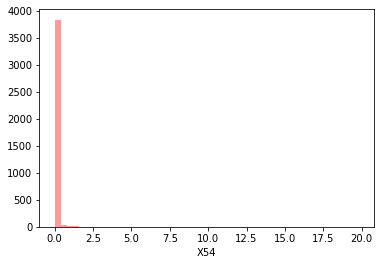


Histogram with mean, median and mode of X54
----------------------------------------------------------------------------
Mean:  0.043828132992327365 
Median:  0.0 
Mode:  0.0


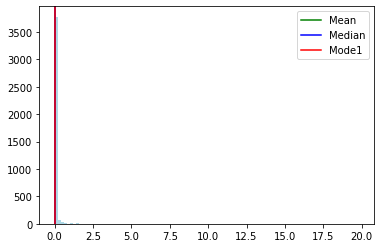


PDF and CDF plot of : X54
----------------------------------------------------------------------------
[9.97698210e-01 7.67263427e-04 2.55754476e-04 7.67263427e-04
 0.00000000e+00 0.00000000e+00 2.55754476e-04 0.00000000e+00
 0.00000000e+00 2.55754476e-04]
[ 0.      1.9829  3.9658  5.9487  7.9316  9.9145 11.8974 13.8803 15.8632
 17.8461 19.829 ]
[0.99769821 0.99846547 0.99872123 0.99948849 0.99948849 0.99948849
 0.99974425 0.99974425 0.99974425 1.        ]

Skewness of X54
----------------------------------------------------------------------------
30.813019059019368

Description of X55
----------------------------------------------------------------------------
count    3910.000000
mean        5.047150
std        31.397035
min         1.000000
25%         1.580750
50%         2.263500
75%         3.714000
max      1102.500000
Name: X55, dtype: float64 
Central values of X55
----------------------------------------------------------------------------

Minimum :  1.0 
Maximum :  1102.5

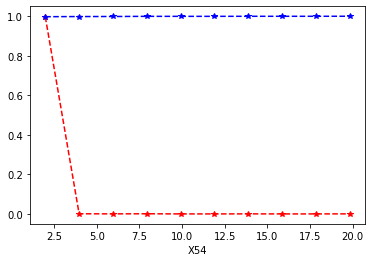

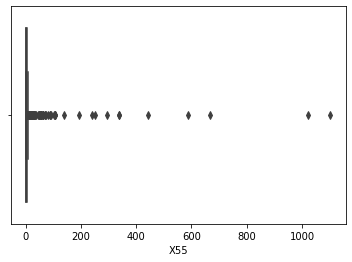


distplot of X55
----------------------------------------------------------------------------


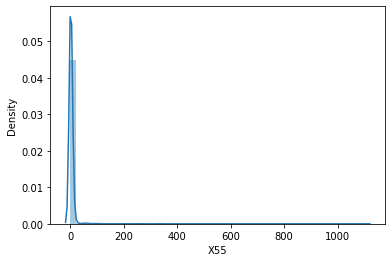


Histogram of X55
----------------------------------------------------------------------------


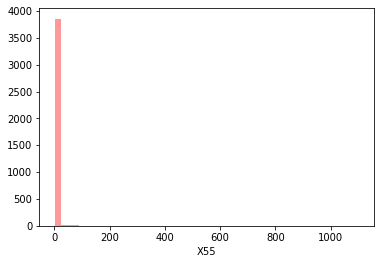


Histogram with mean, median and mode of X55
----------------------------------------------------------------------------
Mean:  5.047150127877238 
Median:  2.2634999999999996 
Mode:  1.0


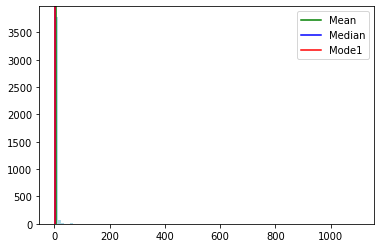


PDF and CDF plot of : X55
----------------------------------------------------------------------------
[9.96930946e-01 5.11508951e-04 7.67263427e-04 5.11508951e-04
 2.55754476e-04 2.55754476e-04 2.55754476e-04 0.00000000e+00
 0.00000000e+00 5.11508951e-04]
[1.0000e+00 1.1115e+02 2.2130e+02 3.3145e+02 4.4160e+02 5.5175e+02
 6.6190e+02 7.7205e+02 8.8220e+02 9.9235e+02 1.1025e+03]
[0.99693095 0.99744246 0.99820972 0.99872123 0.99897698 0.99923274
 0.99948849 0.99948849 0.99948849 1.        ]

Skewness of X55
----------------------------------------------------------------------------
25.550424875730826

Description of X56
----------------------------------------------------------------------------
count    3910.000000
mean       52.338107
std       204.445218
min         1.000000
25%         6.000000
50%        15.000000
75%        43.000000
max      9989.000000
Name: X56, dtype: float64 
Central values of X56
----------------------------------------------------------------------------



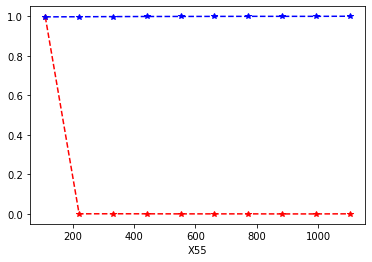

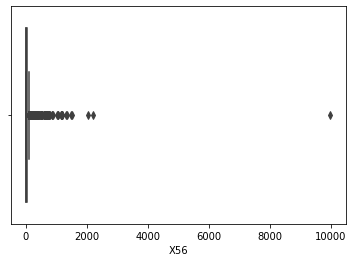


distplot of X56
----------------------------------------------------------------------------


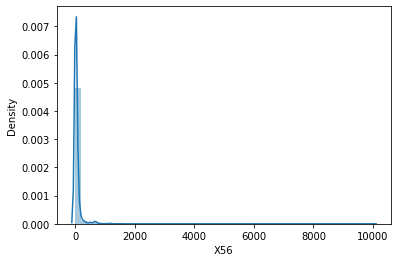


Histogram of X56
----------------------------------------------------------------------------


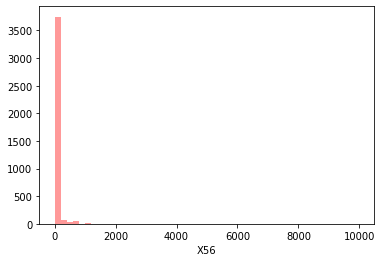


Histogram with mean, median and mode of X56
----------------------------------------------------------------------------
Mean:  52.338107416879794 
Median:  15.0 
Mode:  1


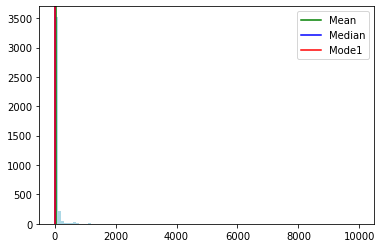


PDF and CDF plot of : X56
----------------------------------------------------------------------------
[9.95652174e-01 3.58056266e-03 5.11508951e-04 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.55754476e-04]
[1.0000e+00 9.9980e+02 1.9986e+03 2.9974e+03 3.9962e+03 4.9950e+03
 5.9938e+03 6.9926e+03 7.9914e+03 8.9902e+03 9.9890e+03]
[0.99565217 0.99923274 0.99974425 0.99974425 0.99974425 0.99974425
 0.99974425 0.99974425 0.99974425 1.        ]

Skewness of X56
----------------------------------------------------------------------------
31.103729524090365

Description of X57
----------------------------------------------------------------------------
count     3910.000000
mean       283.059079
std        578.339858
min          1.000000
25%         35.000000
50%         94.000000
75%        264.000000
max      10062.000000
Name: X57, dtype: float64 
Central values of X57
----------------------------------------------------------------------

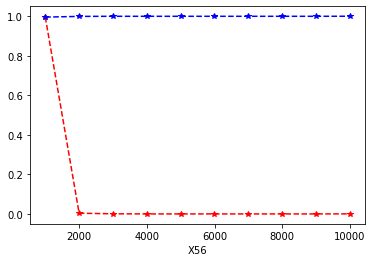

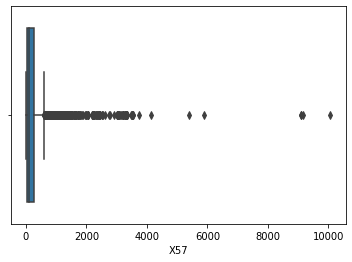


distplot of X57
----------------------------------------------------------------------------


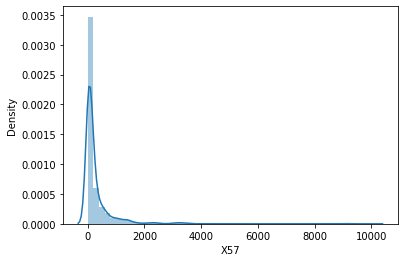


Histogram of X57
----------------------------------------------------------------------------


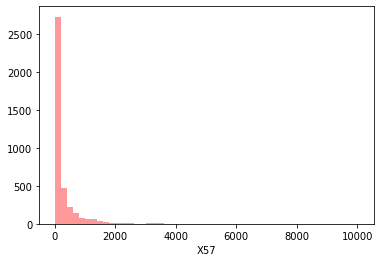


Histogram with mean, median and mode of X57
----------------------------------------------------------------------------
Mean:  283.05907928388746 
Median:  94.0 
Mode:  5


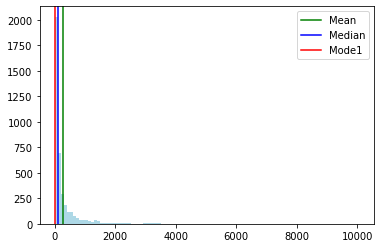


PDF and CDF plot of : X57
----------------------------------------------------------------------------
[9.31969309e-01 4.70588235e-02 1.02301790e-02 8.95140665e-03
 2.55754476e-04 5.11508951e-04 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.02301790e-03]
[1.0000e+00 1.0071e+03 2.0132e+03 3.0193e+03 4.0254e+03 5.0315e+03
 6.0376e+03 7.0437e+03 8.0498e+03 9.0559e+03 1.0062e+04]
[0.93196931 0.97902813 0.98925831 0.99820972 0.99846547 0.99897698
 0.99897698 0.99897698 0.99897698 1.        ]

Skewness of X57
----------------------------------------------------------------------------
6.539477482055336

Description of Y
----------------------------------------------------------------------------
count    3910.000000
mean        0.392327
std         0.488331
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Y, dtype: float64 
Central values of Y
----------------------------------------------------------------------------

Minimum

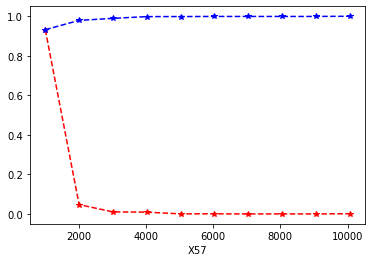

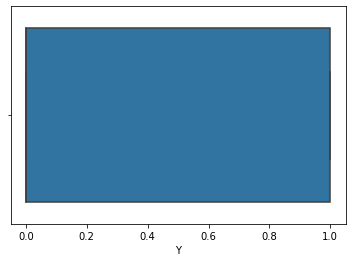


distplot of Y
----------------------------------------------------------------------------


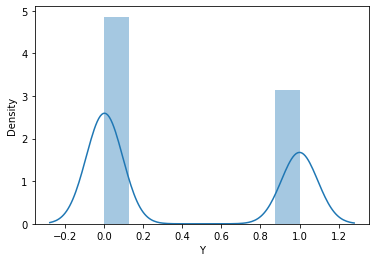


Histogram of Y
----------------------------------------------------------------------------


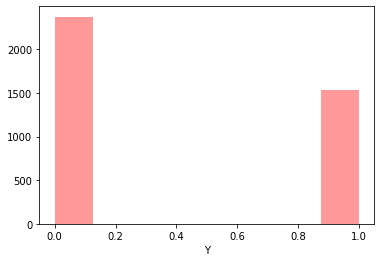


Histogram with mean, median and mode of Y
----------------------------------------------------------------------------
Mean:  0.39232736572890026 
Median:  0.0 
Mode:  0


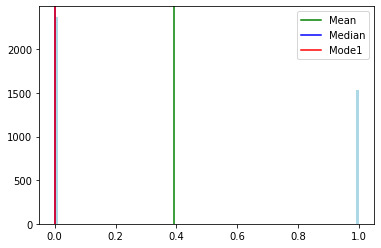


PDF and CDF plot of : Y
----------------------------------------------------------------------------
[0.60767263 0.         0.         0.         0.         0.
 0.         0.         0.         0.39232737]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
[0.60767263 0.60767263 0.60767263 0.60767263 0.60767263 0.60767263
 0.60767263 0.60767263 0.60767263 1.        ]

Skewness of Y
----------------------------------------------------------------------------
0.4412074655482515


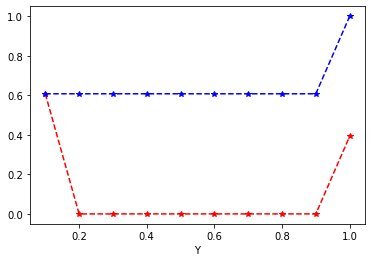

In [14]:
for x in df.columns:
    Analysis_numeric1(x)    

In [81]:
categorical_val = []
continous_val = []
for column in df.columns:
#     print('==============================')
#     print(f"{column} : {df[column].unique()}")
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)
print(categorical_val)
print()
print(continous_val)

['Y']

['Unnamed: 0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57']


### bivarate_analysis

In [83]:
def bivarate_analysis(column):
    sns.swarmplot(df[column],df['Y'])

In [86]:
def bivariate_numeric1(column):
    print("\nDescription of :" + column)
    print("----------------------------------------------------------------------------")
    #countplot
    plt.figure()
    print("\countplot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.countplot(x=df['Y'],hue = df[column])
    plt.show()
    
    #Boxplot
    plt.figure()
    print("\nBoxplot of " + column)
    print("----------------------------------------------------------------------------")
    sns.boxplot(df['Y'],df[column])
    plt.show()
    
    #Barplot
    plt.figure()
    print("\barplot of " + column)
    print("----------------------------------------------------------------------------")
    sns.barplot(df['Y'], df[column])
    plt.show()

    #swamplot
    plt.figure()
    print("\swamplot of " + column)
    print("----------------------------------------------------------------------------")
    sns.swarmplot(df['Y'], df[column])
    plt.show()
                     
    #vioinplot
    plt.figure()
    print("\vioinplot of " + column)
    print("----------------------------------------------------------------------------")
    sns.violinplot(df['Y'], df[column])
    plt.show()
                     
    #distplot
    plt.figure()
    print("\distplot of " + column)
    print("----------------------------------------------------------------------------")
    sns.scatterplot(df['Y'], df[column])
    plt.show()

    print("----------------------------------------------------------------------------")



Description of :Unnamed: 0
----------------------------------------------------------------------------
\countplot of Unnamed: 0
----------------------------------------------------------------------------


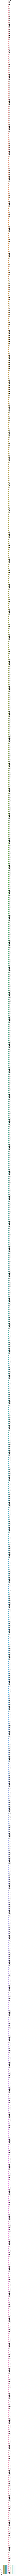


Boxplot of Unnamed: 0
----------------------------------------------------------------------------


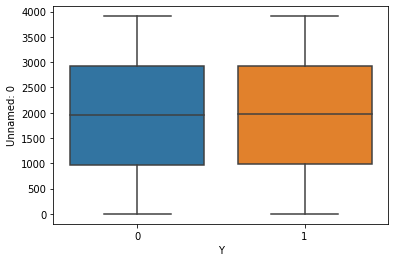

arplot of Unnamed: 0
----------------------------------------------------------------------------


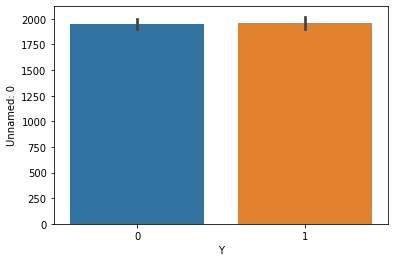

\swamplot of Unnamed: 0
----------------------------------------------------------------------------


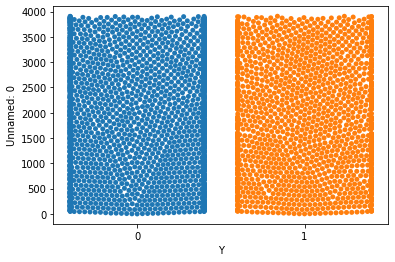

ioinplot of Unnamed: 0
----------------------------------------------------------------------------


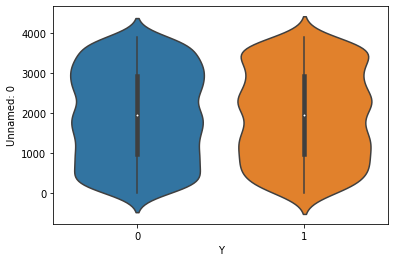

\distplot of Unnamed: 0
----------------------------------------------------------------------------


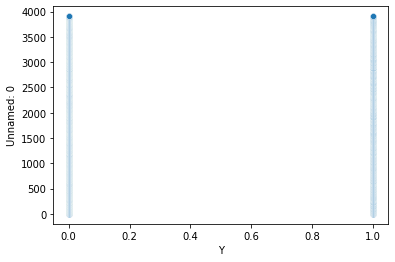

----------------------------------------------------------------------------

Description of :X1
----------------------------------------------------------------------------
\countplot of X1
----------------------------------------------------------------------------


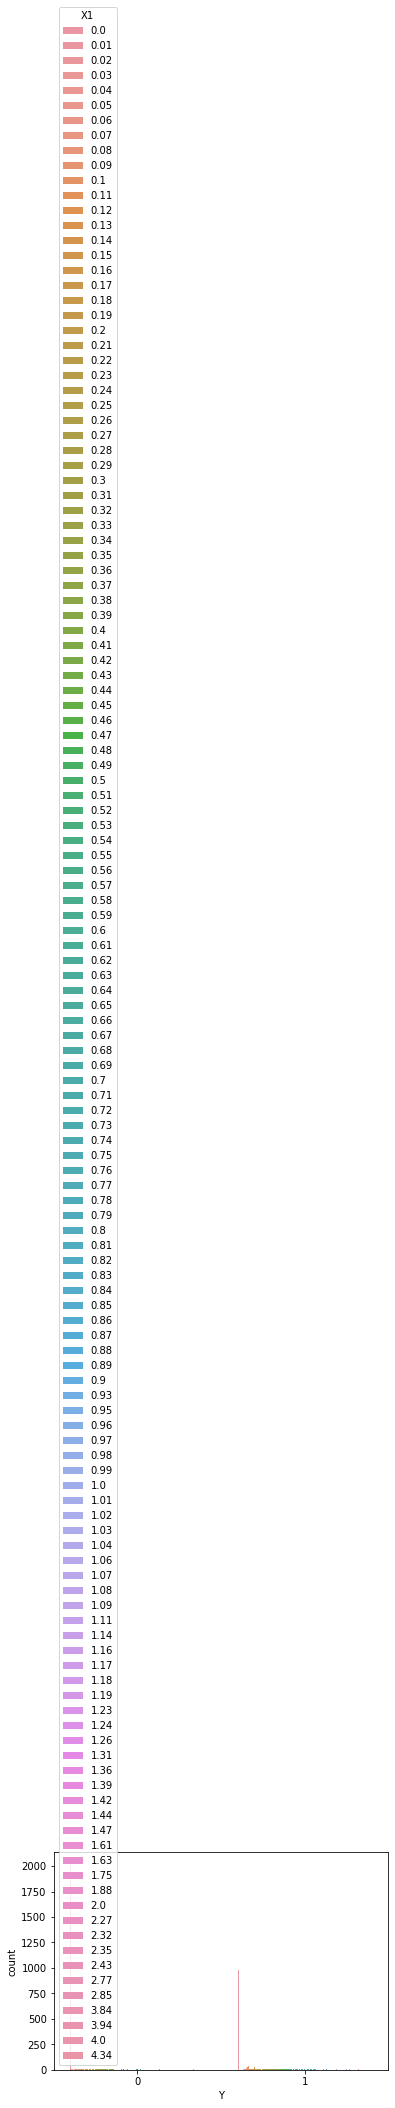


Boxplot of X1
----------------------------------------------------------------------------


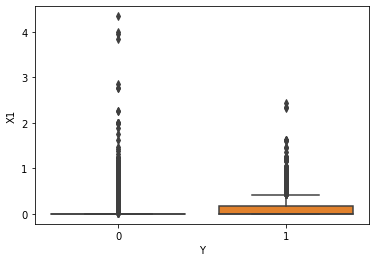

arplot of X1
----------------------------------------------------------------------------


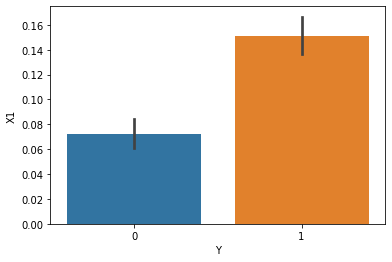

\swamplot of X1
----------------------------------------------------------------------------


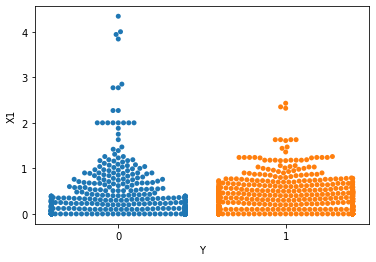

ioinplot of X1
----------------------------------------------------------------------------


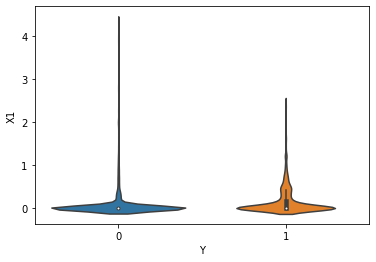

\distplot of X1
----------------------------------------------------------------------------


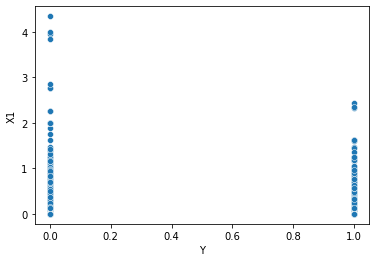

----------------------------------------------------------------------------

Description of :X2
----------------------------------------------------------------------------
\countplot of X2
----------------------------------------------------------------------------


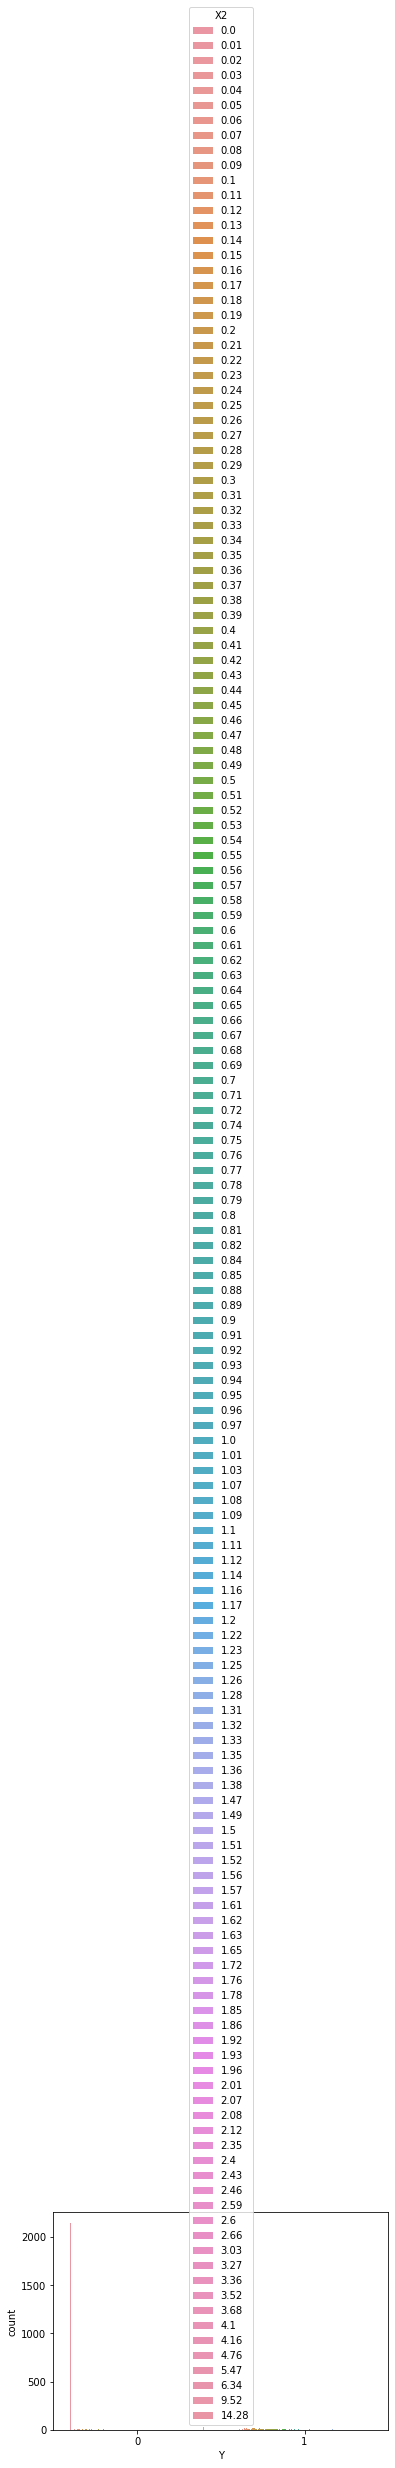


Boxplot of X2
----------------------------------------------------------------------------


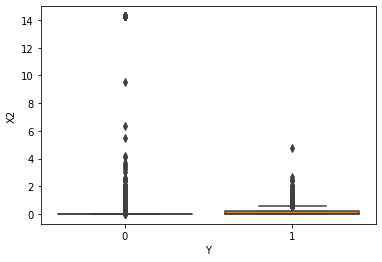

arplot of X2
----------------------------------------------------------------------------


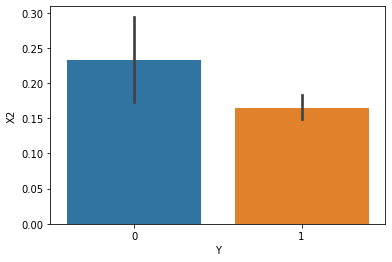

\swamplot of X2
----------------------------------------------------------------------------


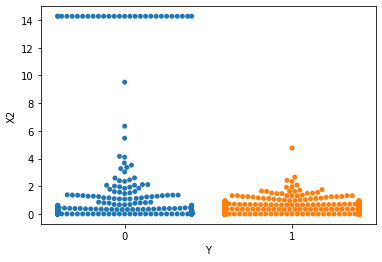

ioinplot of X2
----------------------------------------------------------------------------


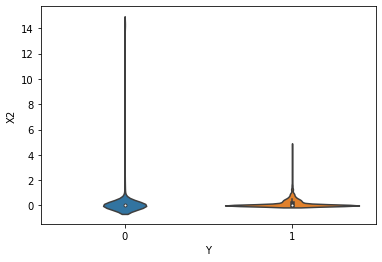

\distplot of X2
----------------------------------------------------------------------------


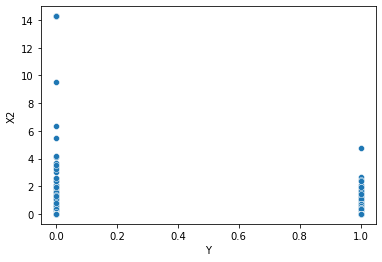

----------------------------------------------------------------------------

Description of :X3
----------------------------------------------------------------------------
\countplot of X3
----------------------------------------------------------------------------


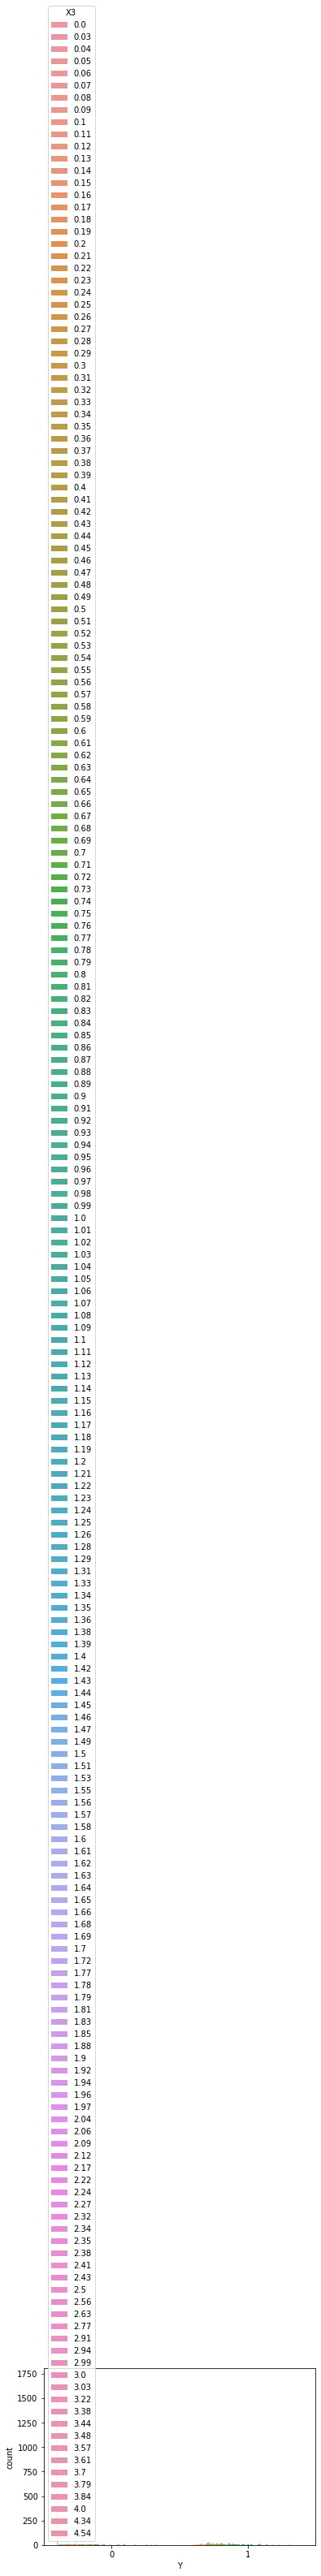


Boxplot of X3
----------------------------------------------------------------------------


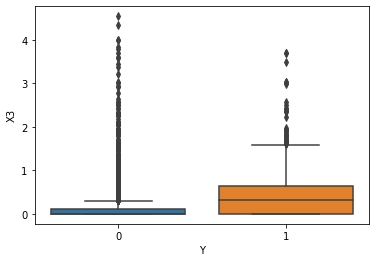

arplot of X3
----------------------------------------------------------------------------


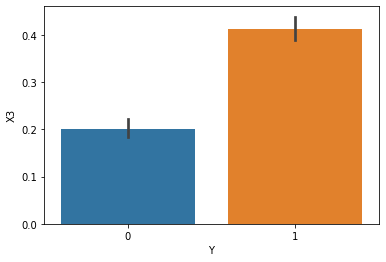

\swamplot of X3
----------------------------------------------------------------------------


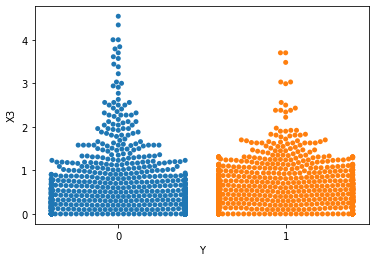

ioinplot of X3
----------------------------------------------------------------------------


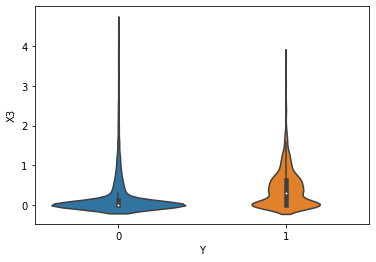

\distplot of X3
----------------------------------------------------------------------------


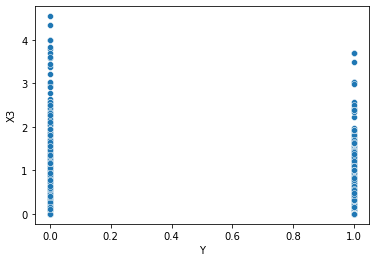

----------------------------------------------------------------------------

Description of :X4
----------------------------------------------------------------------------
\countplot of X4
----------------------------------------------------------------------------


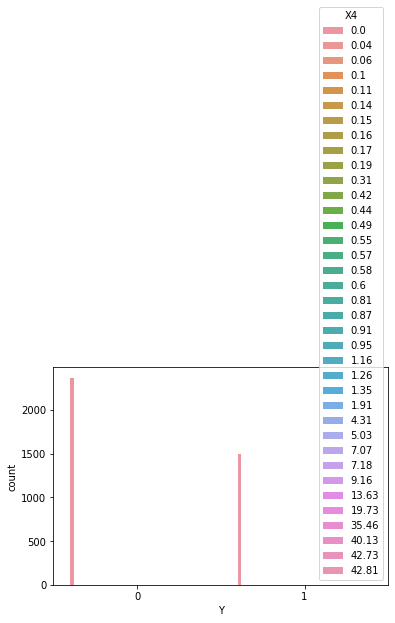


Boxplot of X4
----------------------------------------------------------------------------


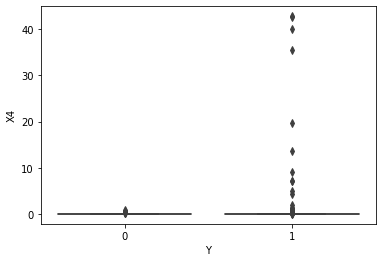

arplot of X4
----------------------------------------------------------------------------


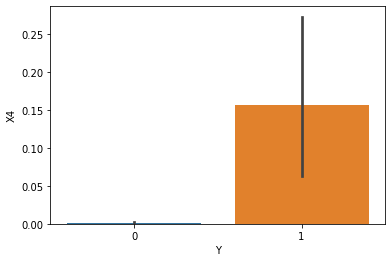

\swamplot of X4
----------------------------------------------------------------------------


KeyboardInterrupt: 

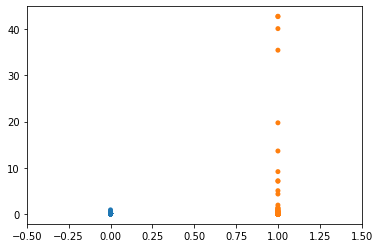

In [87]:
for i in continous_val:
    bivariate_numeric1(i)

In [88]:
def bivariate_others(i,j):
    print("\nDescription of :" + i)
    print("----------------------------------------------------------------------------")                    
    #distplot
    plt.figure()
    print("\distplot of " + j)
    print("----------------------------------------------------------------------------")
    sns.scatterplot(df[i], df[j])
    plt.show()

    print("----------------------------------------------------------------------------")


Description of :Unnamed: 0
----------------------------------------------------------------------------
\distplot of X1
----------------------------------------------------------------------------


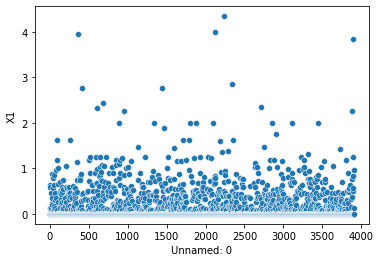

----------------------------------------------------------------------------

Description of :Unnamed: 0
----------------------------------------------------------------------------
\distplot of X2
----------------------------------------------------------------------------


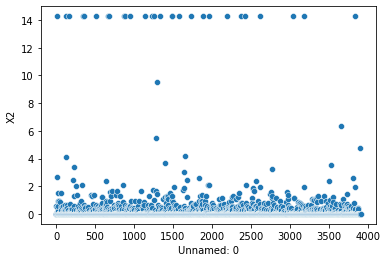

----------------------------------------------------------------------------

Description of :Unnamed: 0
----------------------------------------------------------------------------
\distplot of X3
----------------------------------------------------------------------------


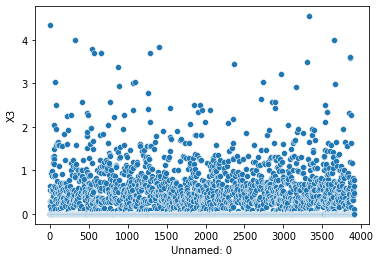

----------------------------------------------------------------------------

Description of :Unnamed: 0
----------------------------------------------------------------------------
\distplot of X4
----------------------------------------------------------------------------


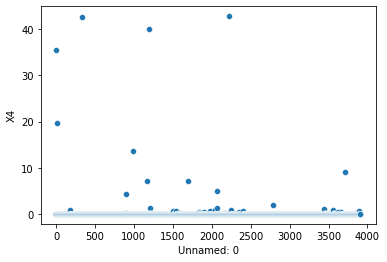

----------------------------------------------------------------------------

Description of :Unnamed: 0
----------------------------------------------------------------------------
\distplot of X5
----------------------------------------------------------------------------


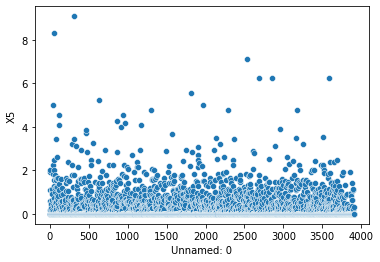

----------------------------------------------------------------------------

Description of :Unnamed: 0
----------------------------------------------------------------------------
\distplot of X6
----------------------------------------------------------------------------


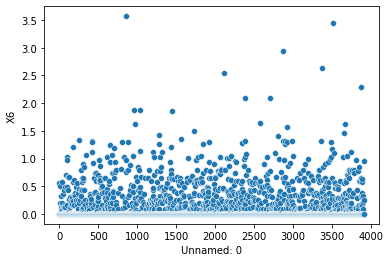

----------------------------------------------------------------------------

Description of :Unnamed: 0
----------------------------------------------------------------------------
\distplot of X7
----------------------------------------------------------------------------


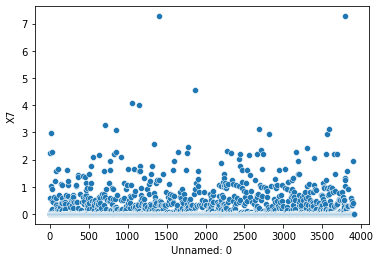

----------------------------------------------------------------------------

Description of :Unnamed: 0
----------------------------------------------------------------------------
\distplot of X8
----------------------------------------------------------------------------


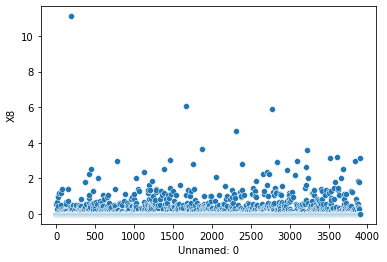

----------------------------------------------------------------------------

Description of :Unnamed: 0
----------------------------------------------------------------------------
\distplot of X9
----------------------------------------------------------------------------


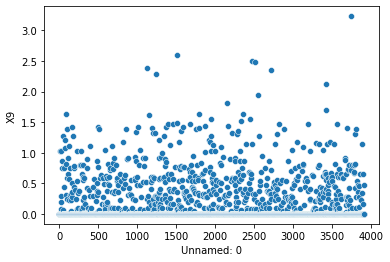

----------------------------------------------------------------------------

Description of :Unnamed: 0
----------------------------------------------------------------------------
\distplot of X10
----------------------------------------------------------------------------


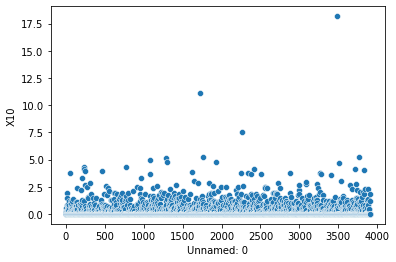

----------------------------------------------------------------------------

Description of :Unnamed: 0
----------------------------------------------------------------------------
\distplot of X11
----------------------------------------------------------------------------


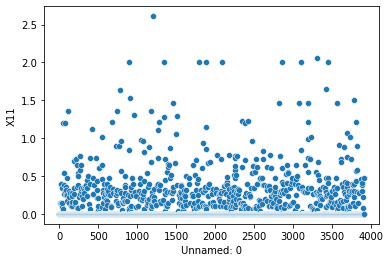

----------------------------------------------------------------------------

Description of :Unnamed: 0
----------------------------------------------------------------------------
\distplot of X12
----------------------------------------------------------------------------


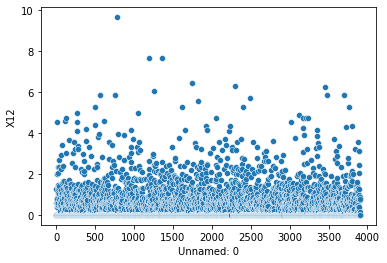

----------------------------------------------------------------------------

Description of :Unnamed: 0
----------------------------------------------------------------------------
\distplot of X13
----------------------------------------------------------------------------


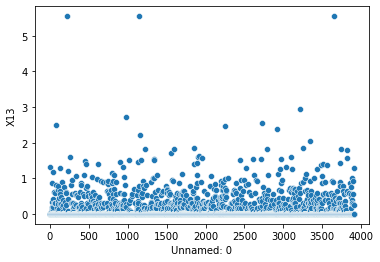

----------------------------------------------------------------------------

Description of :Unnamed: 0
----------------------------------------------------------------------------
\distplot of X14
----------------------------------------------------------------------------


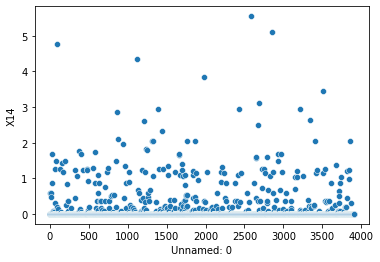

----------------------------------------------------------------------------

Description of :Unnamed: 0
----------------------------------------------------------------------------
\distplot of X15
----------------------------------------------------------------------------


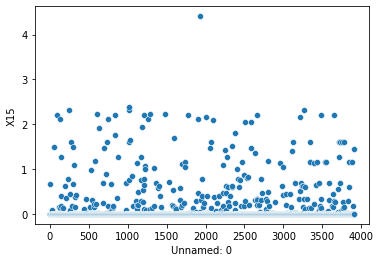

----------------------------------------------------------------------------

Description of :Unnamed: 0
----------------------------------------------------------------------------
\distplot of X16
----------------------------------------------------------------------------


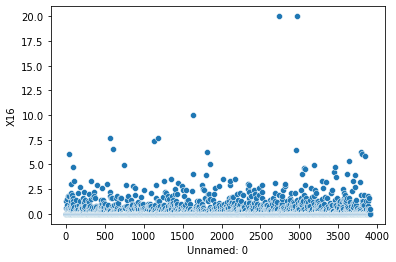

----------------------------------------------------------------------------

Description of :Unnamed: 0
----------------------------------------------------------------------------
\distplot of X17
----------------------------------------------------------------------------


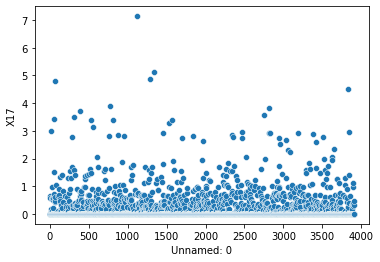

----------------------------------------------------------------------------

Description of :Unnamed: 0
----------------------------------------------------------------------------
\distplot of X18
----------------------------------------------------------------------------


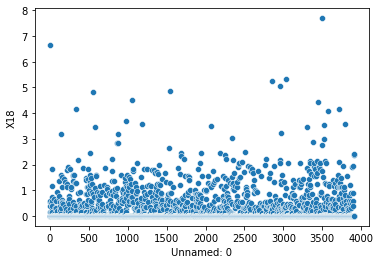

----------------------------------------------------------------------------

Description of :Unnamed: 0
----------------------------------------------------------------------------
\distplot of X19
----------------------------------------------------------------------------


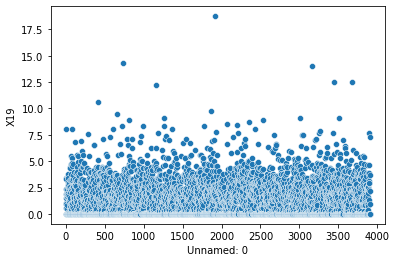

----------------------------------------------------------------------------

Description of :Unnamed: 0
----------------------------------------------------------------------------
\distplot of X20
----------------------------------------------------------------------------


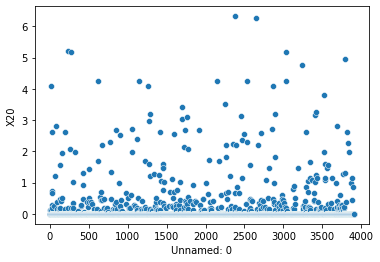

----------------------------------------------------------------------------

Description of :Unnamed: 0
----------------------------------------------------------------------------
\distplot of X21
----------------------------------------------------------------------------


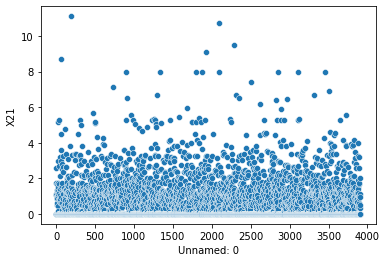

----------------------------------------------------------------------------

Description of :Unnamed: 0
----------------------------------------------------------------------------
\distplot of X22
----------------------------------------------------------------------------


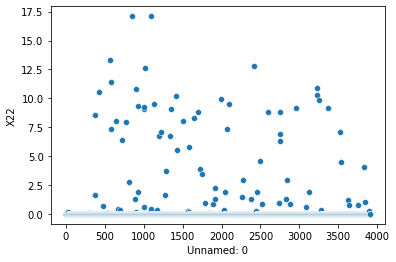

----------------------------------------------------------------------------

Description of :Unnamed: 0
----------------------------------------------------------------------------
\distplot of X23
----------------------------------------------------------------------------


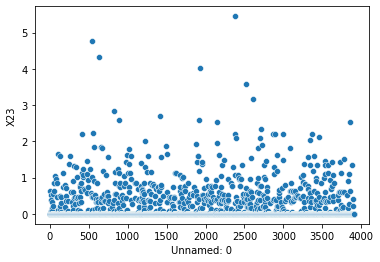

----------------------------------------------------------------------------

Description of :Unnamed: 0
----------------------------------------------------------------------------
\distplot of X24
----------------------------------------------------------------------------


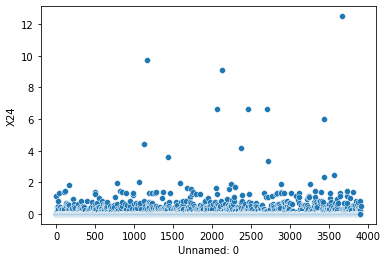

----------------------------------------------------------------------------

Description of :Unnamed: 0
----------------------------------------------------------------------------
\distplot of X25
----------------------------------------------------------------------------


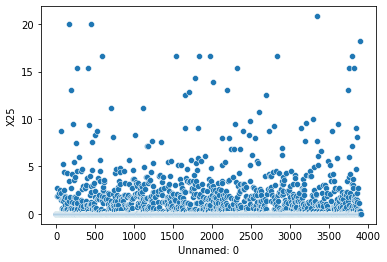

----------------------------------------------------------------------------

Description of :Unnamed: 0
----------------------------------------------------------------------------
\distplot of X26
----------------------------------------------------------------------------


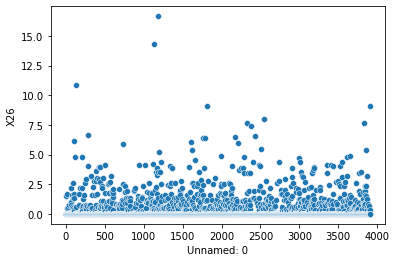

----------------------------------------------------------------------------

Description of :Unnamed: 0
----------------------------------------------------------------------------
\distplot of X27
----------------------------------------------------------------------------


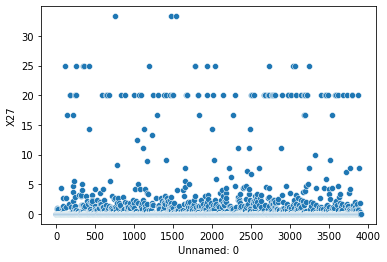

----------------------------------------------------------------------------

Description of :Unnamed: 0
----------------------------------------------------------------------------
\distplot of X28
----------------------------------------------------------------------------


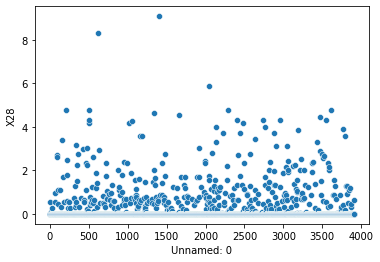

----------------------------------------------------------------------------

Description of :Unnamed: 0
----------------------------------------------------------------------------
\distplot of X29
----------------------------------------------------------------------------


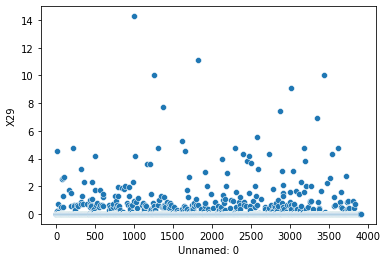

----------------------------------------------------------------------------

Description of :Unnamed: 0
----------------------------------------------------------------------------
\distplot of X30
----------------------------------------------------------------------------


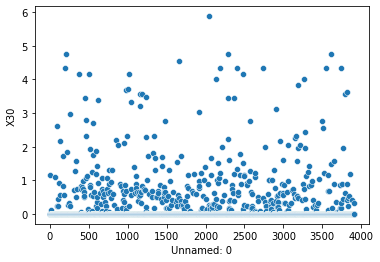

----------------------------------------------------------------------------

Description of :Unnamed: 0
----------------------------------------------------------------------------
\distplot of X31
----------------------------------------------------------------------------


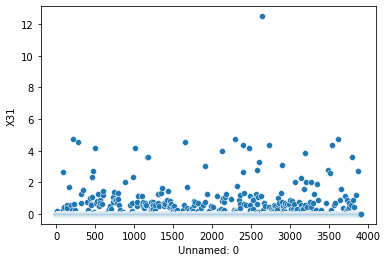

----------------------------------------------------------------------------

Description of :Unnamed: 0
----------------------------------------------------------------------------
\distplot of X32
----------------------------------------------------------------------------


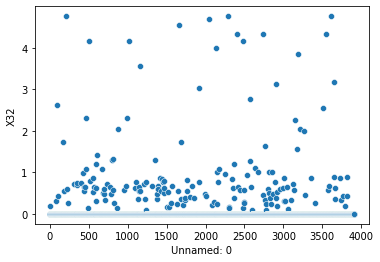

----------------------------------------------------------------------------

Description of :Unnamed: 0
----------------------------------------------------------------------------
\distplot of X33
----------------------------------------------------------------------------


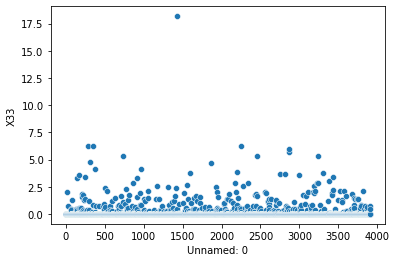

----------------------------------------------------------------------------

Description of :Unnamed: 0
----------------------------------------------------------------------------
\distplot of X34
----------------------------------------------------------------------------


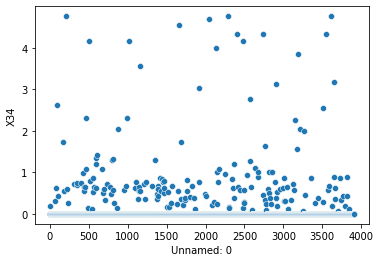

----------------------------------------------------------------------------

Description of :Unnamed: 0
----------------------------------------------------------------------------
\distplot of X35
----------------------------------------------------------------------------


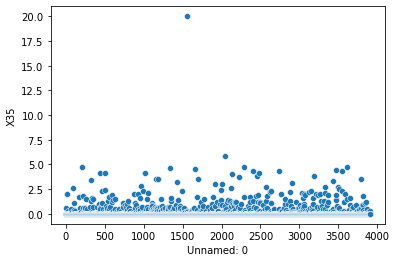

----------------------------------------------------------------------------

Description of :Unnamed: 0
----------------------------------------------------------------------------
\distplot of X36
----------------------------------------------------------------------------


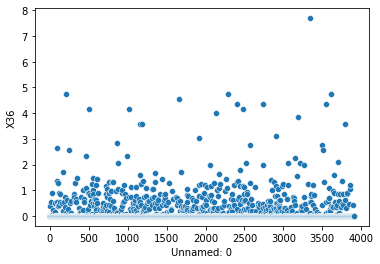

----------------------------------------------------------------------------

Description of :Unnamed: 0
----------------------------------------------------------------------------
\distplot of X37
----------------------------------------------------------------------------


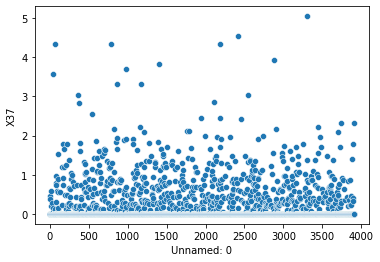

----------------------------------------------------------------------------

Description of :Unnamed: 0
----------------------------------------------------------------------------
\distplot of X38
----------------------------------------------------------------------------


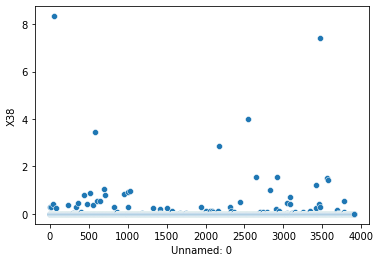

----------------------------------------------------------------------------

Description of :Unnamed: 0
----------------------------------------------------------------------------
\distplot of X39
----------------------------------------------------------------------------


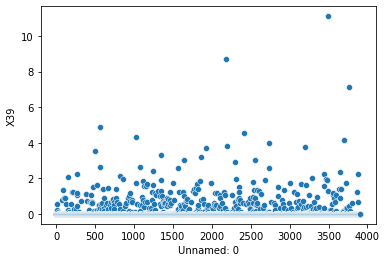

----------------------------------------------------------------------------

Description of :Unnamed: 0
----------------------------------------------------------------------------
\distplot of X40
----------------------------------------------------------------------------


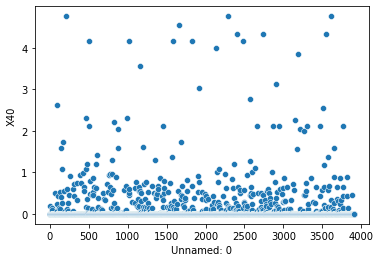

----------------------------------------------------------------------------

Description of :Unnamed: 0
----------------------------------------------------------------------------
\distplot of X41
----------------------------------------------------------------------------


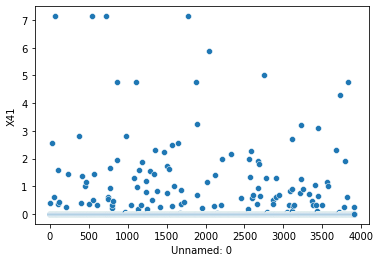

----------------------------------------------------------------------------

Description of :Unnamed: 0
----------------------------------------------------------------------------
\distplot of X42
----------------------------------------------------------------------------


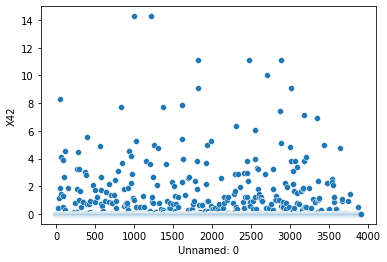

----------------------------------------------------------------------------

Description of :Unnamed: 0
----------------------------------------------------------------------------
\distplot of X43
----------------------------------------------------------------------------


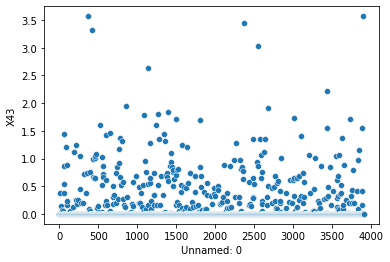

----------------------------------------------------------------------------

Description of :Unnamed: 0
----------------------------------------------------------------------------
\distplot of X44
----------------------------------------------------------------------------


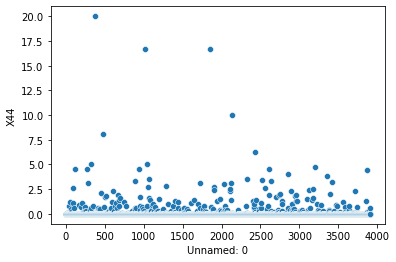

----------------------------------------------------------------------------

Description of :Unnamed: 0
----------------------------------------------------------------------------
\distplot of X45
----------------------------------------------------------------------------


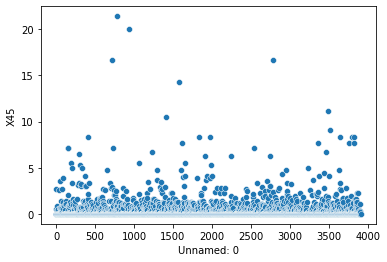

----------------------------------------------------------------------------

Description of :Unnamed: 0
----------------------------------------------------------------------------
\distplot of X46
----------------------------------------------------------------------------


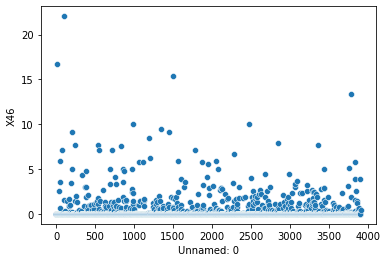

----------------------------------------------------------------------------

Description of :Unnamed: 0
----------------------------------------------------------------------------
\distplot of X47
----------------------------------------------------------------------------


KeyboardInterrupt: 

In [89]:
for i in continous_val:
    for j in continous_val:
        if i!= j:
            bivariate_others(i,j)
    print('**********************************************************')

## Missing Value

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3910 entries, 0 to 3909
Data columns (total 59 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  3910 non-null   int64  
 1   X1          3910 non-null   float64
 2   X2          3910 non-null   float64
 3   X3          3910 non-null   float64
 4   X4          3910 non-null   float64
 5   X5          3910 non-null   float64
 6   X6          3910 non-null   float64
 7   X7          3910 non-null   float64
 8   X8          3910 non-null   float64
 9   X9          3910 non-null   float64
 10  X10         3910 non-null   float64
 11  X11         3910 non-null   float64
 12  X12         3910 non-null   float64
 13  X13         3910 non-null   float64
 14  X14         3910 non-null   float64
 15  X15         3910 non-null   float64
 16  X16         3910 non-null   float64
 17  X17         3910 non-null   float64
 18  X18         3910 non-null   float64
 19  X19         3910 non-null  

## outlier removal

In [90]:
df_out = df.drop('Y',axis =1)
def outlier_remove(column):
    q1 = df_out[column].quantile(0.25)
    q3 = df_out[column].quantile(0.75)
    iqr = q3-q1
    upper_tail = q3 + 1.5*iqr
    lower_tail = q1 - 1.5*iqr
    df_out.loc[df_out[column]>upper_tail,column] = df_out.loc[df_out[column]<upper_tail][column].mean()
    df_out.loc[df_out[column]<lower_tail,column] = df_out.loc[df_out[column]>lower_tail][column].mean()
    

In [91]:
for i in df_out.columns:
    outlier_remove(i)

In [92]:
def outlier(x):
    print(x)
    sns.boxplot(df_out[x])
    plt.show()
    print('***************************')

Unnamed: 0


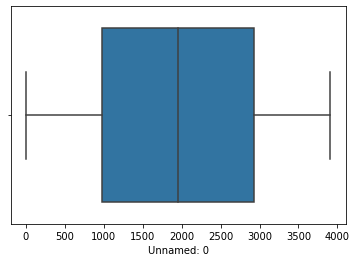

***************************
X1


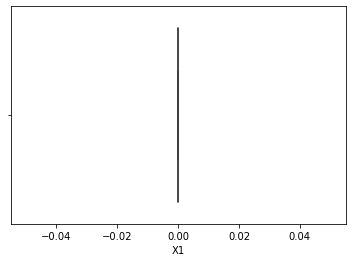

***************************
X2


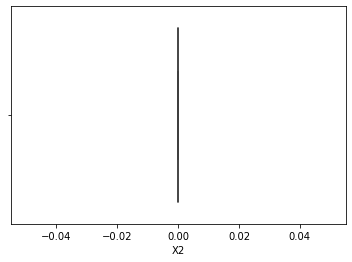

***************************
X3


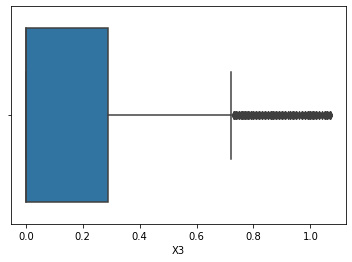

***************************
X4


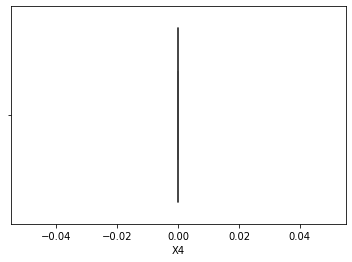

***************************
X5


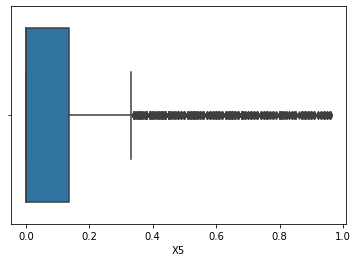

***************************
X6


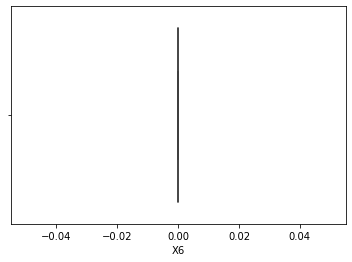

***************************
X7


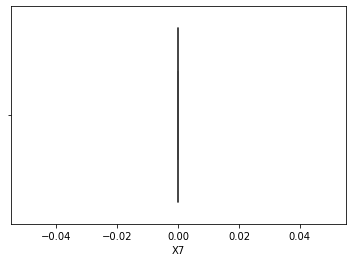

***************************
X8


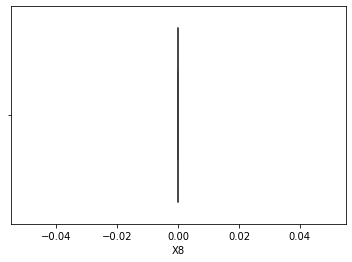

***************************
X9


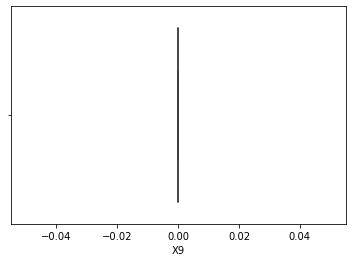

***************************
X10


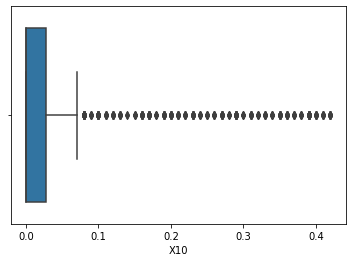

***************************
X11


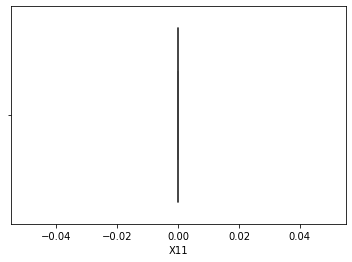

***************************
X12


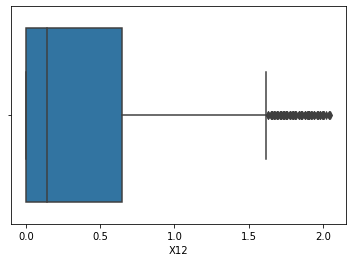

***************************
X13


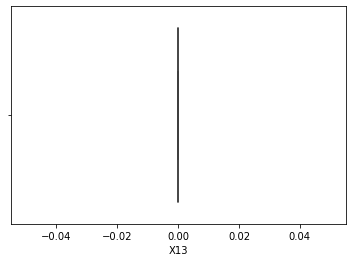

***************************
X14


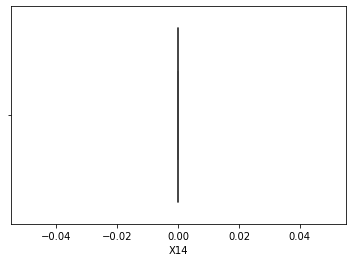

***************************
X15


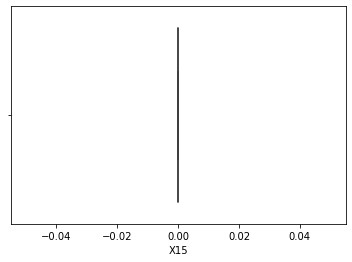

***************************
X16


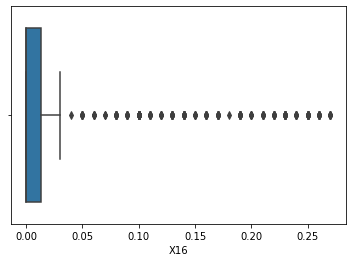

***************************
X17


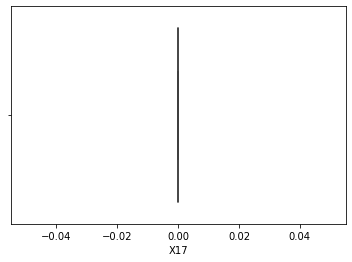

***************************
X18


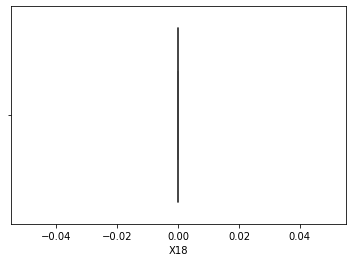

***************************
X19


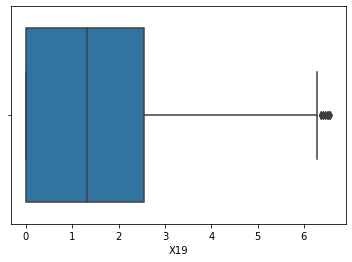

***************************
X20


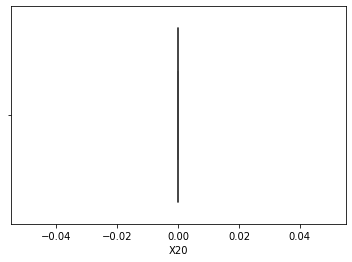

***************************
X21


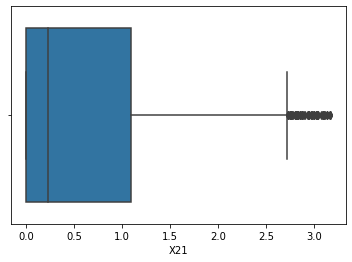

***************************
X22


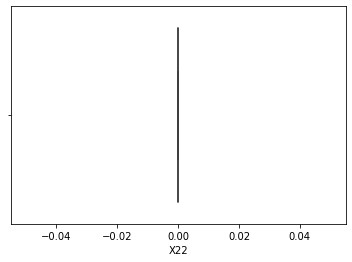

***************************
X23


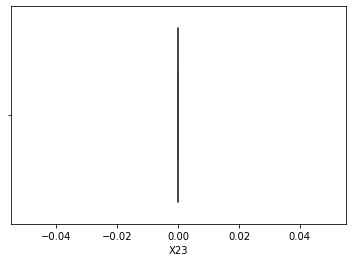

***************************
X24


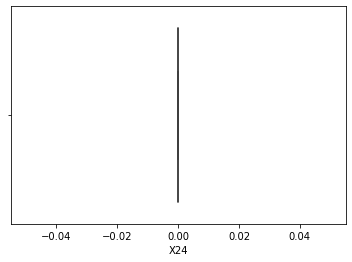

***************************
X25


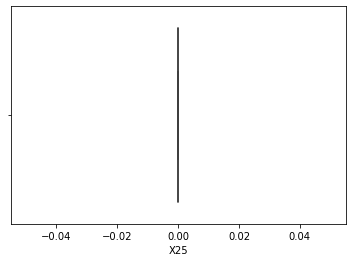

***************************
X26


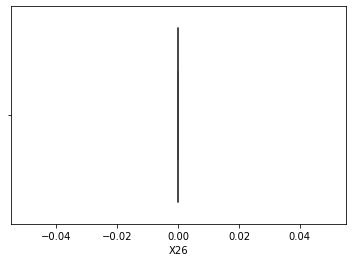

***************************
X27


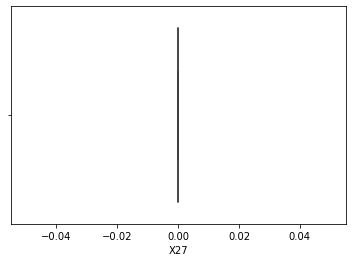

***************************
X28


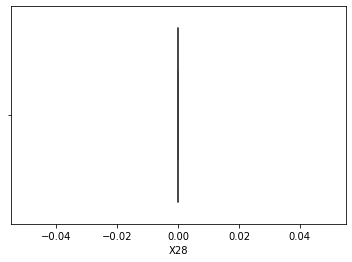

***************************
X29


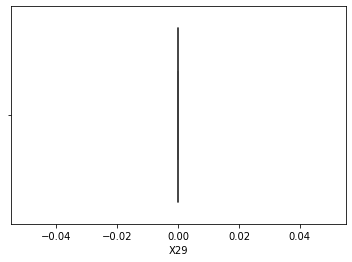

***************************
X30


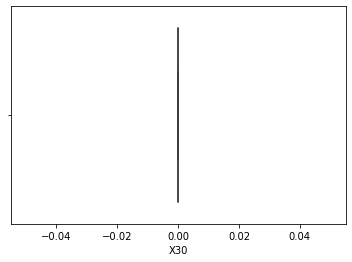

***************************
X31


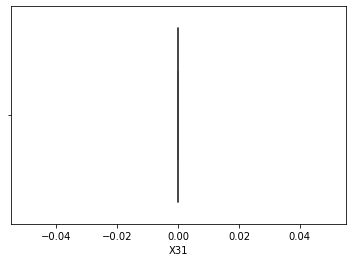

***************************
X32


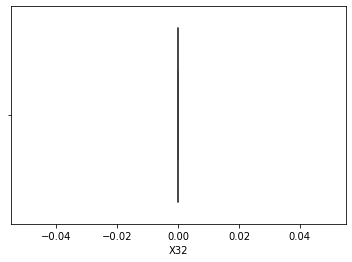

***************************
X33


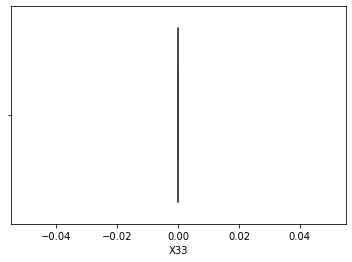

***************************
X34


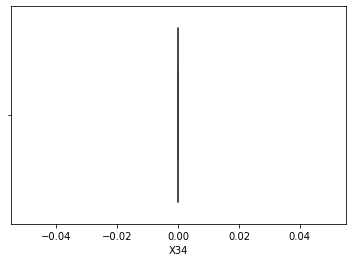

***************************
X35


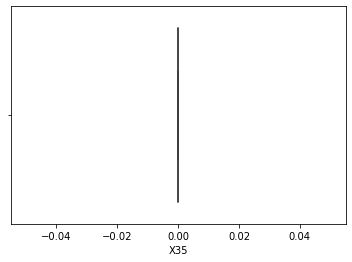

***************************
X36


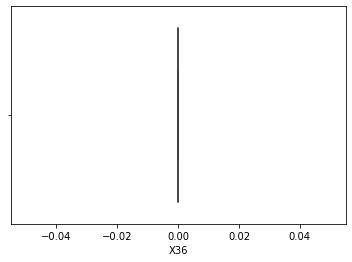

***************************
X37


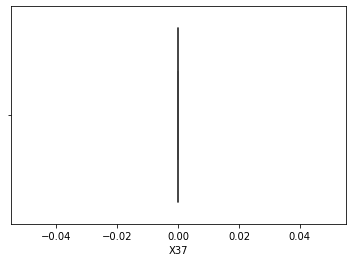

***************************
X38


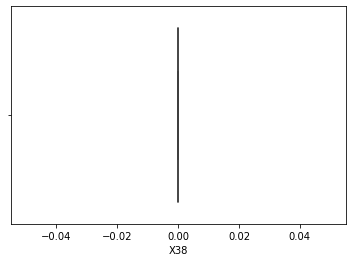

***************************
X39


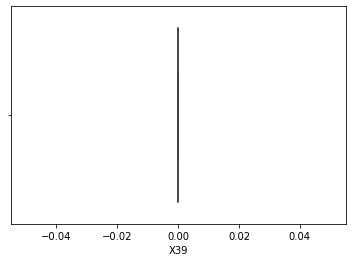

***************************
X40


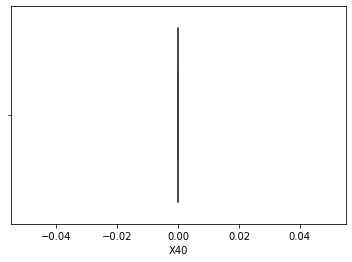

***************************
X41


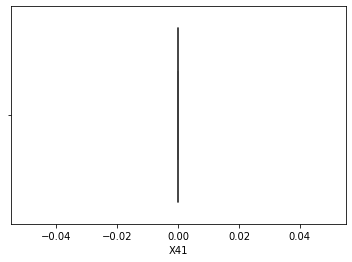

***************************
X42


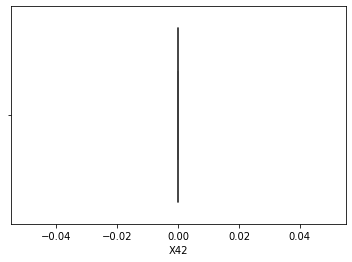

***************************
X43


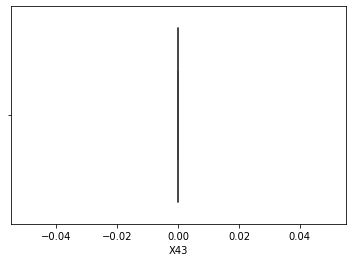

***************************
X44


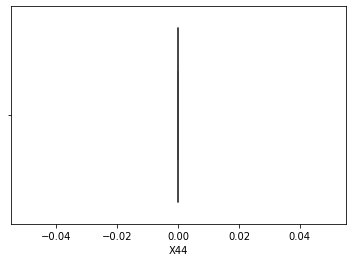

***************************
X45


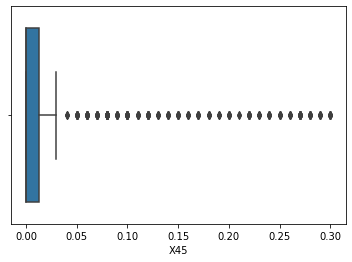

***************************
X46


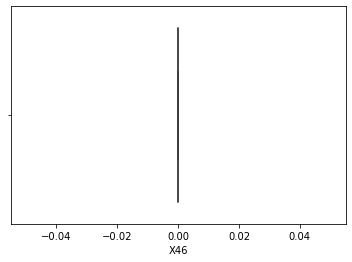

***************************
X47


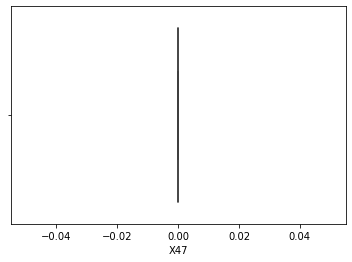

***************************
X48


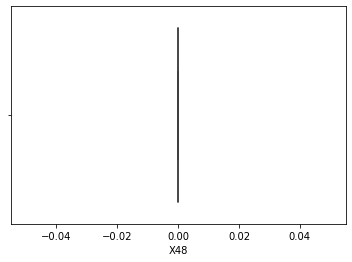

***************************
X49


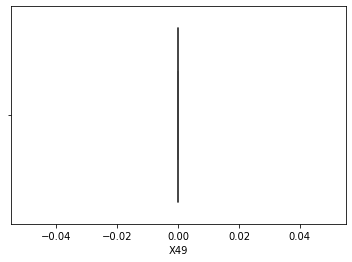

***************************
X50


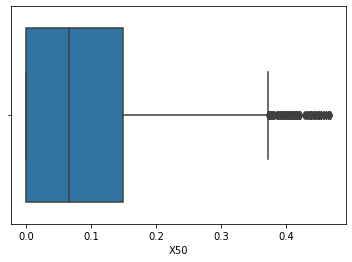

***************************
X51


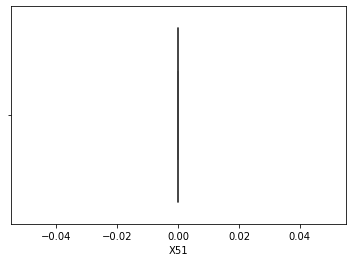

***************************
X52


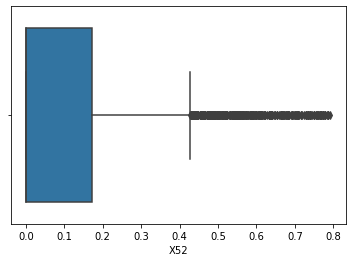

***************************
X53


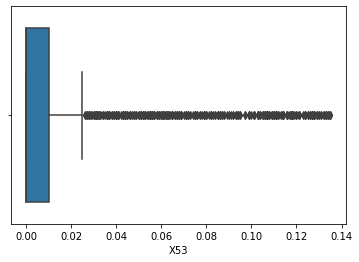

***************************
X54


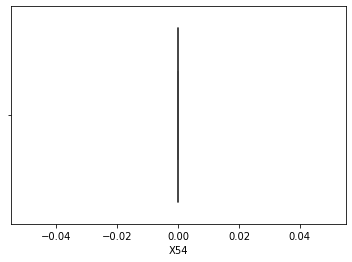

***************************
X55


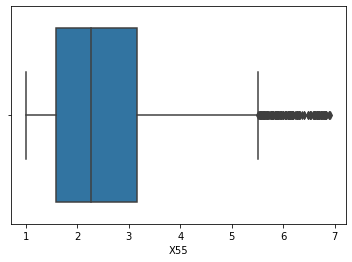

***************************
X56


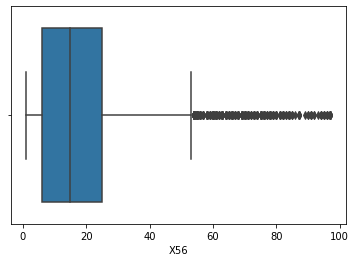

***************************
X57


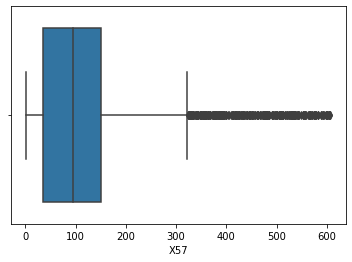

***************************


In [93]:
for i in df_out.columns:
    outlier(i)

In [22]:
df

Unnamed: 0    X1    X2    X3     X4    X5    X6    X7    X8    X9  ...  \
0              0  0.00  0.00  4.34   0.00  0.00  0.00  0.00  0.00  0.00  ...   
1              1  0.00  0.56  0.56   0.00  1.12  0.56  2.25  0.00  0.00  ...   
2              2  0.00  0.00  0.00   0.00  0.00  0.00  0.00  0.00  0.00  ...   
3              3  0.64  0.00  0.64   0.00  1.93  0.00  0.00  0.00  0.00  ...   
4              4  0.58  0.00  0.00  35.46  0.58  0.00  0.58  0.58  0.00  ...   
...          ...   ...   ...   ...    ...   ...   ...   ...   ...   ...  ...   
3905        3905  0.00  0.00  0.00   0.00  0.00  0.00  0.00  0.00  0.00  ...   
3906        3906  0.00  0.00  0.00   0.00  0.00  0.00  0.00  0.00  0.00  ...   
3907        3907  0.12  0.00  0.12   0.00  0.00  0.25  0.00  0.00  0.00  ...   
3908        3908  0.00  0.00  0.00   0.00  0.00  0.00  0.00  3.12  0.00  ...   
3909        3909  0.96  0.00  0.48   0.00  0.00  0.96  0.00  0.00  0.48  ...   

      X49    X50  X51    X52    X53    X54     X55  X56  X57  Y  
0     0.0  0.000  0.0  1.342  0.000  0.000   1.200    2   12  0  
1     0.0  0.083  0.0  0.503  0.000  0.083  16.304  148  375  1  
2     0.0  0.000  0.0  0.000  0.000  0.000   1.000    1    5  0  
3     0.0  0.000  0.0  0.462  0.370  0.000   2.440   22  122  1  
4     0.0  0.000  0.0  0.239  0.239  0.000   3.338  123  207  1  
...   ...    ...  ...    ...    ...    ...     ...  ...  ... ..  
3905  0.0  0.000  0.0  0.000  0.000  0.000   1.714    4   12  0  
3906  0.0  0.000  0.0  0.000  0.000  0.000   2.000    3    4  0  
3907  0.0  0.093  0.0  0.023  0.000  0.000   1.247    5  131  0  
3908  0.0  0.198  0.0  0.198  0.198  0.000   3.857   25   81  1  
3909  0.0  0.818  0.0  0.175  0.467  0.116   9.560  259  717  1  

[3910 rows x 59 columns]

In [23]:
for i in df_out.columns:
    outlier_remove(i)

In [24]:
def outlier(x):
    print(x)
    sns.boxplot(df_out[x])
    plt.show()
    print('***************************')

Unnamed: 0


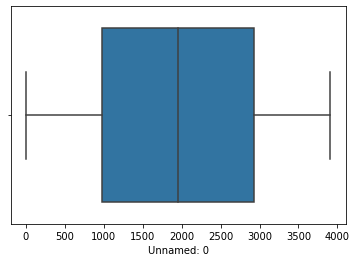

***************************
X1


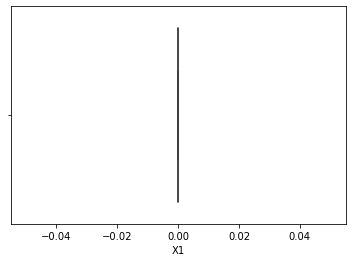

***************************
X2


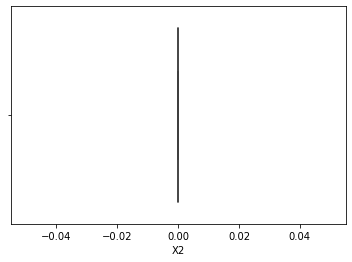

***************************
X3


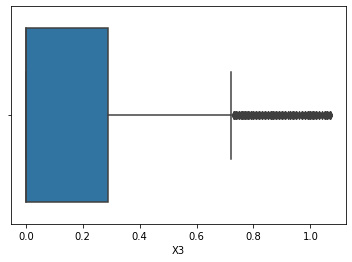

***************************
X4


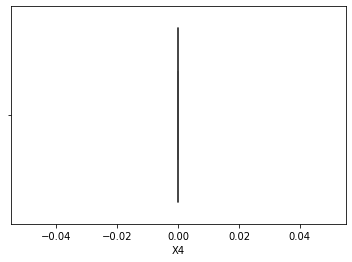

***************************
X5


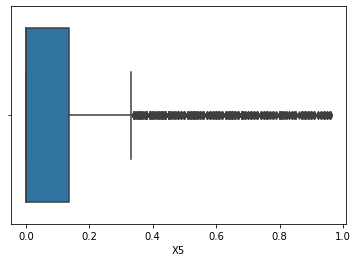

***************************
X6


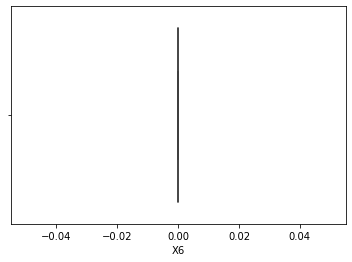

***************************
X7


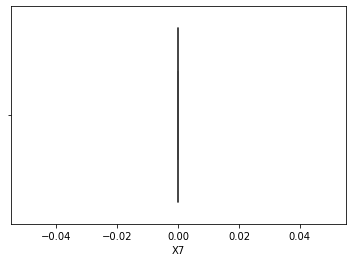

***************************
X8


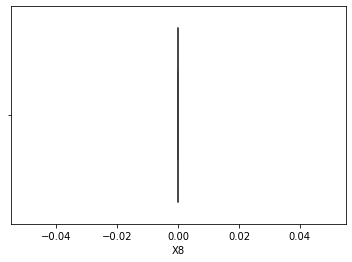

***************************
X9


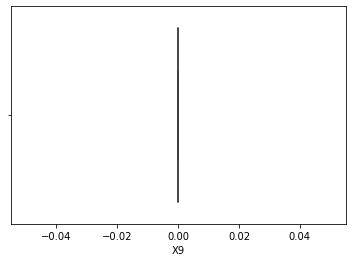

***************************
X10


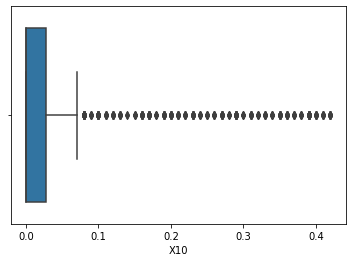

***************************
X11


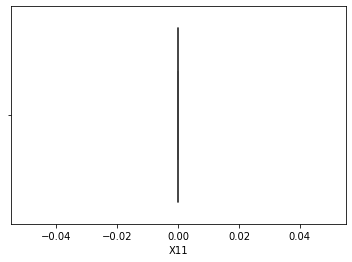

***************************
X12


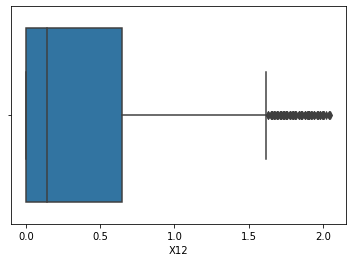

***************************
X13


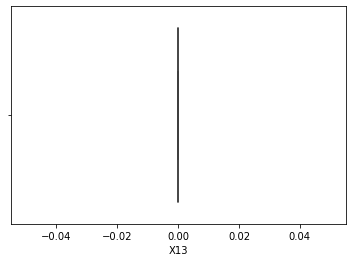

***************************
X14


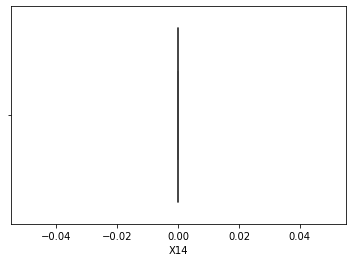

***************************
X15


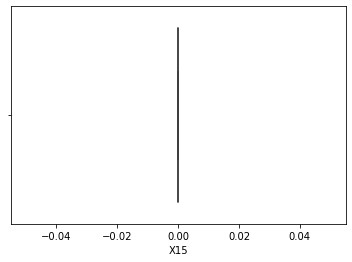

***************************
X16


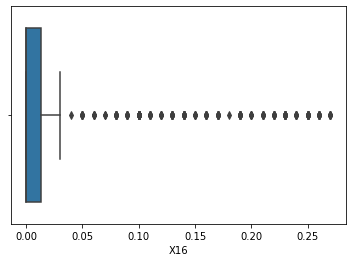

***************************
X17


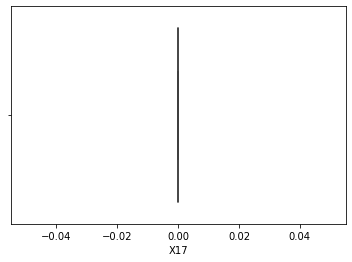

***************************
X18


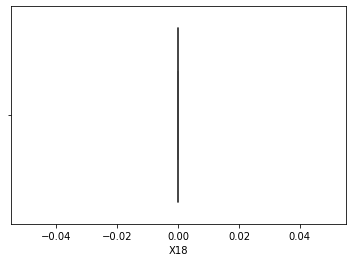

***************************
X19


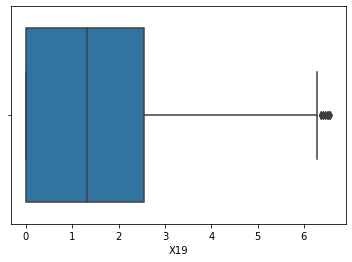

***************************
X20


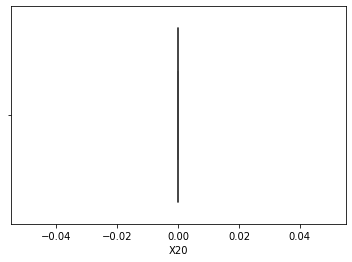

***************************
X21


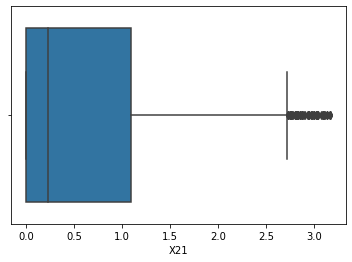

***************************
X22


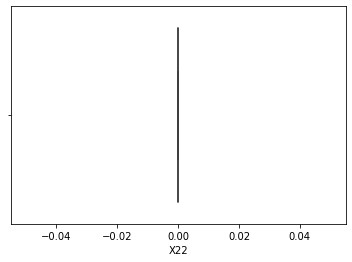

***************************
X23


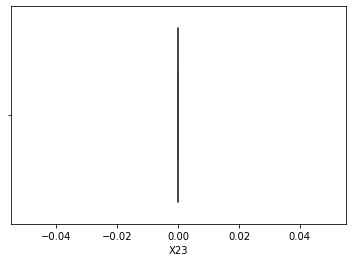

***************************
X24


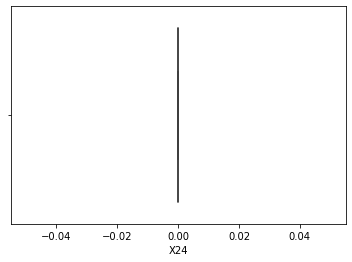

***************************
X25


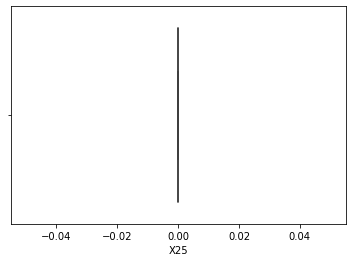

***************************
X26


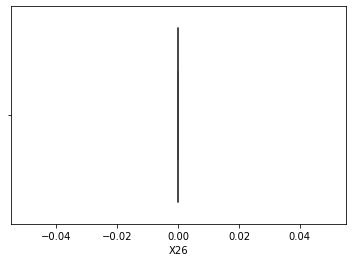

***************************
X27


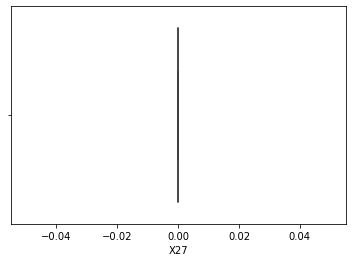

***************************
X28


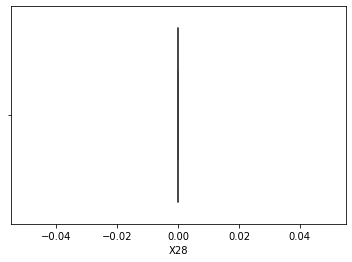

***************************
X29


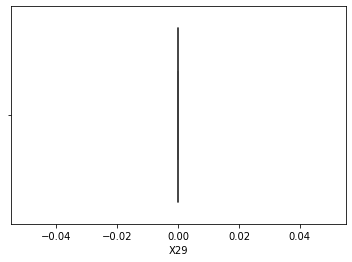

***************************
X30


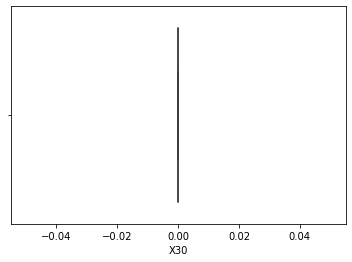

***************************
X31


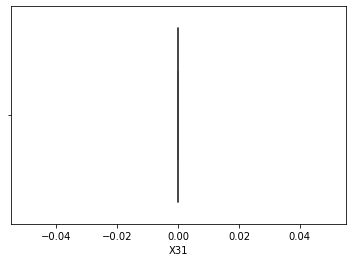

***************************
X32


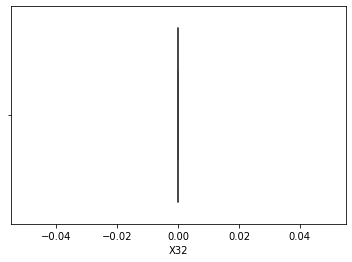

***************************
X33


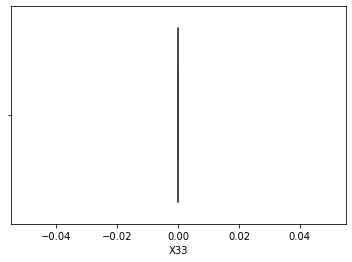

***************************
X34


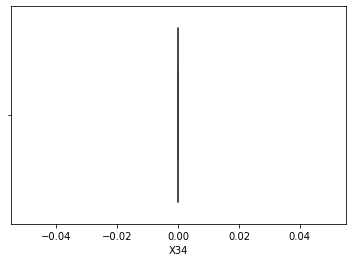

***************************
X35


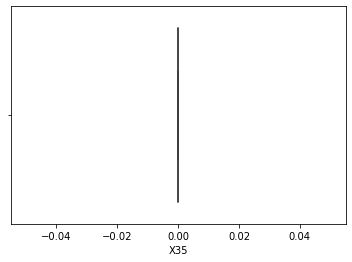

***************************
X36


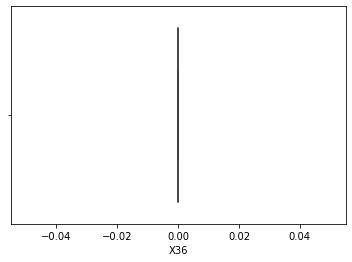

***************************
X37


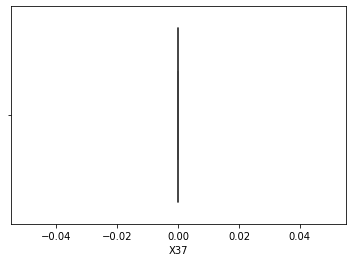

***************************
X38


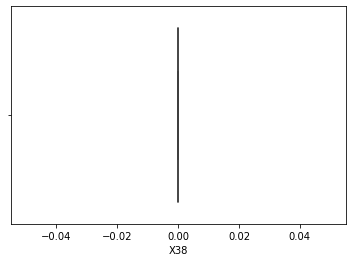

***************************
X39


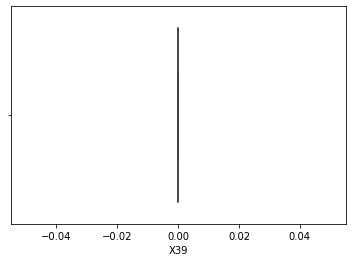

***************************
X40


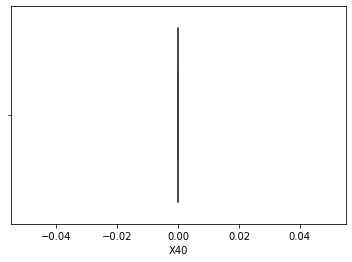

***************************
X41


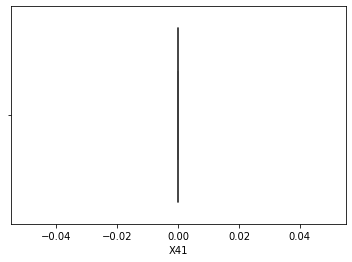

***************************
X42


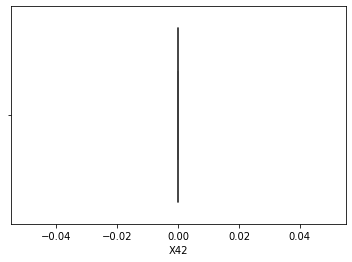

***************************
X43


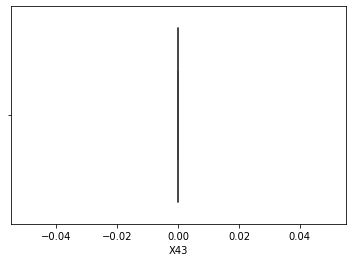

***************************
X44


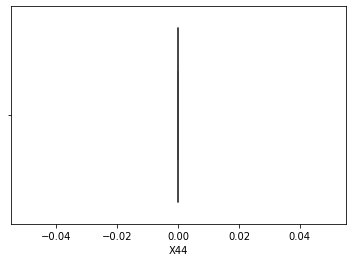

***************************
X45


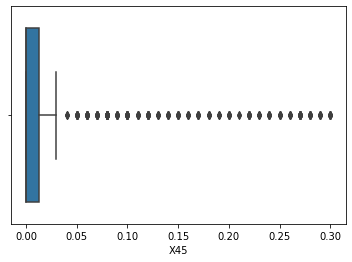

***************************
X46


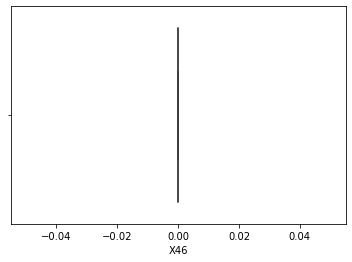

***************************
X47


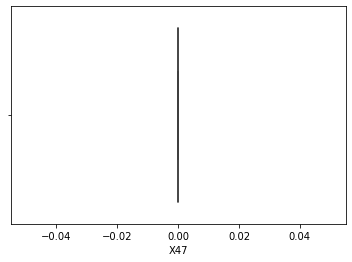

***************************
X48


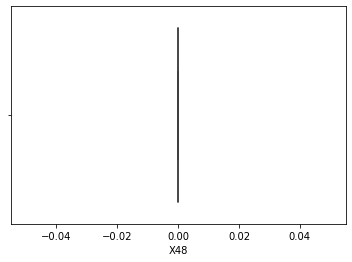

***************************
X49


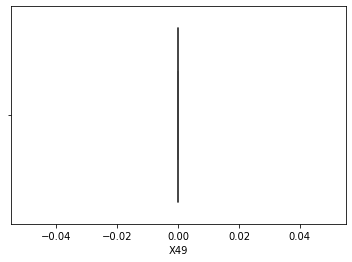

***************************
X50


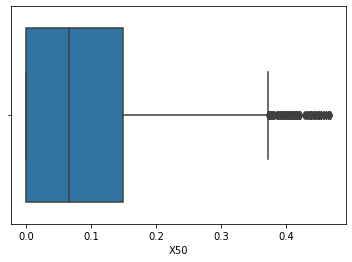

***************************
X51


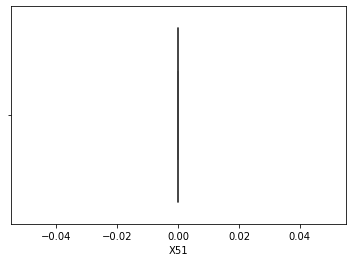

***************************
X52


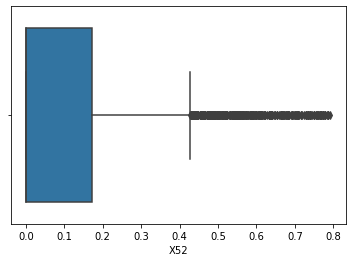

***************************
X53


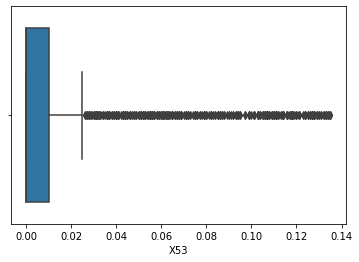

***************************
X54


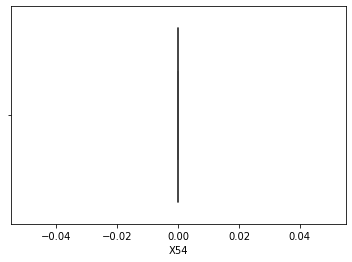

***************************
X55


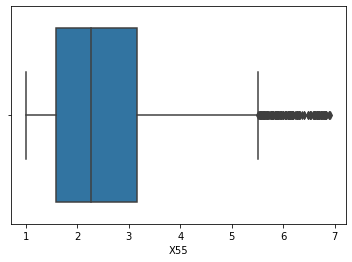

***************************
X56


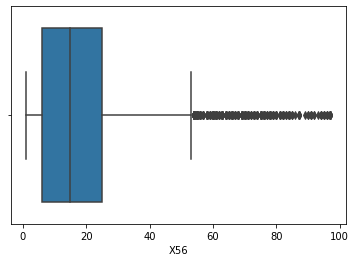

***************************
X57


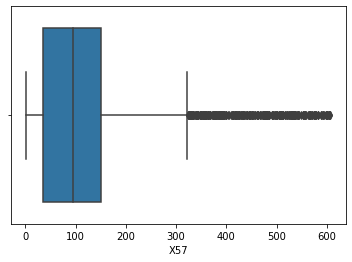

***************************


In [25]:
for i in df_out.columns:
    outlier(i)

In [ ]:
## Imbalance data

In [26]:
df['Y'].value_counts()

0    2376
1    1534
Name: Y, dtype: int64

In [38]:
x  = df.drop("Y",axis=1)
y = df["Y"]


## Model training

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42,stratify=y)

In [40]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, x_train, y_train, x_test, y_test, train=True):
    if train:
        pred = clf.predict(x_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(x_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [41]:
#train and test
lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(x_train, y_train)

print_score(lr_clf, x_train, y_train, x_test, y_test, train=True)
print_score(lr_clf, x_train, y_train, x_test, y_test, train=False)

Train Result:
Accuracy Score: 92.95%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.931338     0.926428  0.929485     0.928883      0.929411
recall        0.954299     0.891061  0.929485     0.922680      0.929485
f1-score      0.942679     0.908401  0.929485     0.925540      0.929228
support    1663.000000  1074.000000  0.929485  2737.000000   2737.000000
_______________________________________________
Confusion Matrix: 
 [[1587   76]
 [ 117  957]]

Test Result:
Accuracy Score: 91.99%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.926897    0.908482  0.919864     0.917689      0.919675
recall       0.942496    0.884783  0.919864     0.913640      0.919864
f1-score     0.934631    0.896476  0.919864     0.915554      0.919668
support    713.000000  460.000000  0.919

In [42]:
test_score = accuracy_score(y_test, lr_clf.predict(x_test)) * 100
train_score = accuracy_score(y_train, lr_clf.predict(x_train)) * 100

results_df = pd.DataFrame(data=[["Logistic Regression", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df

Model  Training Accuracy %  Testing Accuracy %
0  Logistic Regression            92.948484            91.98636

In [43]:
# KNeighborsClassifier

In [44]:
knn_mod = KNeighborsClassifier()
hyper = {'n_neighbors':np.arange(2,40),'p':[1,2]}
gscv = GridSearchCV(knn_mod,hyper,cv = 10)
gscv.fit(x_train,y_train)
gscv.best_estimator_

KNeighborsClassifier(n_neighbors=31, p=1)

In [45]:
knn_mod = KNeighborsClassifier(n_neighbors=2, p=1)
knn_mod.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=2, p=1)

In [46]:
print_score(knn_mod, x_train, y_train, x_test, y_test, train=True)
print_score(knn_mod, x_train, y_train, x_test, y_test, train=False)

Train Result:
Accuracy Score: 83.16%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.782957     1.000000  0.831567     0.891478      0.868125
recall        1.000000     0.570764  0.831567     0.785382      0.831567
f1-score      0.878268     0.726734  0.831567     0.802501      0.818806
support    1663.000000  1074.000000  0.831567  2737.000000   2737.000000
_______________________________________________
Confusion Matrix: 
 [[1663    0]
 [ 461  613]]

Test Result:
Accuracy Score: 68.71%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.684829    0.696203  0.687127     0.690516      0.689289
recall       0.899018    0.358696  0.687127     0.628857      0.687127
f1-score     0.777441    0.473458  0.687127     0.625449      0.658232
support    713.000000  460.000000  0.687

In [47]:
test_score = accuracy_score(y_test, knn_mod.predict(x_test)) * 100
train_score = accuracy_score(y_train, knn_mod.predict(x_train)) * 100

results_df1 = pd.DataFrame(data=[["KNN CLASSIFIER", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df1

Model  Training Accuracy %  Testing Accuracy %
0  KNN CLASSIFIER            83.156741           68.712702

In [48]:
# DecisionTreeClassifier

In [49]:
dt_mod = DecisionTreeClassifier()
hyper = {'criterion':['gini','entropy'],
    'max_depth':np.arange(2,20),
    'min_samples_split':np.arange(2,20),
    'min_samples_leaf':np.arange(2,15)}
rscv = RandomizedSearchCV(dt_mod,hyper,cv = 7)
rscv.fit(x_train,y_train)
rscv.best_estimator_

DecisionTreeClassifier(max_depth=8, min_samples_leaf=2, min_samples_split=10)

In [50]:
DecisionTreeClassifier(max_depth=15, min_samples_leaf=4, min_samples_split=8)

DecisionTreeClassifier(max_depth=15, min_samples_leaf=4, min_samples_split=8)

In [51]:
dt_mod = rscv.best_estimator_
dt_mod.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=2, min_samples_split=10)

In [52]:
print_score(dt_mod, x_train, y_train, x_test, y_test, train=True)
print_score(dt_mod, x_train, y_train, x_test, y_test, train=False)

Train Result:
Accuracy Score: 94.96%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.943056     0.960630   0.94958     0.951843      0.949952
recall        0.975947     0.908752   0.94958     0.942350      0.949580
f1-score      0.959220     0.933971   0.94958     0.946596      0.949312
support    1663.000000  1074.000000   0.94958  2737.000000   2737.000000
_______________________________________________
Confusion Matrix: 
 [[1623   40]
 [  98  976]]

Test Result:
Accuracy Score: 91.73%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.915094    0.921114  0.917306     0.918104      0.917455
recall       0.952314    0.863043  0.917306     0.907679      0.917306
f1-score     0.933333    0.891134  0.917306     0.912233      0.916784
support    713.000000  460.000000  0.917

In [53]:
test_score = accuracy_score(y_test, dt_mod.predict(x_test)) * 100
train_score = accuracy_score(y_train, dt_mod.predict(x_train)) * 100

results_df2 = pd.DataFrame(data=[["DECSION TREE", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df2

Model  Training Accuracy %  Testing Accuracy %
0  DECSION TREE            94.957983           91.730605

In [54]:
# RandomForestClassifier

In [55]:
rf_mod = RandomForestClassifier()
hyper = {'n_estimators':np.arange(2,400,10),
    'criterion':['gini','entropy'],
    'max_depth':np.arange(2,20),
    'min_samples_split':np.arange(2,20),
    'min_samples_leaf':np.arange(2,15),
    'max_features':['auto',"log2"]}
rscv = RandomizedSearchCV(rf_mod,hyper,cv = 7)
rscv.fit(x_train,y_train)
rscv.best_estimator_

RandomForestClassifier(max_depth=19, max_features='log2', min_samples_leaf=4,
                       min_samples_split=8, n_estimators=232)

In [56]:
rf_mod = RandomForestClassifier(max_depth=16, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=142)
rf_mod.fit(x_train,y_train)

RandomForestClassifier(max_depth=16, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=142)

In [57]:
print_score(rf_mod, x_train, y_train, x_test, y_test, train=True)
print_score(rf_mod, x_train, y_train, x_test, y_test, train=False)

Train Result:
Accuracy Score: 97.52%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.968291     0.986460  0.975155     0.977376      0.975421
recall        0.991581     0.949721  0.975155     0.970651      0.975155
f1-score      0.979798     0.967742  0.975155     0.973770      0.975067
support    1663.000000  1074.000000  0.975155  2737.000000   2737.000000
_______________________________________________
Confusion Matrix: 
 [[1649   14]
 [  54 1020]]

Test Result:
Accuracy Score: 94.80%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.945355    0.952381  0.947997     0.948868      0.948110
recall       0.970547    0.913043  0.947997     0.941795      0.947997
f1-score     0.957785    0.932297  0.947997     0.945041      0.947790
support    713.000000  460.000000  0.947

In [58]:
test_score = accuracy_score(y_test, rf_mod.predict(x_test)) * 100
train_score = accuracy_score(y_train, rf_mod.predict(x_train)) * 100

results_df3 = pd.DataFrame(data=[["RANDOM_FOREST", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df3

Model  Training Accuracy %  Testing Accuracy %
0  RANDOM_FOREST            97.515528           94.799659

In [59]:
import pickle
pickle.dump(rf_mod,open('model.pkl','wb'))

In [103]:
# AdaBoostClassifier

In [60]:
ad_mod = AdaBoostClassifier()
hyper = {"n_estimators":np.arange(2,400,10)}
rscv = RandomizedSearchCV(ad_mod,hyper,cv = 7)
rscv.fit(x_train,y_train)
rscv.best_estimator_


AdaBoostClassifier(n_estimators=152)

In [61]:
ad_mod = rscv.best_estimator_
ad_mod.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=152)

In [62]:
print_score(ad_mod, x_train, y_train, x_test, y_test, train=True)
print_score(ad_mod, x_train, y_train, x_test, y_test, train=False)

Train Result:
Accuracy Score: 97.52%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.976689     0.972744  0.975155     0.974716      0.975141
recall        0.982562     0.963687  0.975155     0.973124      0.975155
f1-score      0.979616     0.968195  0.975155     0.973905      0.975134
support    1663.000000  1074.000000  0.975155  2737.000000   2737.000000
_______________________________________________
Confusion Matrix: 
 [[1634   29]
 [  39 1035]]

Test Result:
Accuracy Score: 94.80%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.960452    0.929032  0.947997     0.944742      0.948131
recall       0.953717    0.939130  0.947997     0.946424      0.947997
f1-score     0.957072    0.934054  0.947997     0.945563      0.948046
support    713.000000  460.000000  0.947

In [63]:
test_score = accuracy_score(y_test, ad_mod.predict(x_test)) * 100
train_score = accuracy_score(y_train, ad_mod.predict(x_train)) * 100

results_df4 = pd.DataFrame(data=[["ADABOOST", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df4

Model  Training Accuracy %  Testing Accuracy %
0  ADABOOST            97.515528           94.799659

In [64]:
#NAIVE-BAYS

In [65]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
# from sklearn.model_selection import train_test_split

# from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [66]:
gnb_model = GaussianNB()
gnb_model.fit(x_train, y_train)

GaussianNB()

In [67]:
print_score(gnb_model, x_train, y_train, x_test, y_test, train=True)
print_score(gnb_model, x_train, y_train, x_test, y_test, train=False)

Train Result:
Accuracy Score: 82.86%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.969340     0.706485  0.828645     0.837912      0.866195
recall        0.741431     0.963687  0.828645     0.852559      0.828645
f1-score      0.840204     0.815282  0.828645     0.827743      0.830425
support    1663.000000  1074.000000  0.828645  2737.000000   2737.000000
_______________________________________________
Confusion Matrix: 
 [[1233  430]
 [  39 1035]]

Test Result:
Accuracy Score: 81.59%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.969754    0.689441  0.815857     0.829598      0.859827
recall       0.719495    0.965217  0.815857     0.842356      0.815857
f1-score     0.826087    0.804348  0.815857     0.815217      0.817562
support    713.000000  460.000000  0.815

In [68]:
test_score = accuracy_score(y_test, gnb_model.predict(x_test)) * 100
train_score = accuracy_score(y_train, gnb_model.predict(x_train)) * 100

results_df5 = pd.DataFrame(data=[["GAUSSIAN_NB", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df5

Model  Training Accuracy %  Testing Accuracy %
0  GAUSSIAN_NB             82.86445           81.585678

In [69]:
mnb_model = MultinomialNB()
mnb_model.fit(x_train, y_train)

MultinomialNB()

In [70]:
print_score(mnb_model, x_train, y_train, x_test, y_test, train=True)
print_score(mnb_model, x_train, y_train, x_test, y_test, train=False)

Train Result:
Accuracy Score: 69.64%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.723656     0.638540  0.696383     0.681098      0.690257
recall        0.809381     0.521415  0.696383     0.665398      0.696383
f1-score      0.764121     0.574065  0.696383     0.669093      0.689543
support    1663.000000  1074.000000  0.696383  2737.000000   2737.000000
_______________________________________________
Confusion Matrix: 
 [[1346  317]
 [ 514  560]]

Test Result:
Accuracy Score: 69.31%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.711885    0.647059  0.693095     0.679472      0.686463
recall       0.831697    0.478261  0.693095     0.654979      0.693095
f1-score     0.767141    0.550000  0.693095     0.658571      0.681988
support    713.000000  460.000000  0.693

In [71]:
test_score = accuracy_score(y_test, mnb_model.predict(x_test)) * 100
train_score = accuracy_score(y_train, mnb_model.predict(x_train)) * 100

results_df6 = pd.DataFrame(data=[["MULTINOMIAL_NB", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df6

Model  Training Accuracy %  Testing Accuracy %
0  MULTINOMIAL_NB             69.63829           69.309463

In [72]:
bnb_model = BernoulliNB()
bnb_model.fit(x_train, y_train)


BernoulliNB()

In [73]:
print_score(bnb_model, x_train, y_train, x_test, y_test, train=True)
print_score(bnb_model, x_train, y_train, x_test, y_test, train=False)

Train Result:
Accuracy Score: 88.86%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.885795     0.893552  0.888564     0.889674      0.888839
recall        0.937462     0.812849  0.888564     0.875156      0.888564
f1-score      0.910897     0.851292  0.888564     0.881094      0.887508
support    1663.000000  1074.000000  0.888564  2737.000000   2737.000000
_______________________________________________
Confusion Matrix: 
 [[1559  104]
 [ 201  873]]

Test Result:
Accuracy Score: 88.58%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.888591    0.880841  0.885763     0.884716      0.885552
recall       0.928471    0.819565  0.885763     0.874018      0.885763
f1-score     0.908093    0.849099  0.885763     0.878596      0.884958
support    713.000000  460.000000  0.885

In [74]:
test_score = accuracy_score(y_test, bnb_model.predict(x_test)) * 100
train_score = accuracy_score(y_train, bnb_model.predict(x_train)) * 100

results_df7 = pd.DataFrame(data=[["BernoulliNB", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df7

Model  Training Accuracy %  Testing Accuracy %
0  BernoulliNB            88.856412             88.5763

In [ ]:
accuracies = pd.concat([results_df,results_df1,results_df2,results_df3,results_df4,results_df5,results_df6,results_df7],axis=0)

In [78]:
test_data = pd.read_csv("test_set.csv")
test_predictions = ad_mod.predict(test_data)